#### Rodrigo Aguiar a22209738
#### Rafael Ramalhete a22209712
#### Mariana Carvalho a22001926

# Trabalho de avaliação 1

# Bibliotecas
Estas linhas de código importam as bibliotecas **NumPy** e **Matplotlib** para o ambiente Python. Isso significa que agora podemos usar todas as funções e classes fornecidas por essas bibliotecas em nosso código. O que significa que o código usará funcionalidades relacionadas à computação numérica e/ou visualização de dados.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Regras de Transição
 Esta função aplica uma regra específica a uma célula em um autómato celular unidimensional, considerando os estados das células vizinhas para determinar a evolução do autómato. <br>
 Eplicação dos argumentos:
 * '**rule**' será a regra que determina como uma célula irá evoluir ao longo do tempo.
 * '**state**' é o estado atual do autómato celular, podendo este ter o vakode de 0 (inativo) ou 1 (ativo).
 * '**pos**' é a posição da célula à qual iremos aplicar a regra.
 
 Tendo em conta esta informação a função usa três valores (**left, center, right**) para determinar qual ação deve ser tomada com base na regra fornecida. A regra geralmente é especificada usando o sistema de numeração binária como descrito anteriomente. A posição do bit 1 na representação binária desse valor indica qual ação deve ser tomada para essa configuração específica. De seguida para encontrar o valor correspondente na regra, os valores das células vizinhas (**left, center, right**) são usados como índices para aceder à regra. Esses valores serão então convertidos em um único número decimal para aceder o valor correspondente na regra. Por fim, O valor resultante dessa operação será o estado que a célula na posição '**pos**' deve ter na próxima iteração, de acordo com a regra fornecida.<br>
 Em conclusão, a função '**apply_rule**' é responsável por aplicar uma regra específica a uma célula de um autómato celular, determinando o seu estado na próxima iteração com base no estado atual das células vizinhas e na regra fornecida.


In [17]:
def apply_rule(rule, state, pos):
    left = state[pos - 1]
    center = state[pos]
    right = state[(pos + 1) % len(state)]
    return rule[left * 4 + center * 2 + right]

# Simulação da evolução
A função evolve encapsula o processo de evolução de um autómato celular, permitindo que sejam observadas as mudanças de estado ao longo do tempo de acordo com uma regra pré-definida.<br>
Explicação dos argumentos:
* '**rule**' é a regra que determina como as células evoluem ao longo do tempo. Ela é fornecida como um array que contém as possíveis configurações e seus resultados correspondentes.<br>
* '**initial_state**' é o estado inicial do autómato celular, representado como um array de células. Cada célula pode ter um valor de 0 (inativo) ou 1 (ativo).<br>
* '**steps**' é o número de etapas que queremos que o autómato celular evolua.<br>

A função começa por fazer uma cópia do estado inicial do autómato celular. Isso é importante para garantir que não alteremos o estado original durante a evolução. De seguida a função então entra em um loop que executa '**steps**' vezes. Isso significa que iremos evoluir o autómato celular ao longo de um número específico de etapas. Dentro do loop, é criada uma nova matriz de estado '**new_state**', inicializada com zeros, tendo o mesmo tamanho que o estado inicial. Essa matriz será usada para armazenar o novo estado do autómato celular após cada etapa. Em seguida, a função itera sobre cada célula no estado atual (state). Para cada célula, a função '**apply_rule**' é chamada para determinar seu novo estado com base na regra fornecida. Por fim, O novo estado de cada célula é armazenado na matriz '**new_state**'. Após iterar sobre todas as células, o estado atual (**state**) é atualizado para o novo estado (**new_state**). O novo estado atualizado é então adicionado ao histórico (**history**), que armazena todos os estados do autómato celular em cada etapa. Após todas as etapas serem concluídas, a função retorna o histórico completo de estados do autómato celular ao longo do tempo.


In [18]:
def evolve(rule, initial_state, steps):
    state = initial_state.copy()
    history = [state.copy()]
    
    for _ in range(steps):
        new_state = np.zeros_like(state)
        for i in range(len(state)):
            new_state[i] = apply_rule(rule, state, i)
        state = new_state
        history.append(state.copy())
    
    return history

# Gráfico
A função **plot_evolution** utiliza a biblioteca Matplotlib para visualizar a evolução de um autómato celular ao longo do tempo, mostrando como o estado das células muda em cada etapa o que nos permite entender o comportamento e as características do autómato celular.

In [19]:
def plot_evolution(history):
    plt.figure(figsize=(10, 5))
    plt.imshow(history, cmap="binary", interpolation="nearest")
    plt.xlabel("Time Step")
    plt.ylabel("Cell")
    plt.title("Rule 30 Cellular Automaton Evolution")
    plt.show()

# Código
Este código configura e evolui um autómato celular unidimensional com a **rule 30** e visualiza a evolução resultante. Mais concretmente, a **rule 30** é definida como um array NumPy. Esta regra específica é representada pelo array [0, 1, 1, 1, 1, 0, 0, 0], onde cada elemento do array corresponde a uma configuração possível de três células vizinhas (esquerda, central e direita) e seu valor correspondente indica o estado da célula central na próxima etapa. 
O estado inicial do autómato celular é definido como um array NumPy de zeros, com tamanho 101. Isso cria um ambiente de células vazio. A célula central (índice 50) é definida como ativa (valor 1), para iniciar o autómato celular com uma única célula ativa no centro. De seguida, define o número de etapas (**steps**) para 50. A função **evolve** é chamada para evoluir o autómato celular ao longo de 50 etapas, usando a regra 30 e o estado inicial definido anteriormente. O resultado da evolução é armazenado na variável **evolution_history**.
Por fim, a função **plot_evolution** é chamada para plotar a evolução do autómato celular ao longo do tempo, utilizando o histórico de evolução calculado anteriormente.

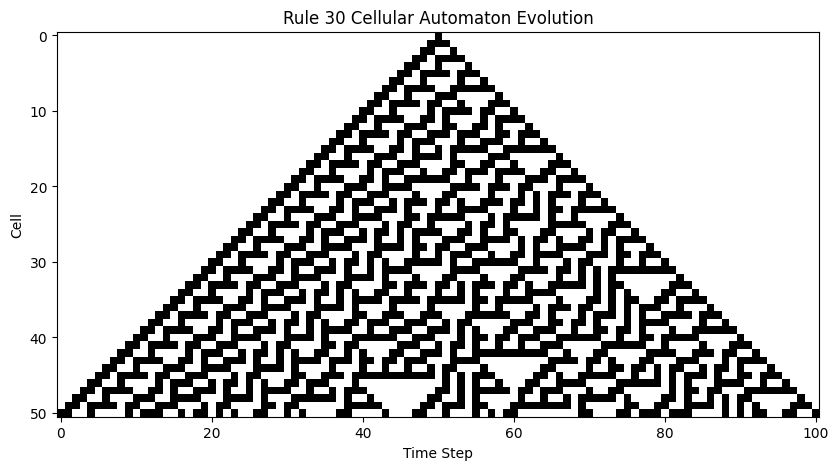

In [20]:
# Define Rule 30
rule30 = np.array([0, 1, 1, 1, 1, 0, 0, 0], dtype=int)
# Set initial state
initial_state = np.zeros(101, dtype=int)
initial_state[50] = 1
# Evolve and plot
steps = 50
evolution_history = evolve(rule30, initial_state, steps)
plot_evolution(np.array(evolution_history))

# Teste 1 : Variação o número de gerações do AC.
Definimos uma lista '**num_generations**' que contém diferentes números de gerações a serem testados. Em seguida ele itera sobre esses valores, chamando a função **'evolve'** com cada valor e, em seguida, plota a evolução resultante do autômato celular usando a função '**plot_evolution**'. Isto permitiu-nos visualizar como o autômato celular se comporta com os diferentes números de gerações.

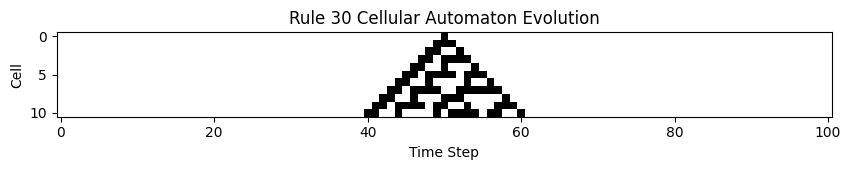

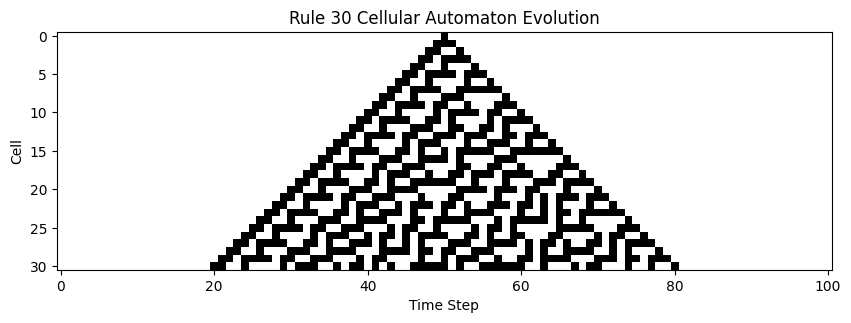

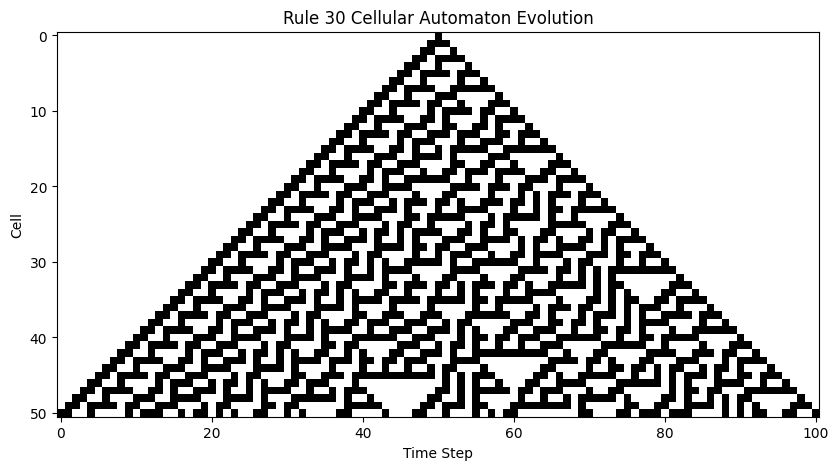

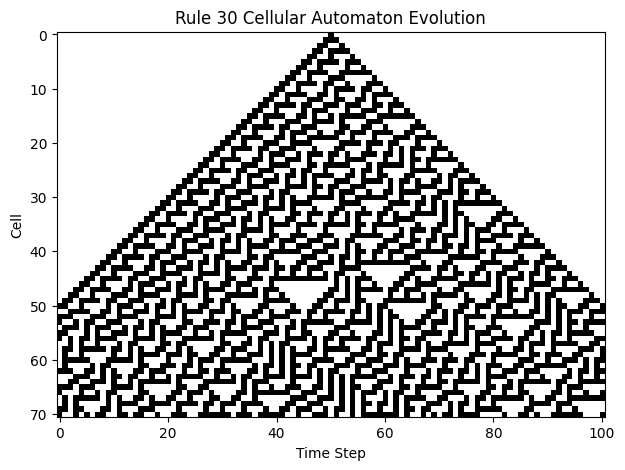

In [21]:
num_generations = [10, 30, 50, 70]  # Número de gerações a serem testadas

for gen in num_generations:
    evolution_history = evolve(rule30, initial_state, gen)
    plot_evolution(np.array(evolution_history))

# Teste 2 : Variação da geração inicial.
 Definimos uma lista '**initial_generation_positions**' que contém diferentes posições iniciais da célula ativa a serem testadas. Em seguida itera sobre esses valores, configurando a posição inicial da célula ativa no estado inicial do autômato celular e, em seguida, chamando a função '**evolve**' para evoluir o autômato celular com cada posição inicial. Por fim, plota a evolução resultante usando a função '**plot_evolution**'. Isto permitiu-nos visualizar como o autômato celular se comporta com as diferentes posições iniciais da célula ativa.

Posicao da geracao incial :25


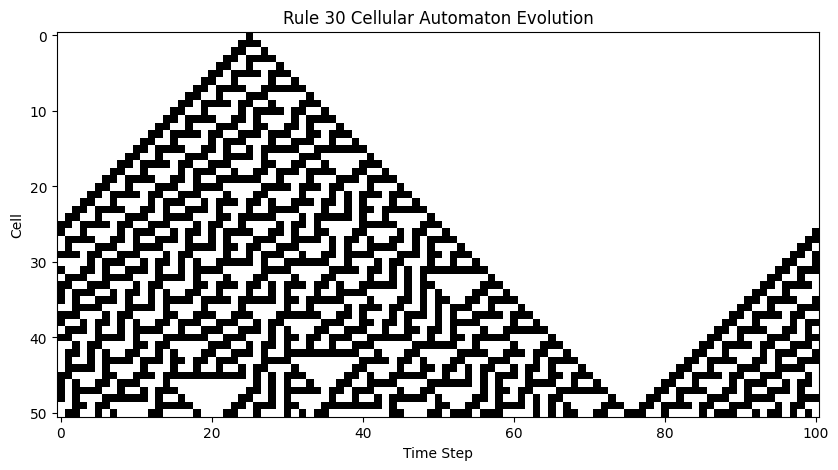

Posicao da geracao incial :10


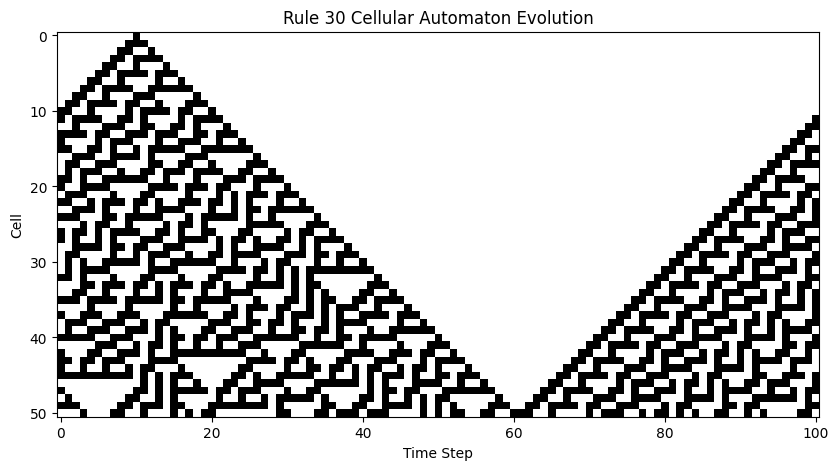

In [22]:
initial_generation_positions = [25, 10]  

for pos in initial_generation_positions:
    initial_state = np.zeros(101, dtype=int)
    initial_state[pos] = 1
    print(f"Posicao da geracao incial :{pos}")
    
    evolution_history = evolve(rule30, initial_state, 50) 
    plot_evolution(np.array(evolution_history))

# Teste 3 :  Variação da dimensão do habitat.
Este código executa uma variação na dimensão do habitat do autómato celular e exibe a evolução correspondente para cada dimensão especificada. Foi criado um loop para iterar o array **dimensions**, de modo, que em cada iteração é usada uma dimensão diferente. Em cada iteração, a variável **dimension** é definida como o tamanho atual do habitat. Um array NumPy de zeros é criado para representar o estado inicial do autómato celular, com o tamanho igual à dimensão atual e uma célula é ativada no meio do habitat, definindo initial_state[dimension // 2] = 1. Isso garante que a célula central seja a única célula inicialmente ativa.
A função **'evolve'** é chamada para evoluir o autómato celular ao longo de 50 etapas, usando a regra 30 e o estado inicial definido anteriormente. O resultado da evolução é armazenado na variável **'evolution_history'**. Por fim, a função **'plot_evolution'** é chamada para plotar a evolução do autómato celular ao longo do tempo, utilizando o histórico de evolução calculado anteriormente.


Dimensão :51


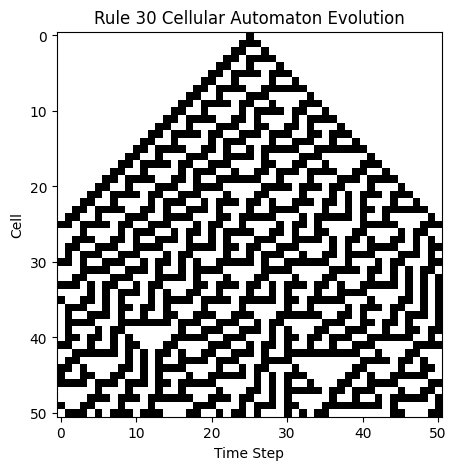

Dimensão :101


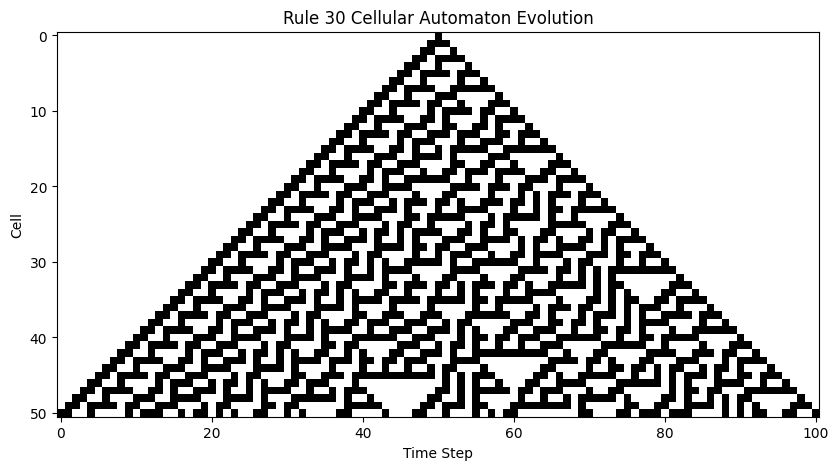

Dimensão :201


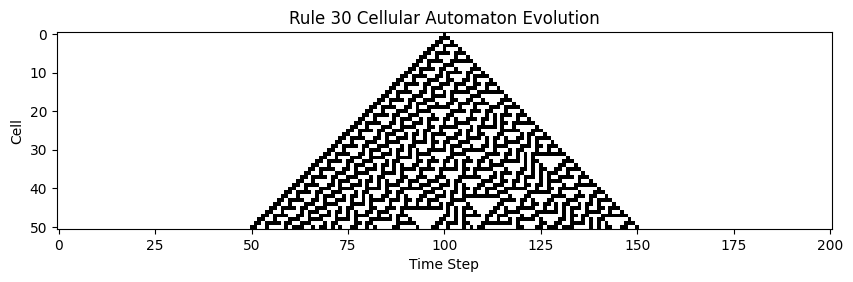

In [23]:

dimensions = [51, 101, 201]
for dimension in dimensions:
    initial_state = np.zeros(dimension, dtype=int)
    initial_state[dimension // 2] = 1
    print(f"Dimensão :{dimension}")

    evolution_history = evolve(rule30, initial_state, 50) 
    plot_evolution(np.array(evolution_history))



# Teste 4 :  Iniciar aleatoriamente a geração inicial.
Decidimos fazer 2 testes neste exercicio
Criamos  um loop for para realizar '**num_tests**' testes. Onde em cada iteração do loop, ele realiza o seguinte:<br>
Gera um estado inicial aleatório para o autômato celular usando '**np.random.choice()**', onde os valores possíveis são 0 e 1.<br>
Imprime o estado inicial gerado.<br>
Evolui o autômato celular ao longo de '**num_generations**' gerações usando uma função chamada '**evolve()**'.<br>
Por fim plota a evolução do autômato celular usando a função '**plot_evolution()**'.

Initial State :[0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0]


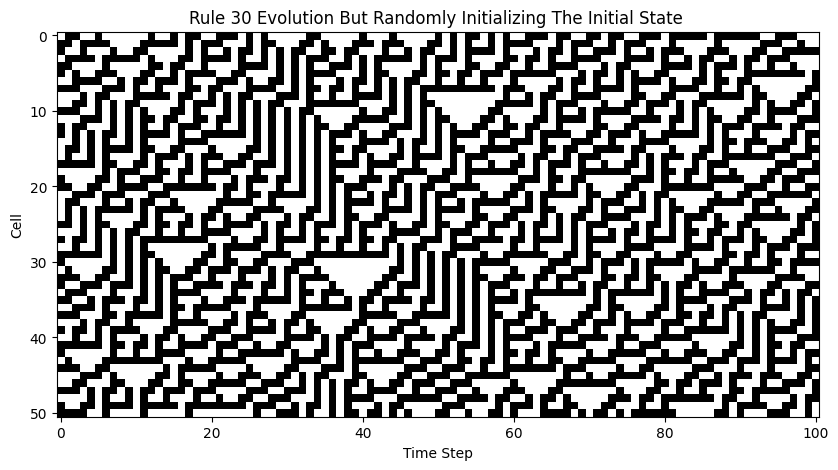

Initial State :[0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1]


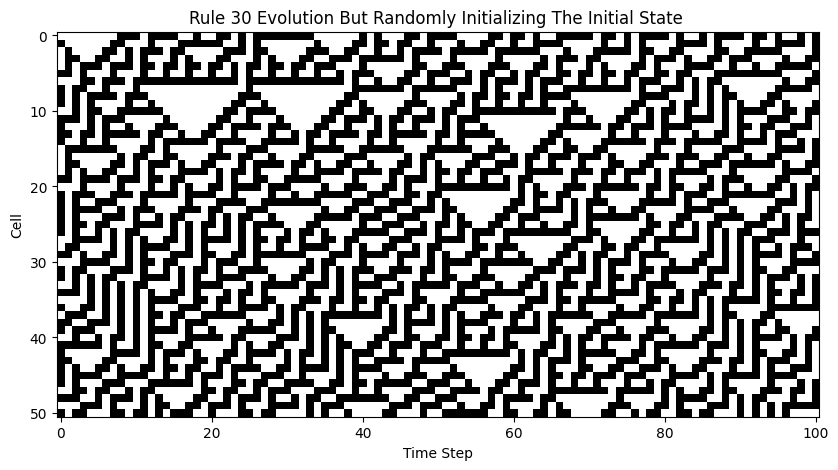

In [24]:
def plot_evolution(history):
    plt.figure(figsize=(10, 5))
    plt.imshow(history, cmap="binary", interpolation="nearest")
    plt.xlabel("Time Step")
    plt.ylabel("Cell")
    plt.title("Rule 30 Evolution But Randomly Initializing The Initial State ")
    plt.show()
    
num_tests = 2 
habitat_size = 101
num_generations = 50  

for testes in range(num_tests):
    
    initial_state = np.random.choice([0, 1], size=habitat_size)
    print(f"Initial State :{initial_state}")
    evolution_history = evolve(rule30, initial_state, num_generations)
    plot_evolution(np.array(evolution_history))

# Teste 5 : Testar outros ACs (regras).
Fizemos 3 testes.<br>
Criamos um loop for para gerar e testar **'num_rules'** regras de automato celular. Em cada iteração do loop, ele realiza o seguinte:<br>
Gera uma regra de automato celular aleatória com 8 valores booleanos (0 ou 1) usando '**np.random.choice()**'.<br>
Evolui o autômato celular para a regra atual '**rule**', o estado inicial '**initial_state**', e o número de gerações '**num_generations**'.<br>
Por fim plota a evolução do autômato celular usando a função '**plot_evolution()**'.

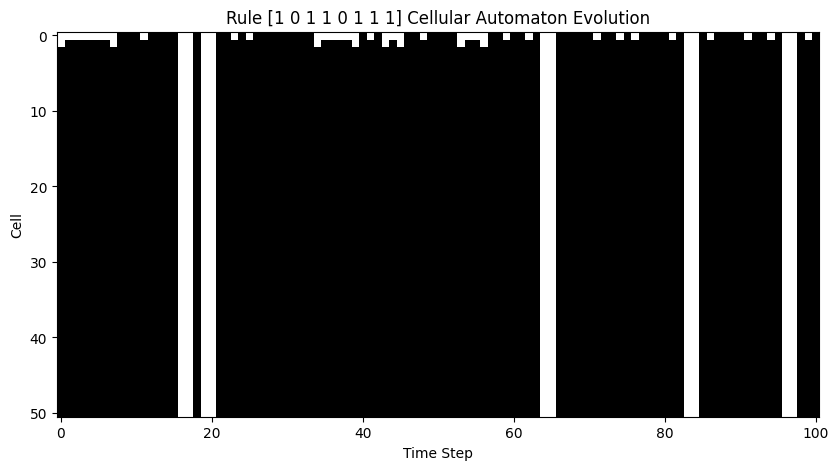

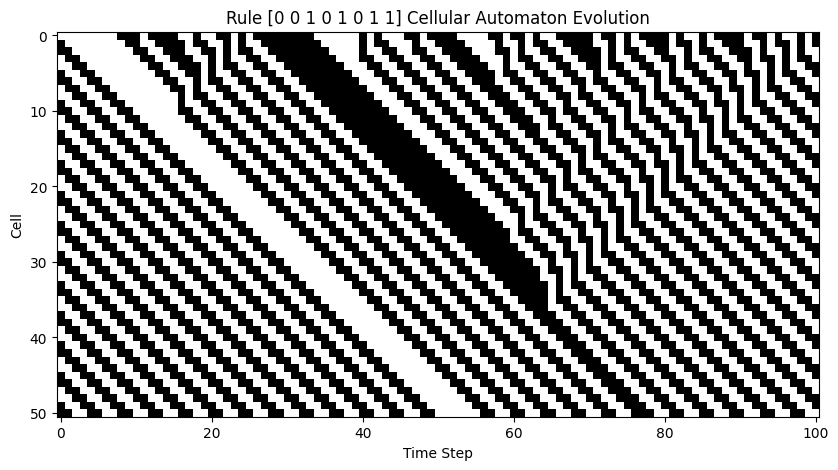

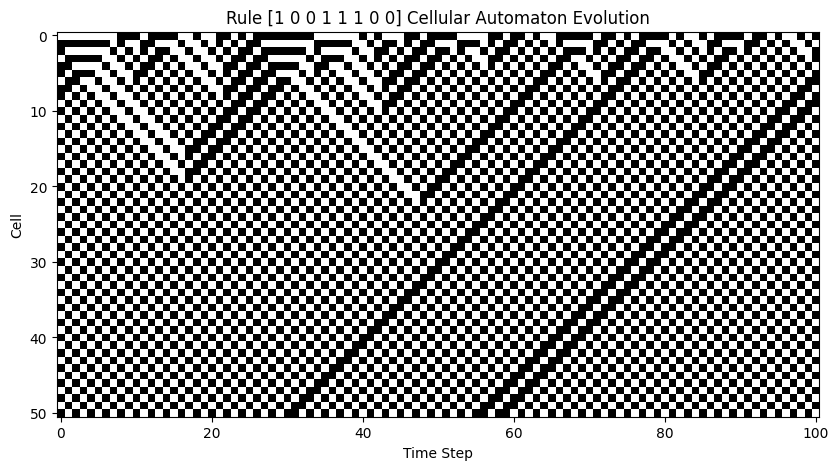

In [25]:
def plot_evolution(history):
    plt.figure(figsize=(10, 5))
    plt.imshow(history, cmap="binary", interpolation="nearest")
    plt.xlabel("Time Step")
    plt.ylabel("Cell")
    plt.title(f"Rule {rule} Cellular Automaton Evolution")
    plt.show()
    
num_rules = 3
for x in range(num_rules):
    rule = np.random.choice([0, 1], size=8)
    evolution_history = evolve(rule, initial_state, num_generations)
    plot_evolution(np.array(evolution_history))

# Teste 6 : Testar AC regra 20xGrupo
Grupo 4<br>
Aqui apenas fizemos as contas '**20x4**' para saber qual a regra que tinhamos que plotar.<br>
Passamos o valor dado '**80**' para binário e plotamos com essa regra.


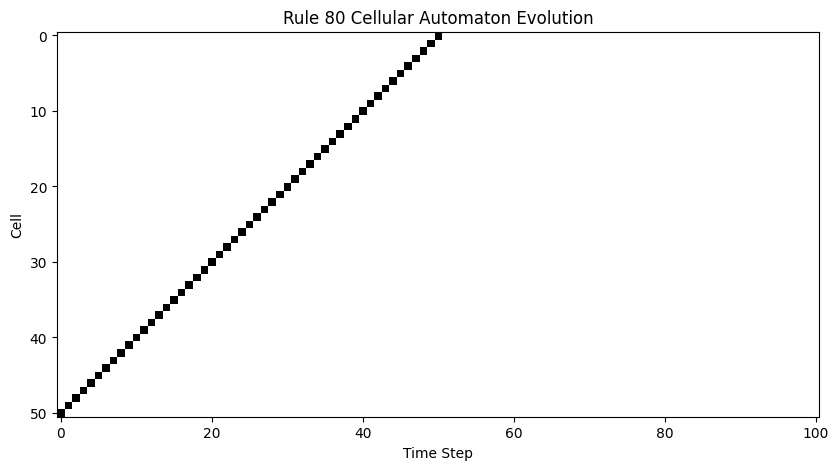

In [26]:
def plot_evolution(history):
    plt.figure(figsize=(10, 5))
    plt.imshow(history, cmap="binary", interpolation="nearest")
    plt.xlabel("Time Step")
    plt.ylabel("Cell")
    plt.title("Rule 80 Cellular Automaton Evolution")
    plt.show()
# 20 x 4 = 80
# 80 em binario = 01010000
rule80 = np.array([0,1,0,1,0,0,0,0], dtype=int)

initial_state = np.zeros(101, dtype=int)
initial_state[50] = 1

steps = 50
evolution_history = evolve(rule80, initial_state, steps)
plot_evolution(np.array(evolution_history))

# EXTRAS

## 1 :  Gerar os 255 ACs e respectivas figuras.
Usamos a função do Python format (**format(rule_number, '08b'):**)  para formatar o número rule_number como uma string binária ('b') indica  uma representação binária. O especificador '08' garante que a string resultante tenha exatamente 8 caracteres, preenchendo com zeros à esquerda, se necessário. Aqui **(binary_rule = [int(bit) for bit in binary_string[::-1]])** convertemos a string binária obtida anteriormente em uma lista de inteiros representando os bits da regra, mas invertendo a ordem dos bits.

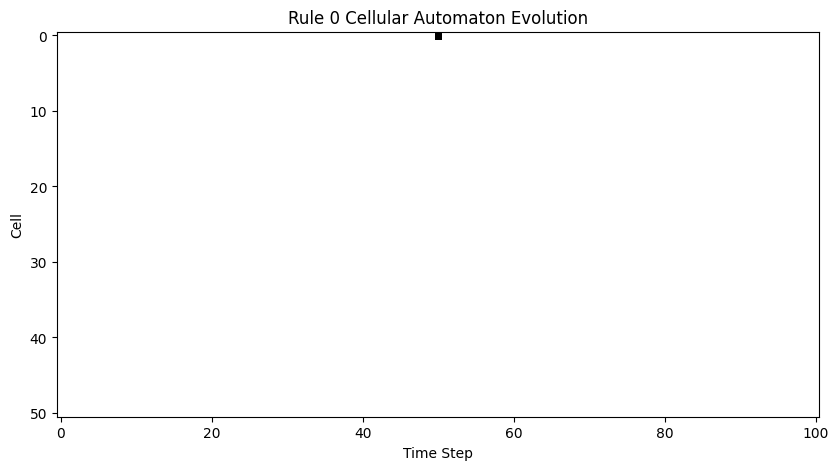

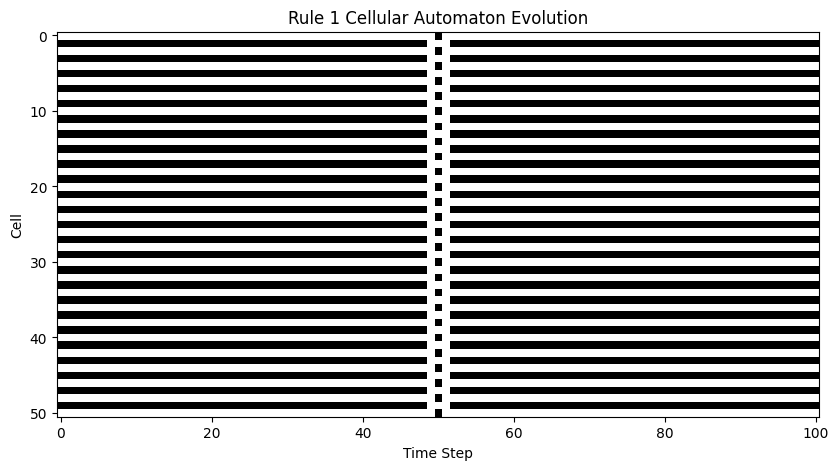

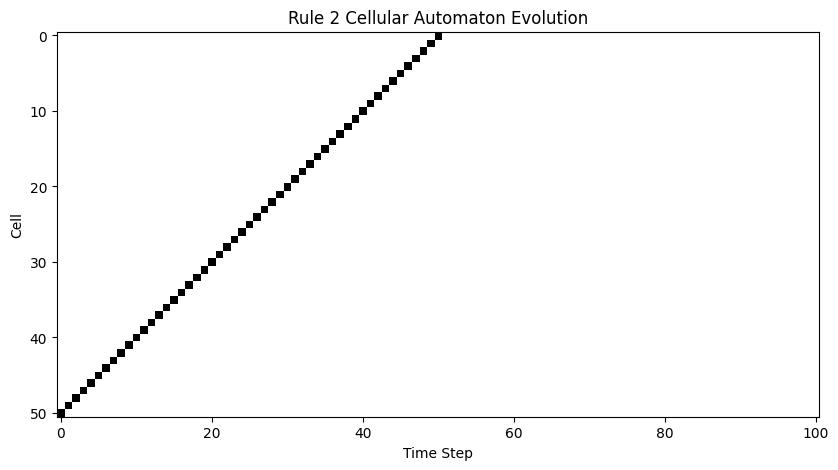

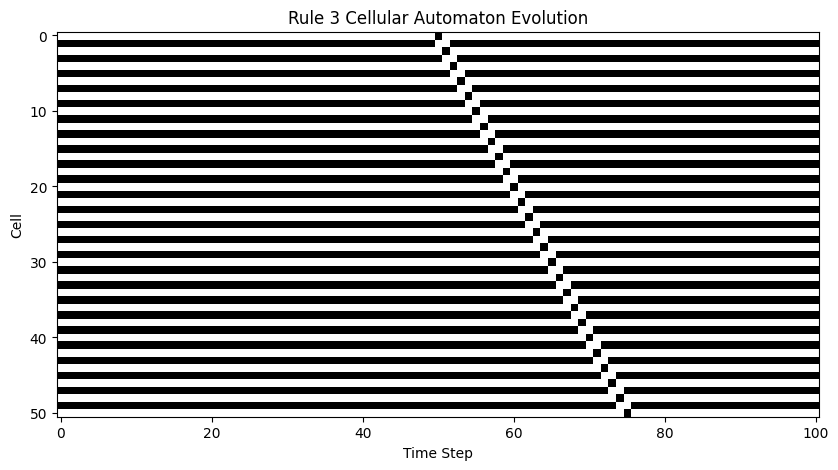

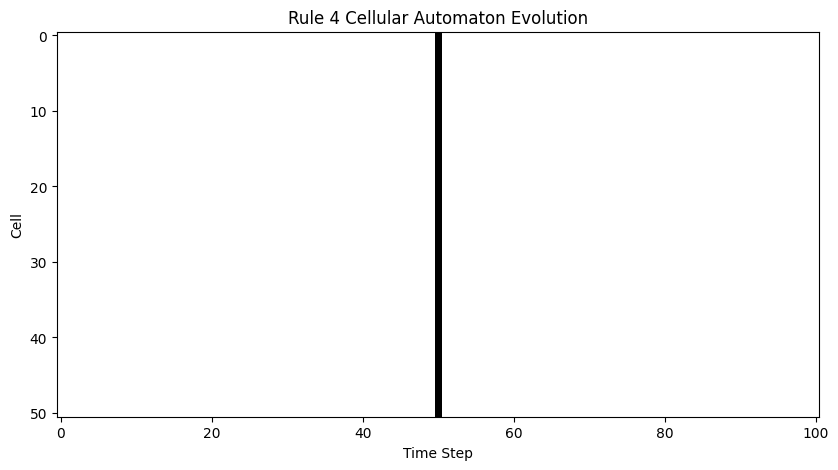

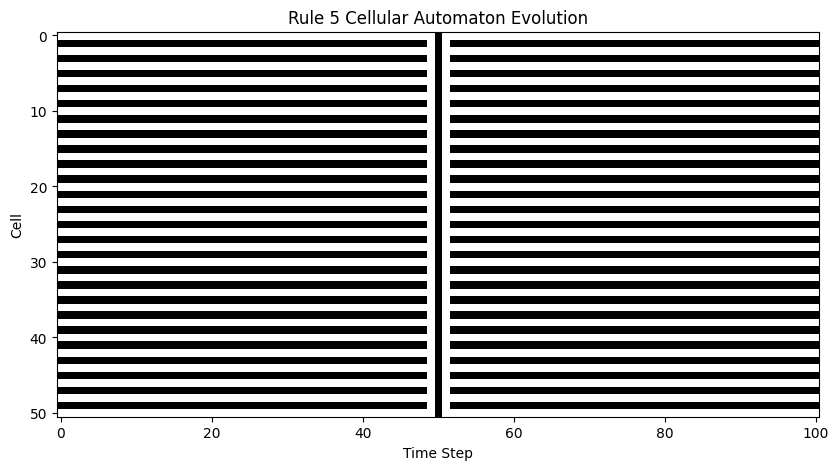

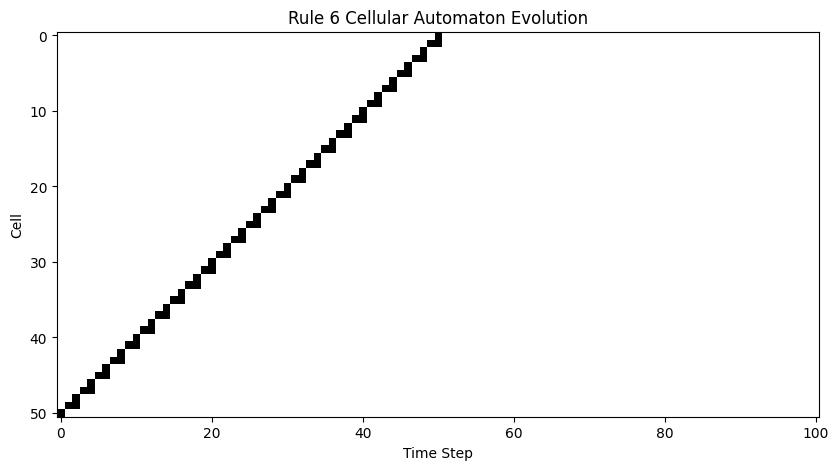

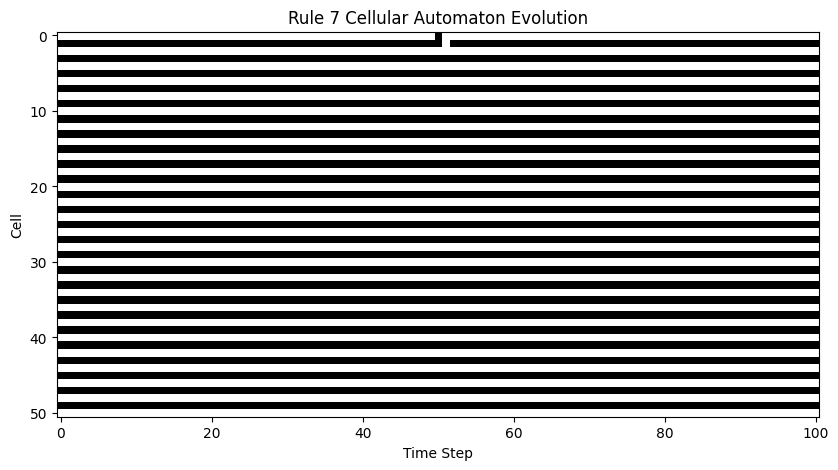

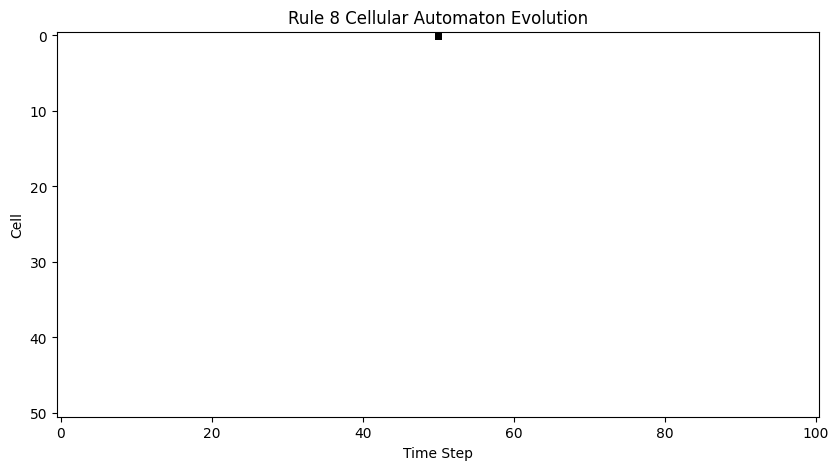

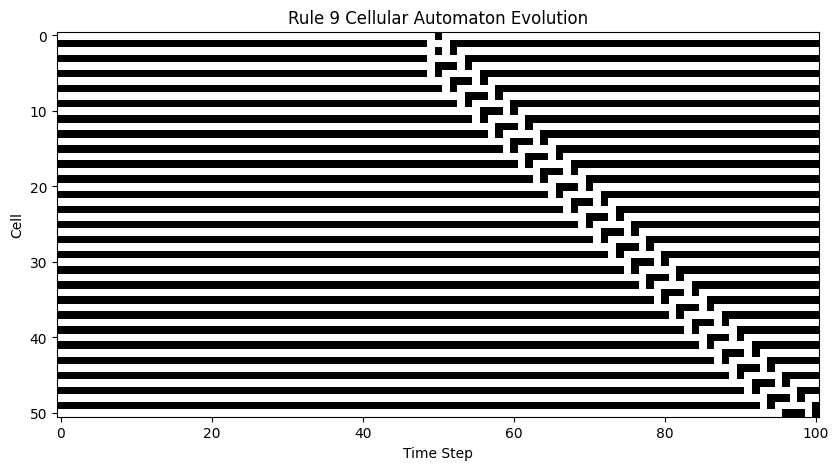

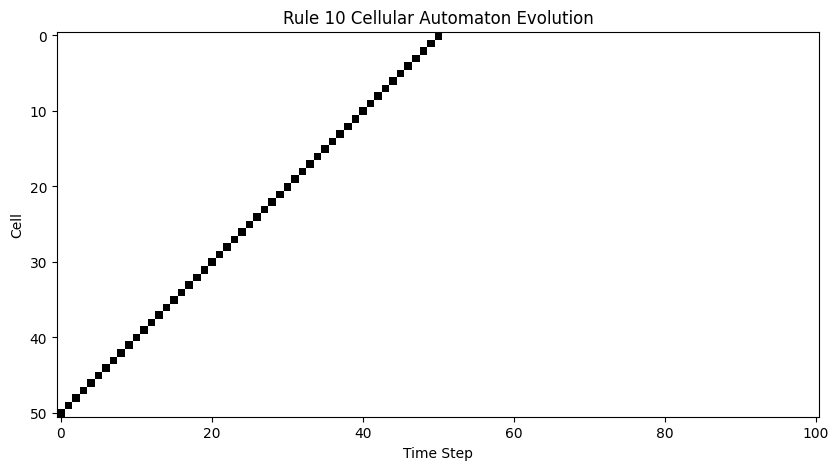

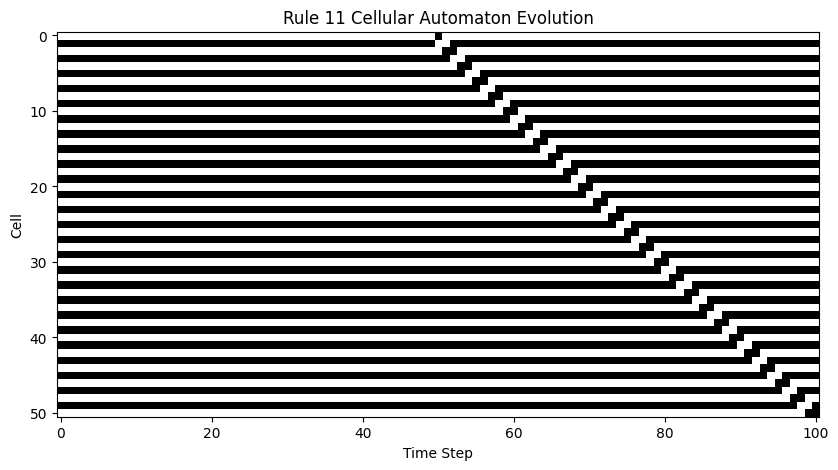

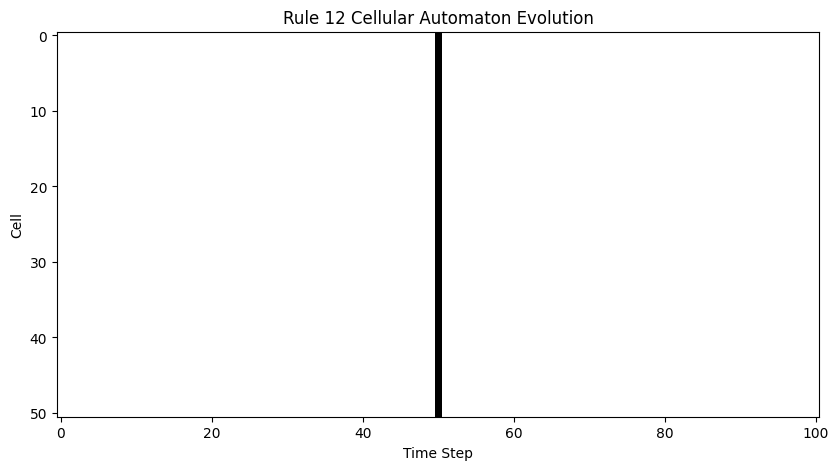

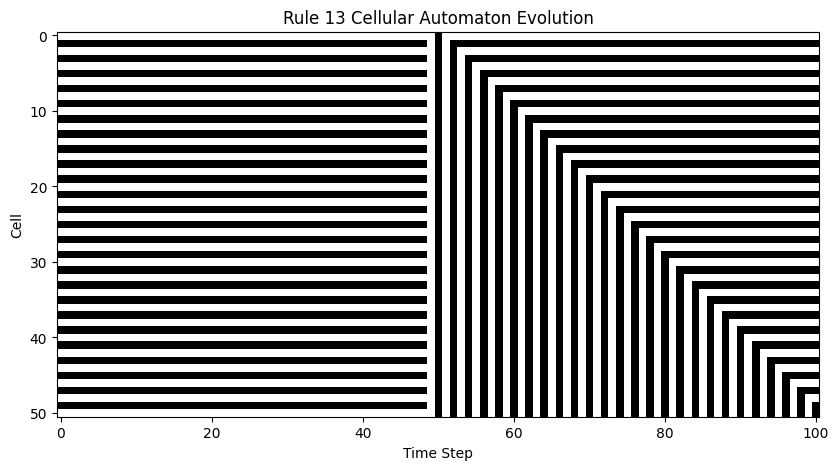

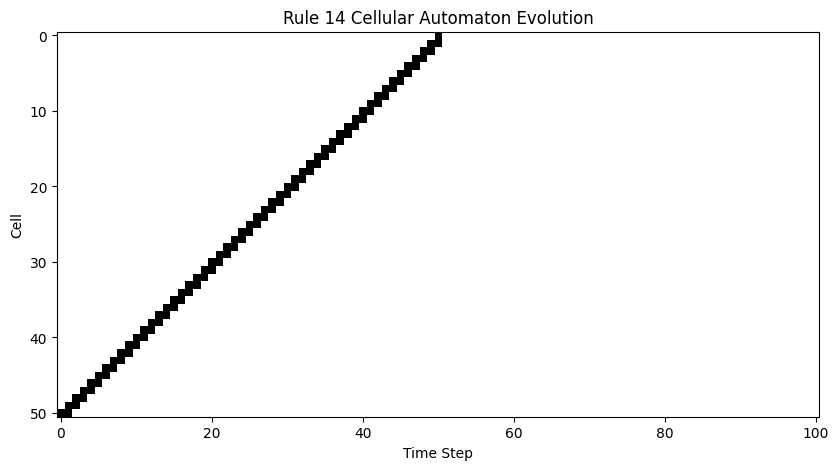

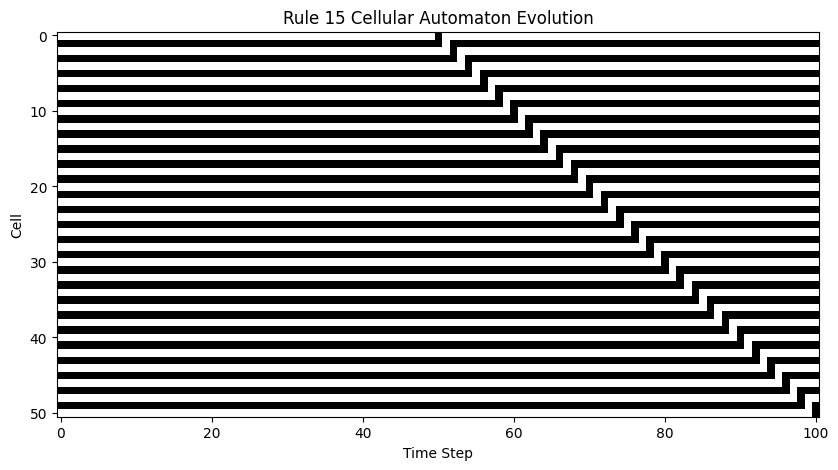

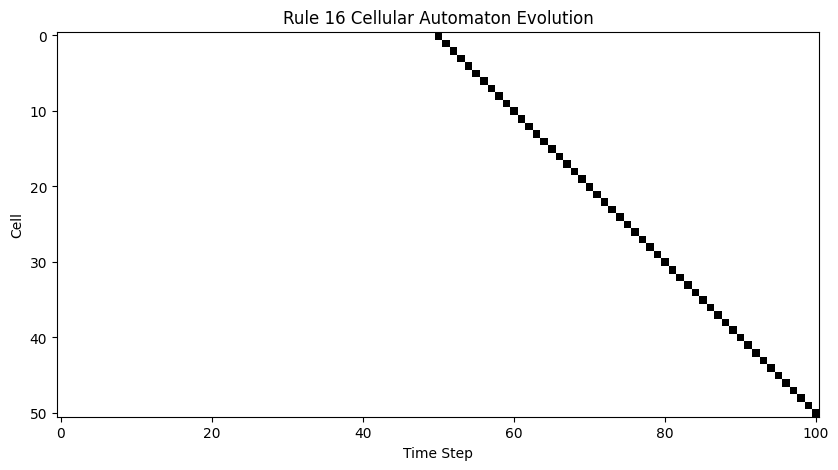

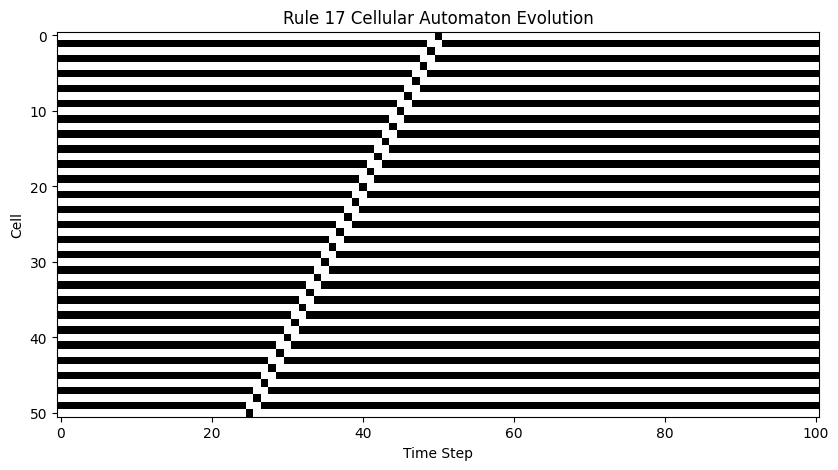

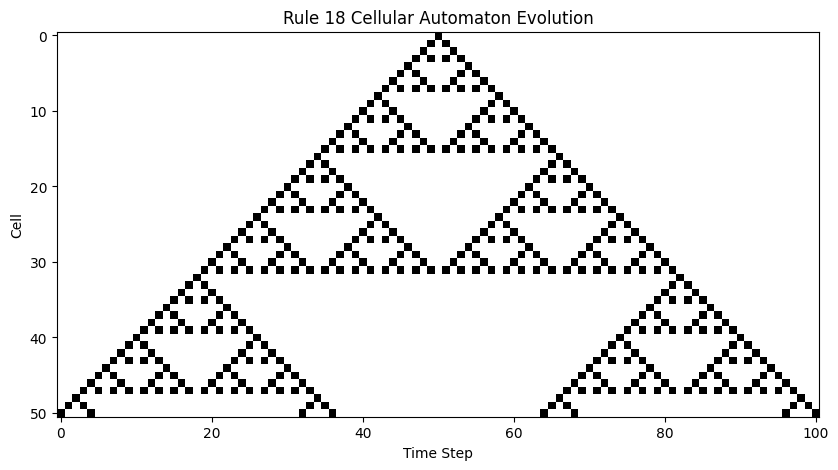

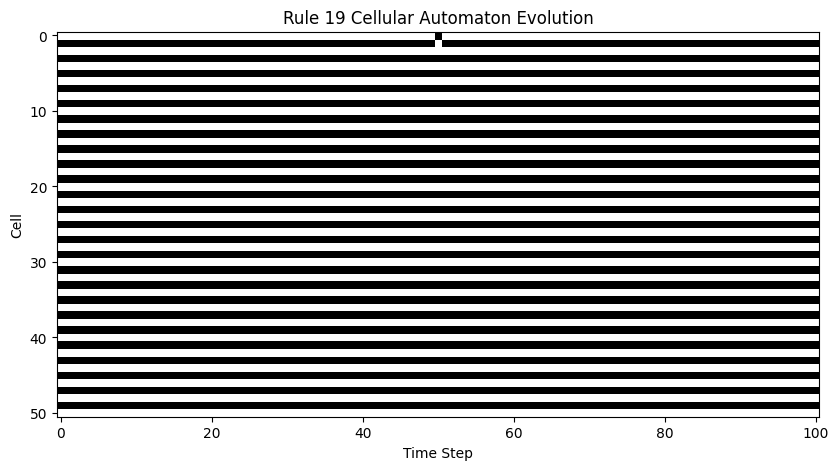

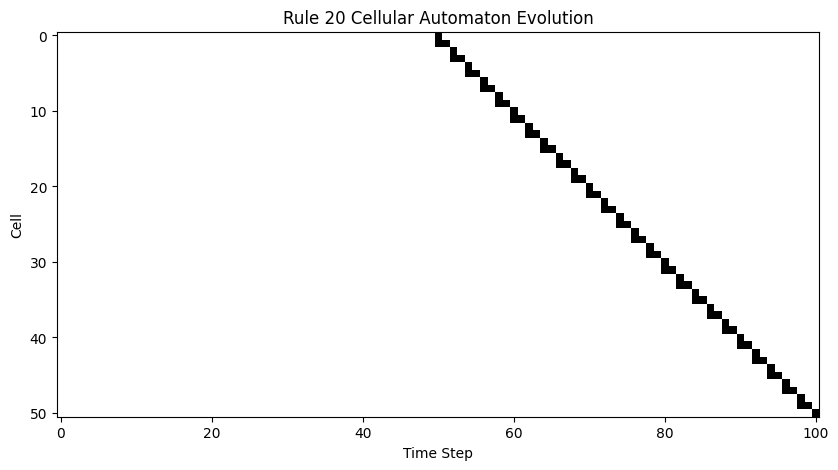

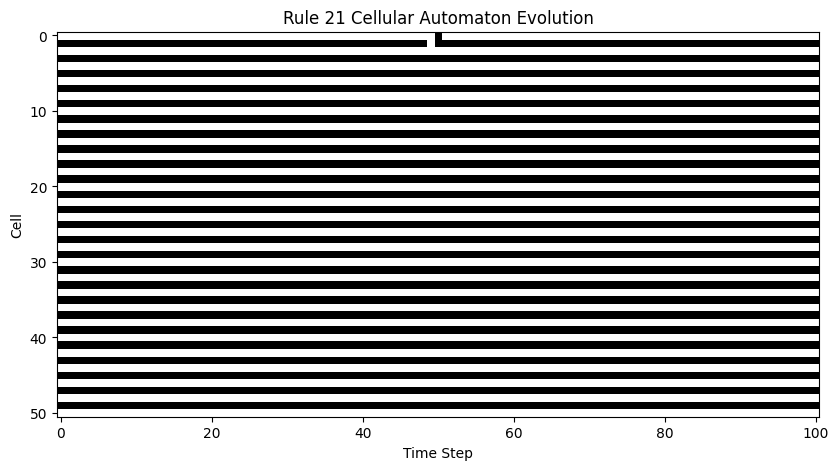

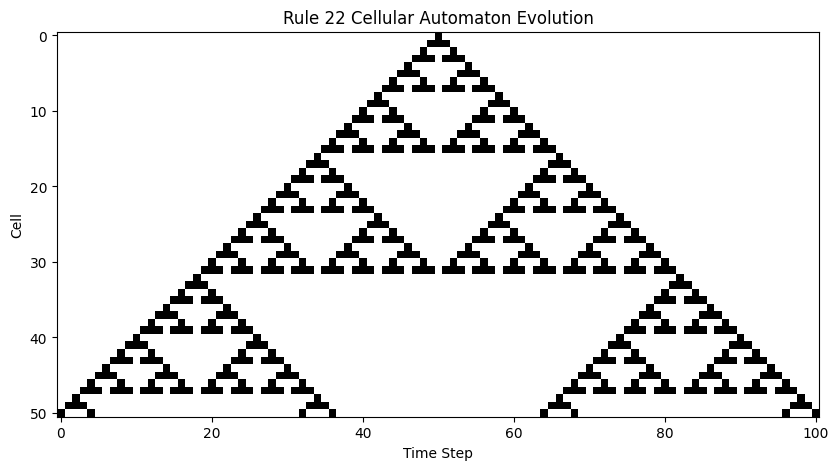

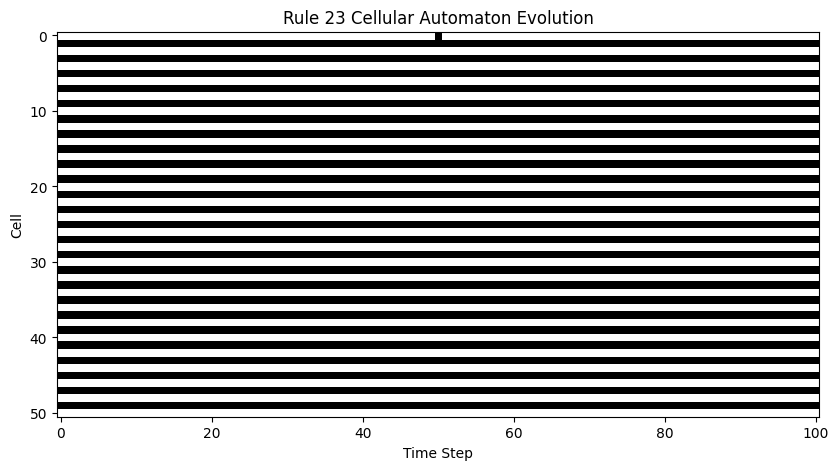

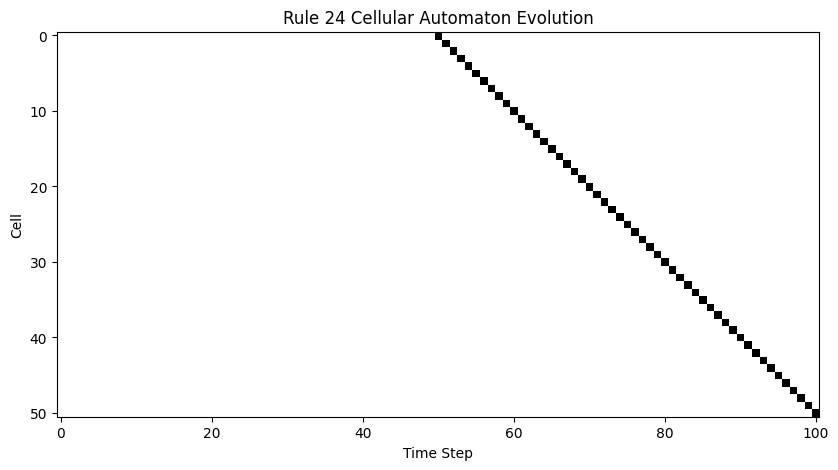

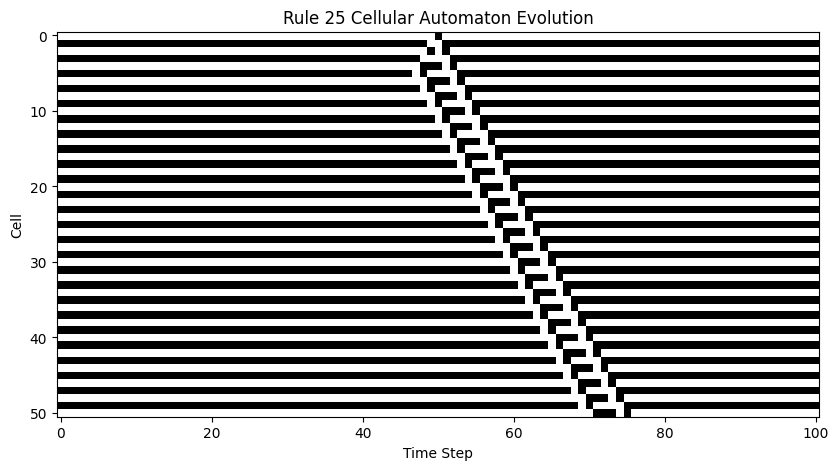

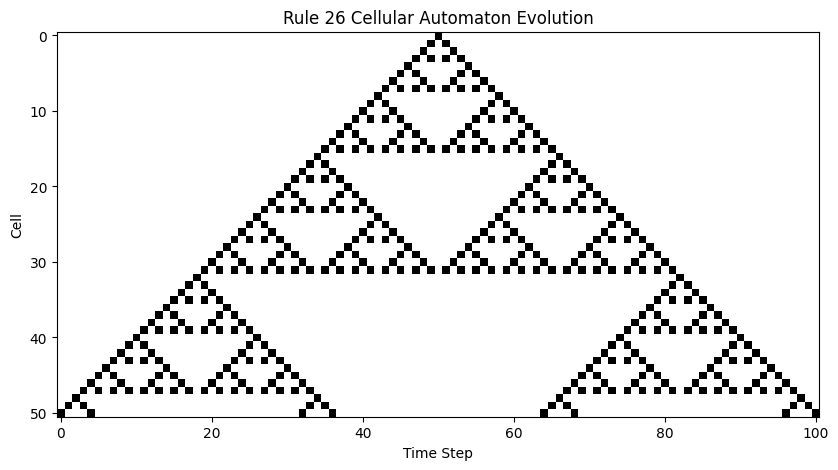

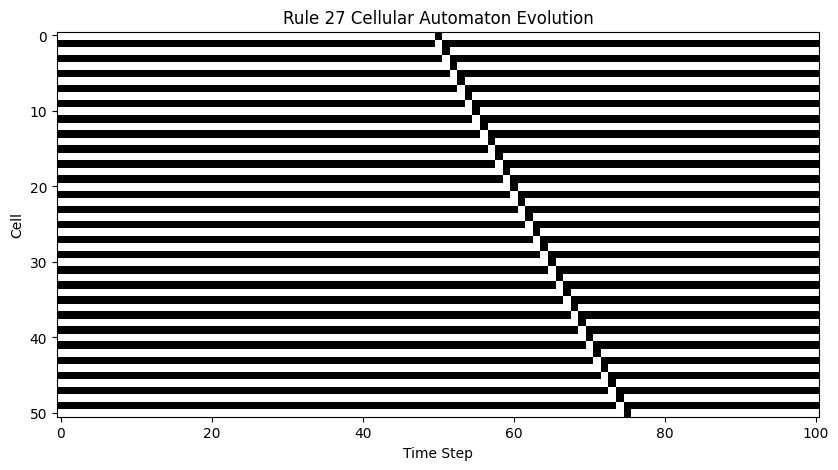

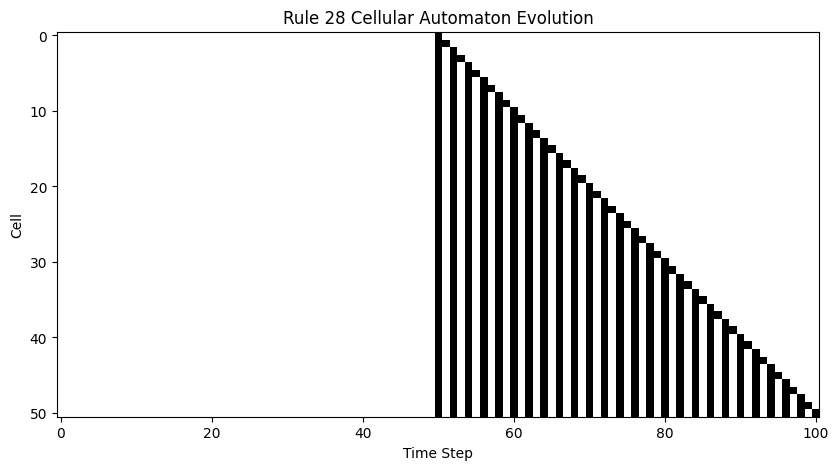

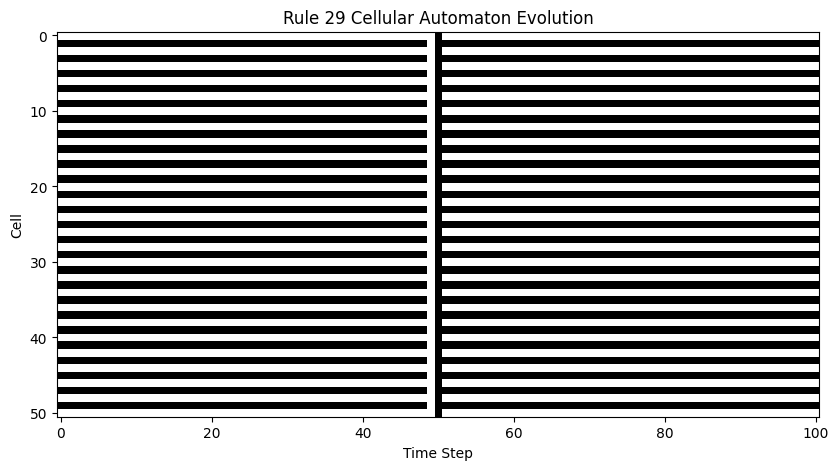

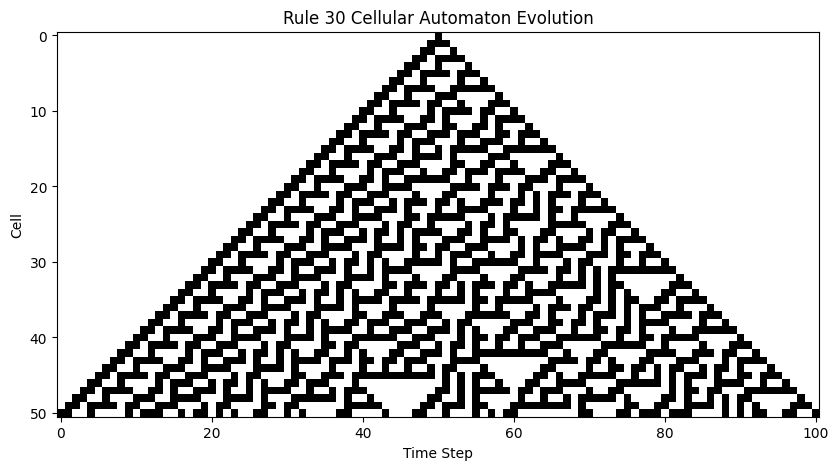

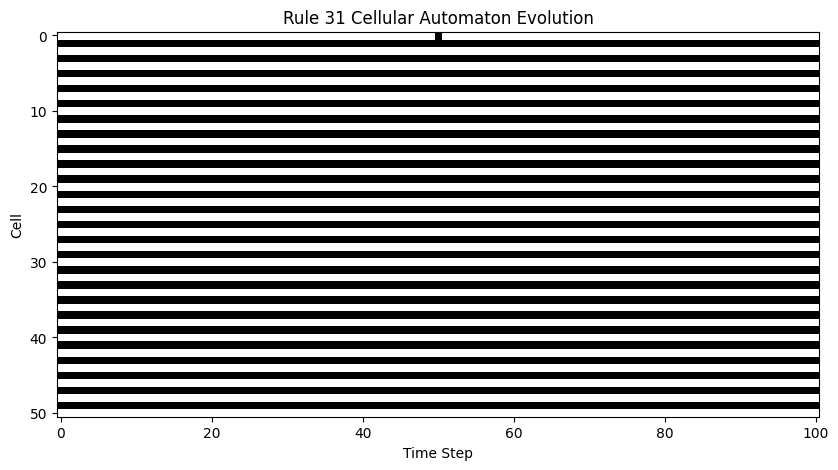

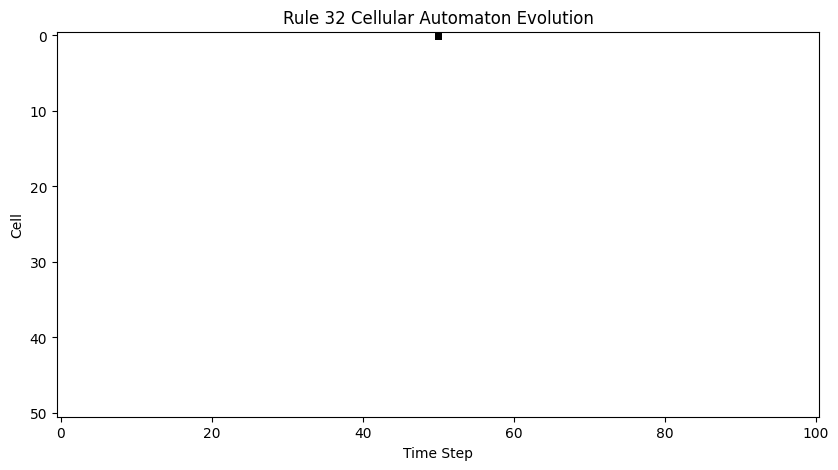

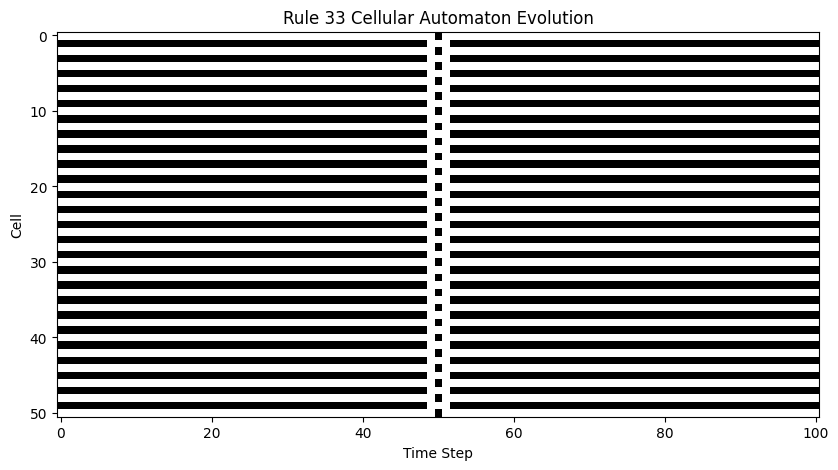

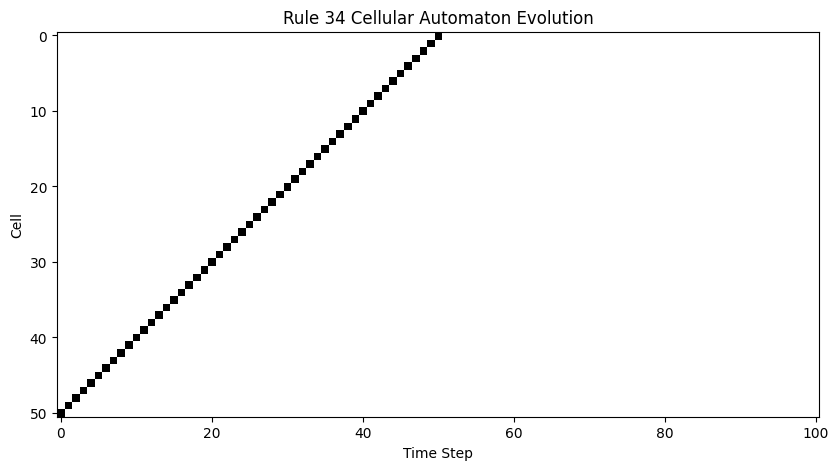

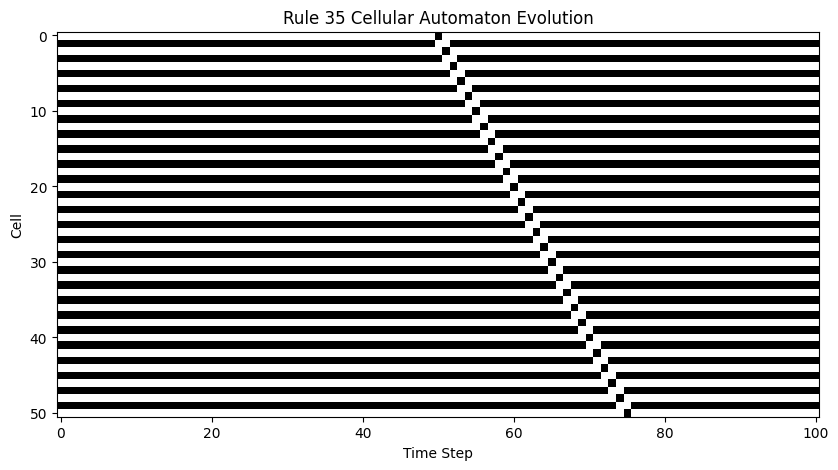

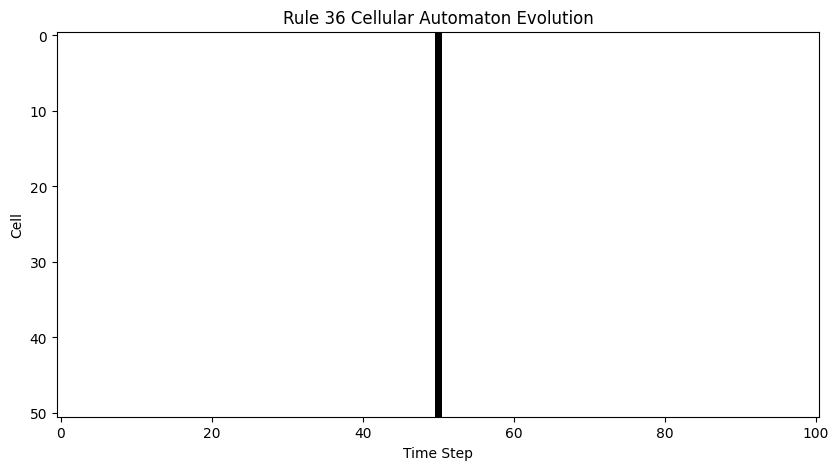

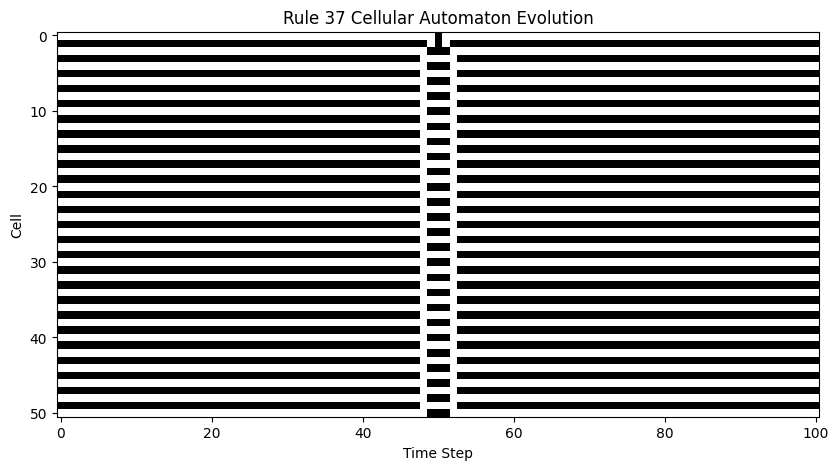

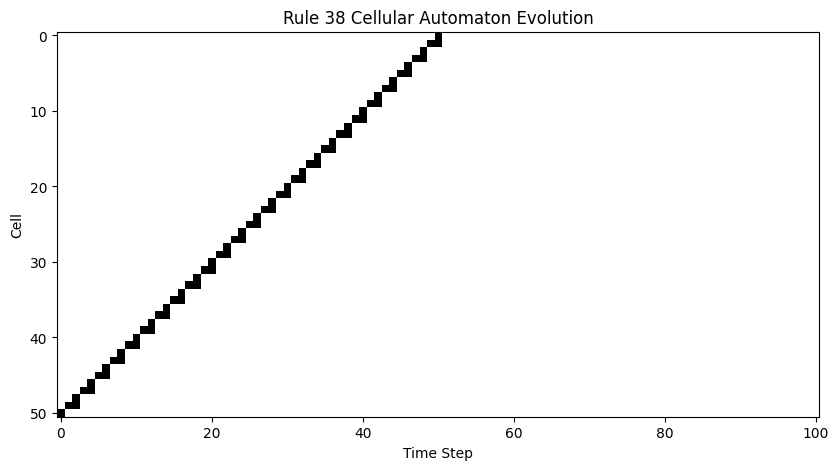

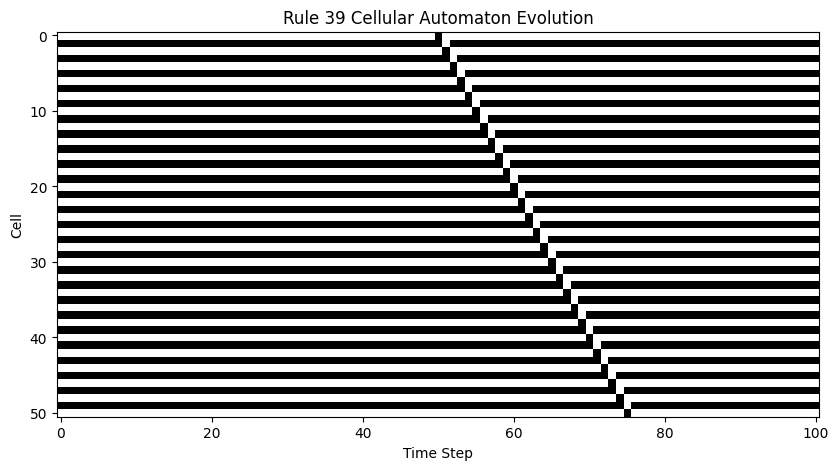

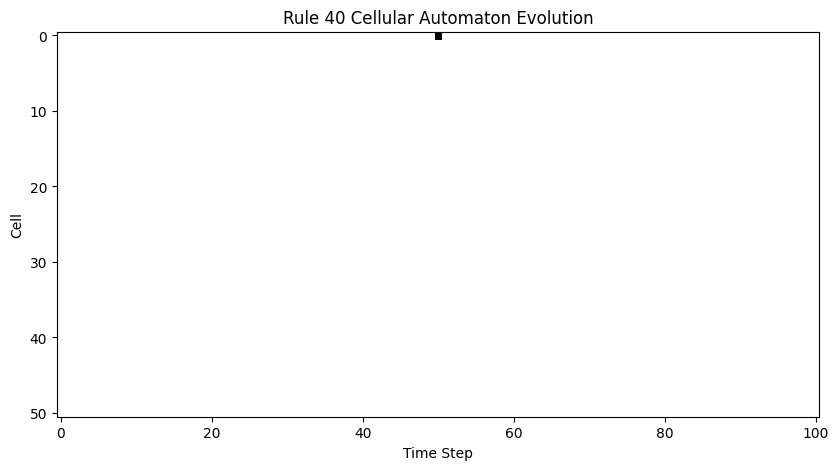

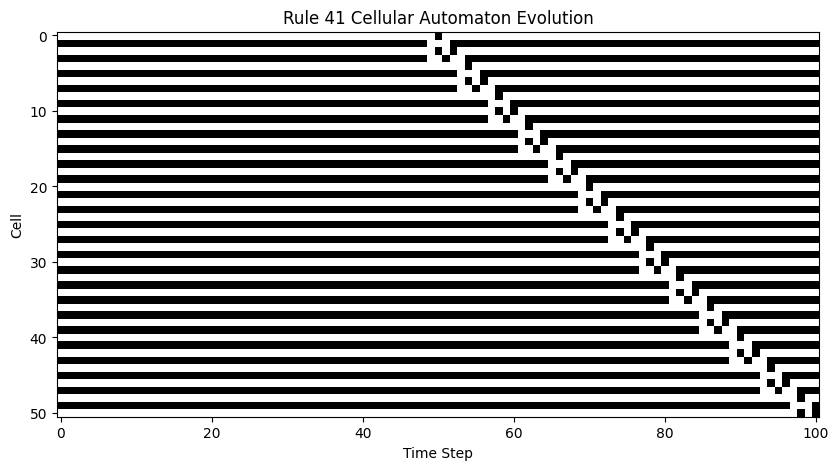

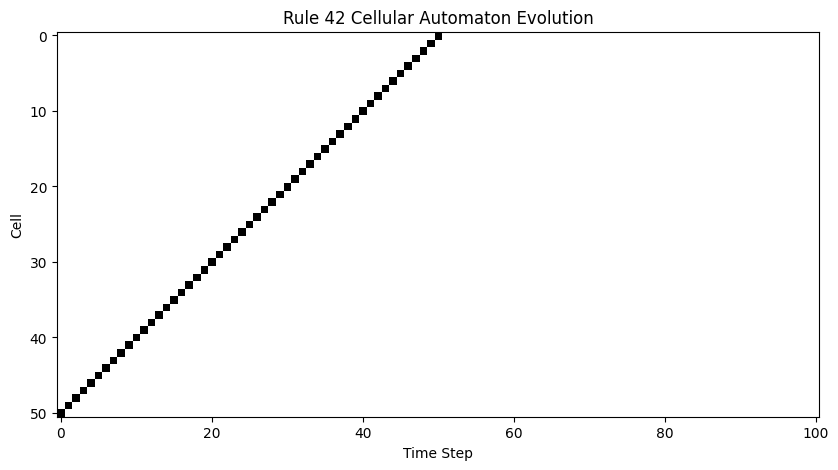

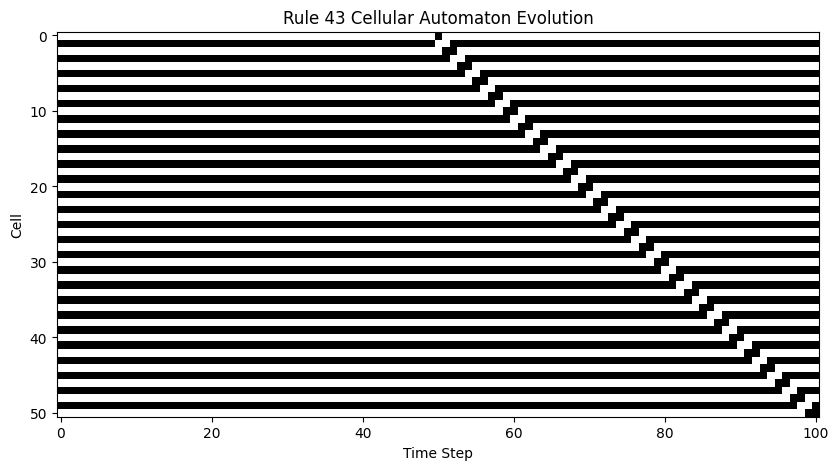

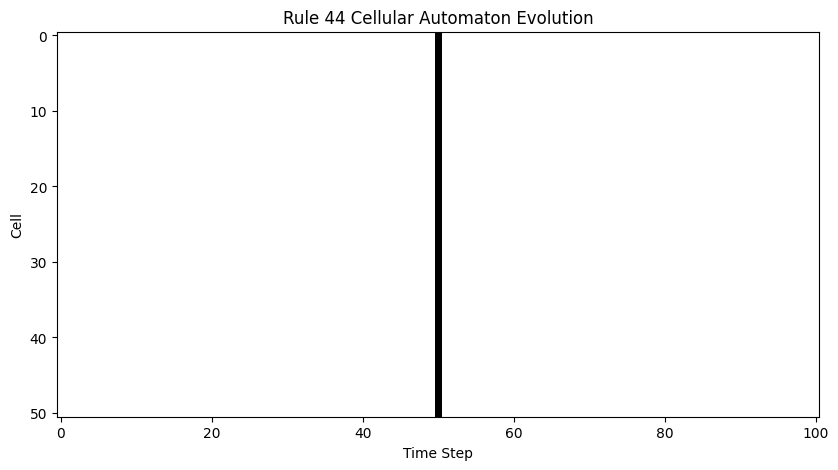

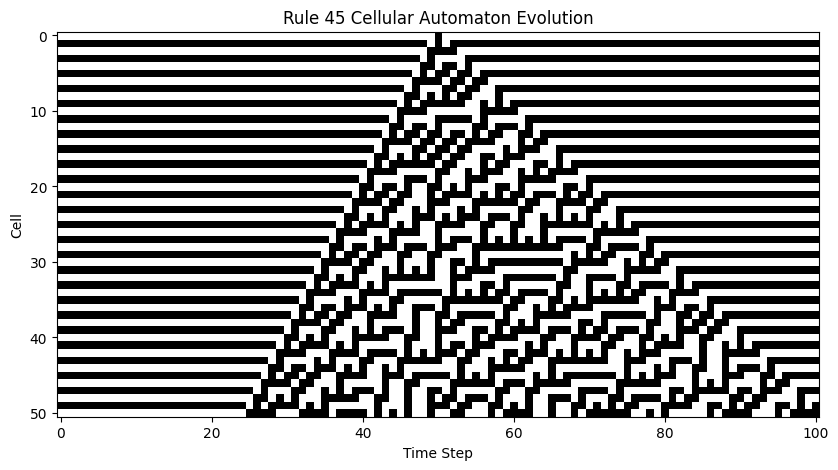

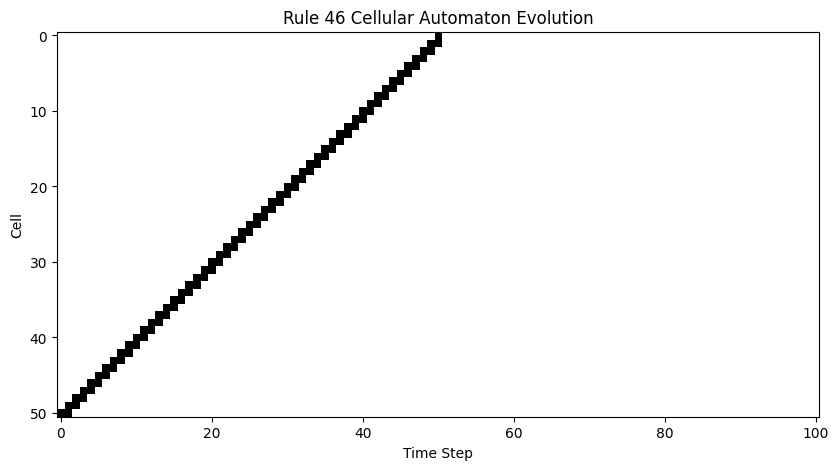

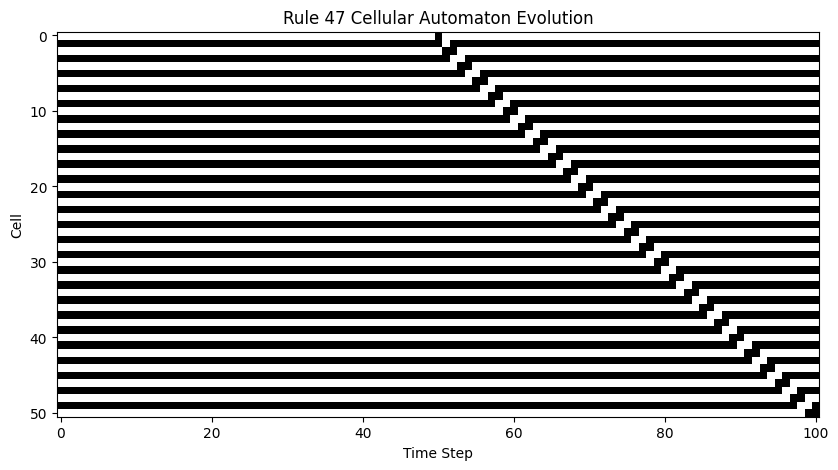

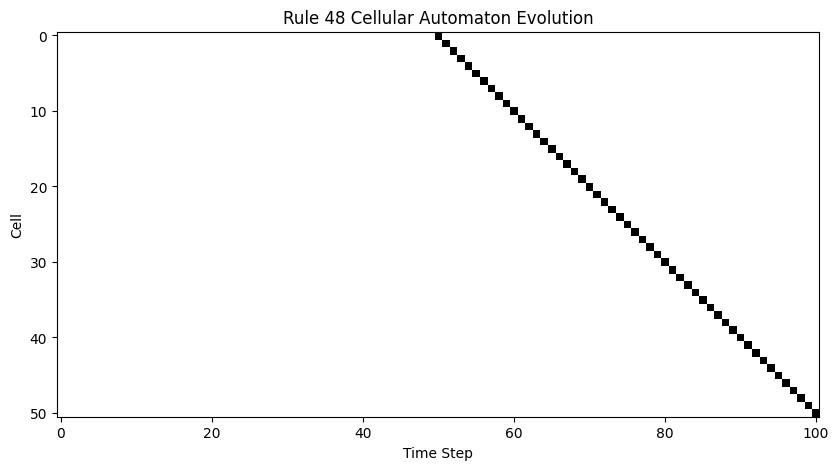

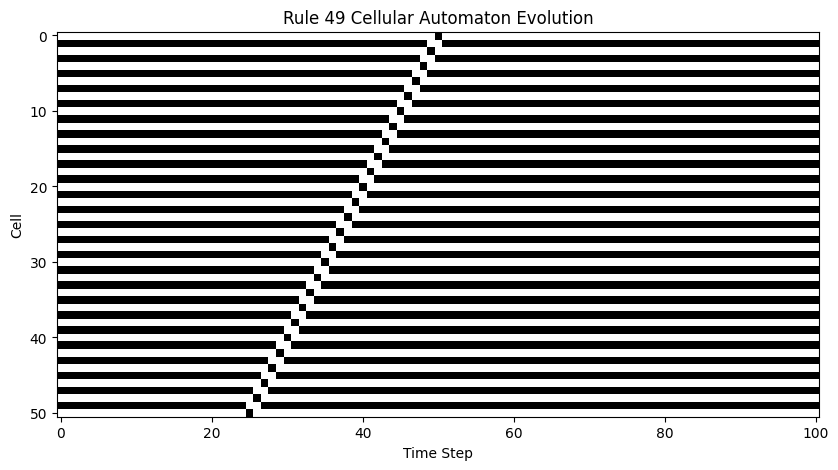

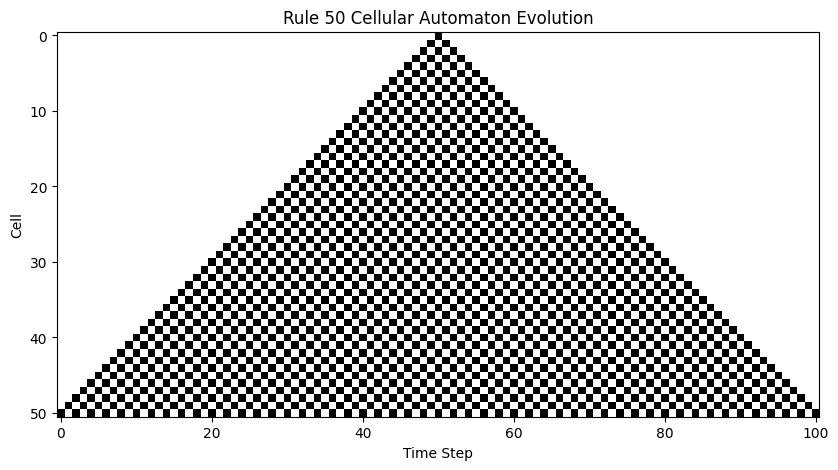

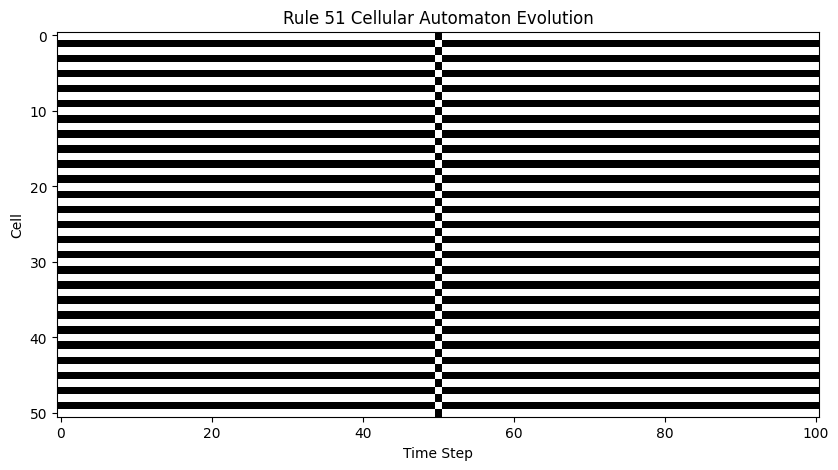

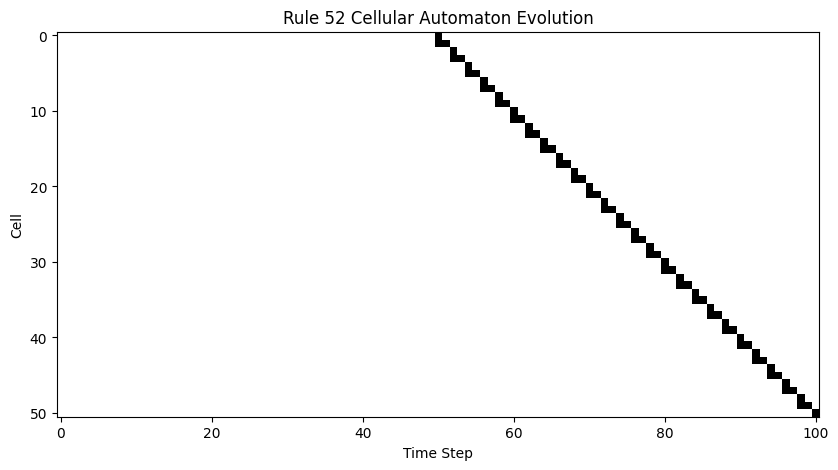

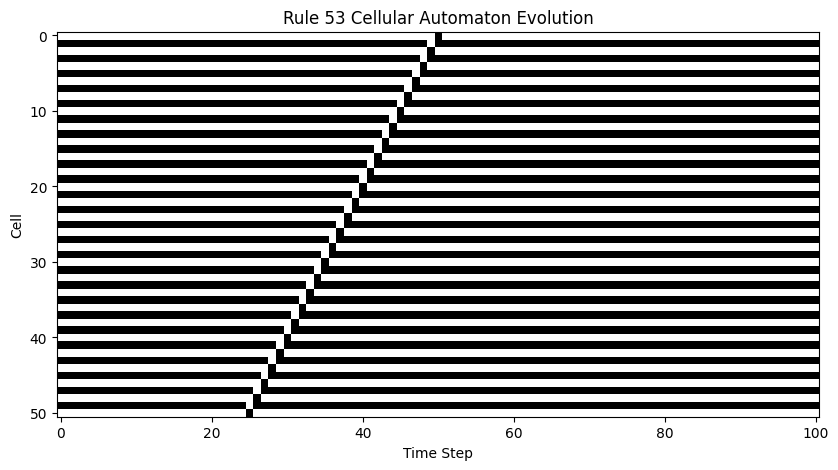

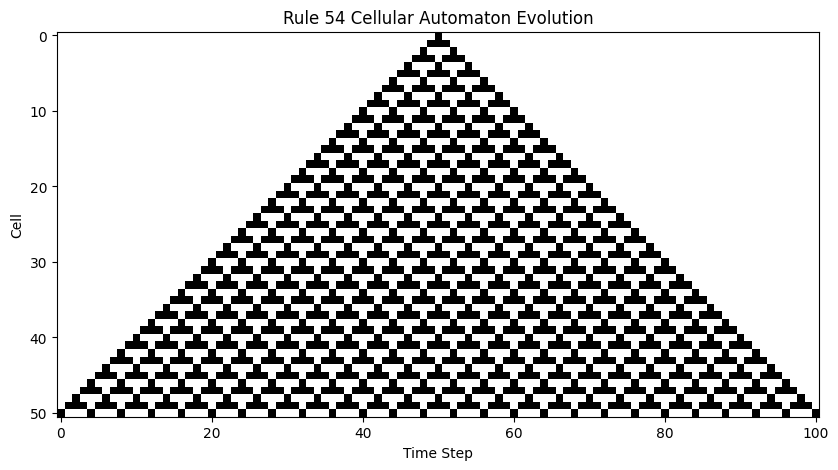

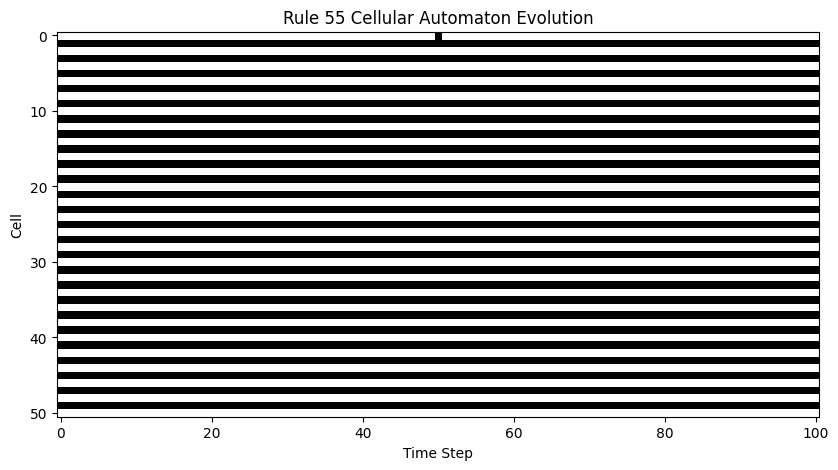

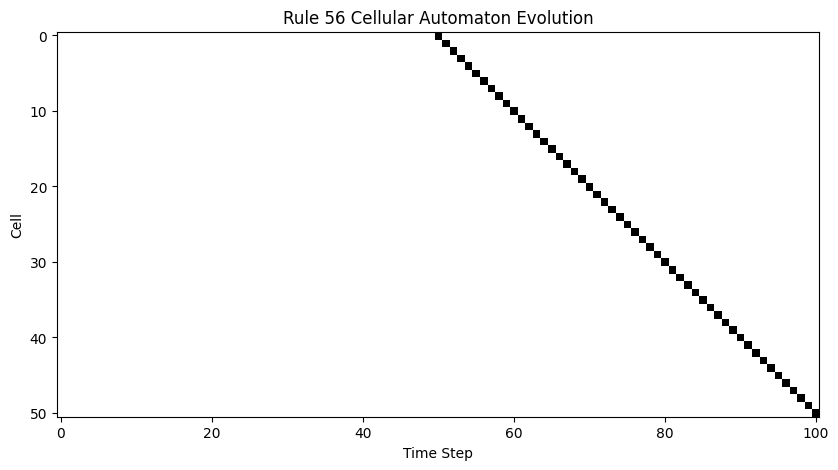

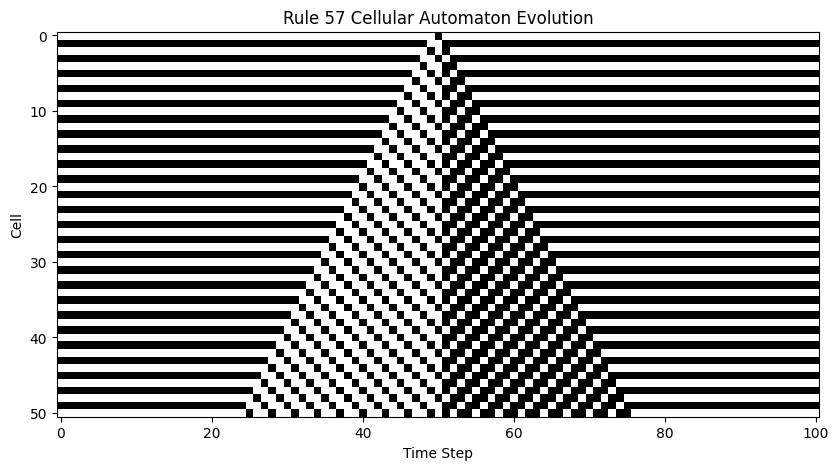

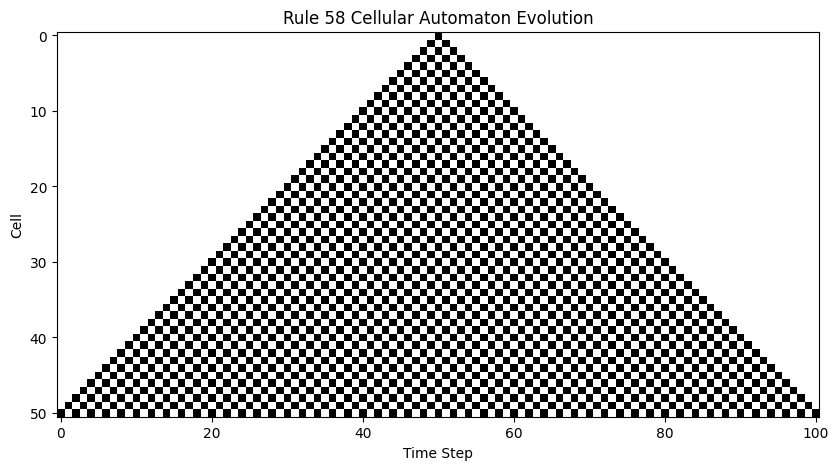

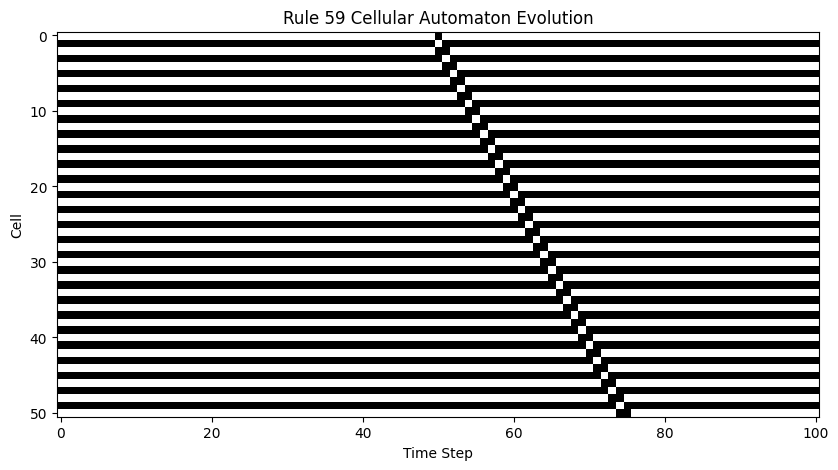

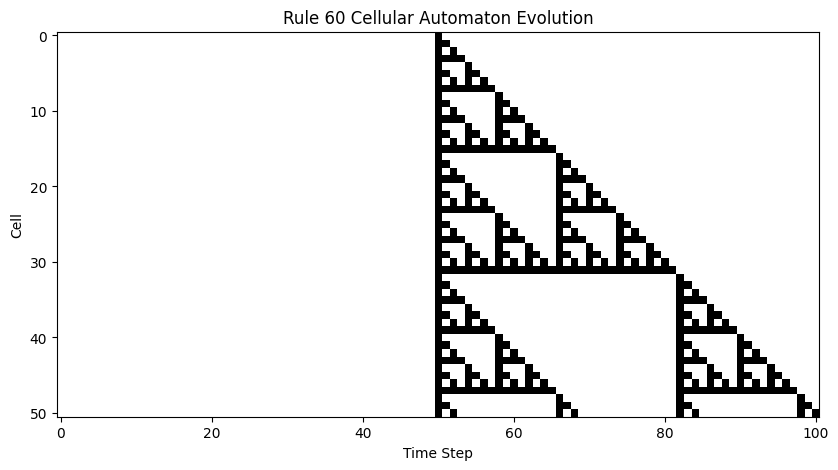

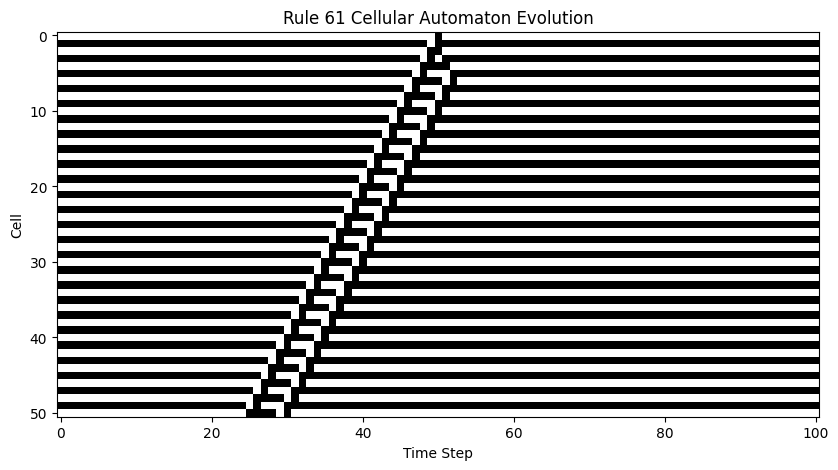

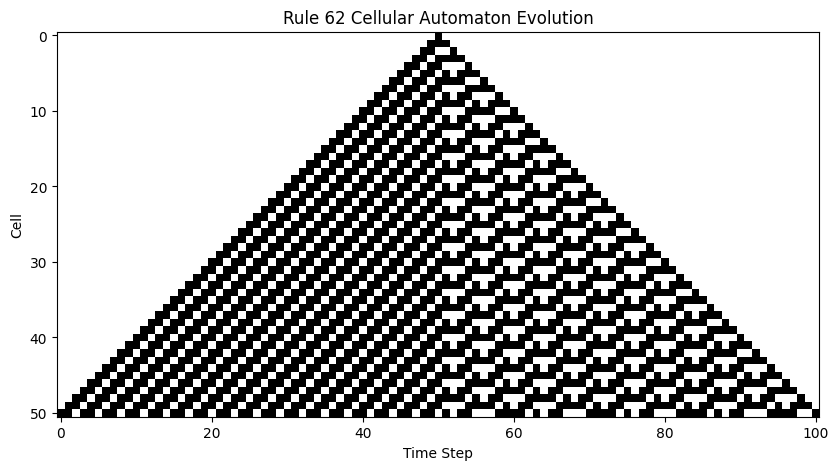

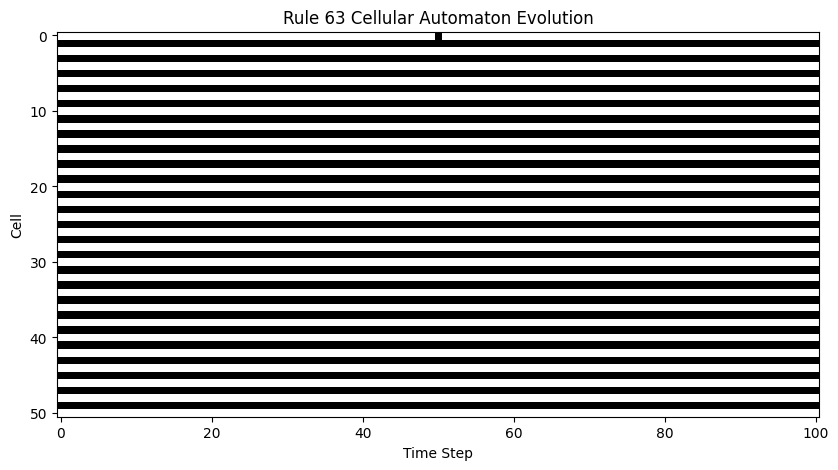

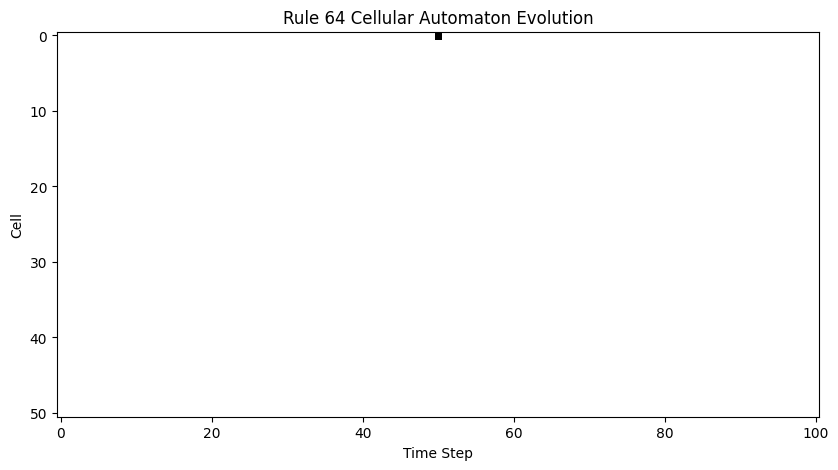

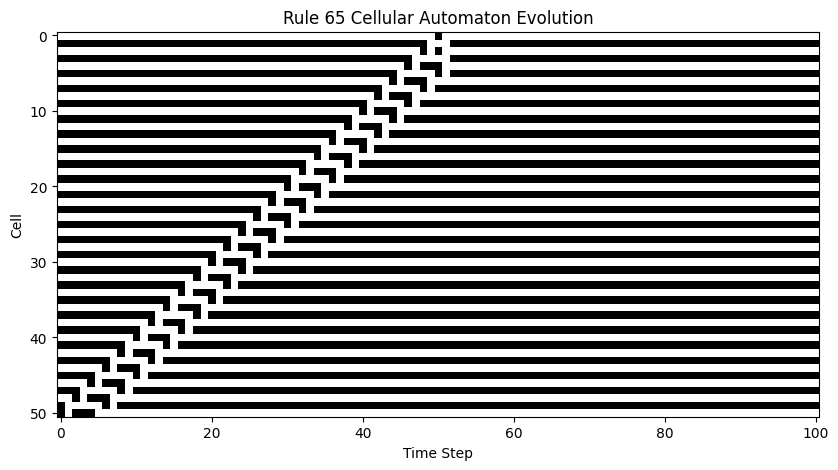

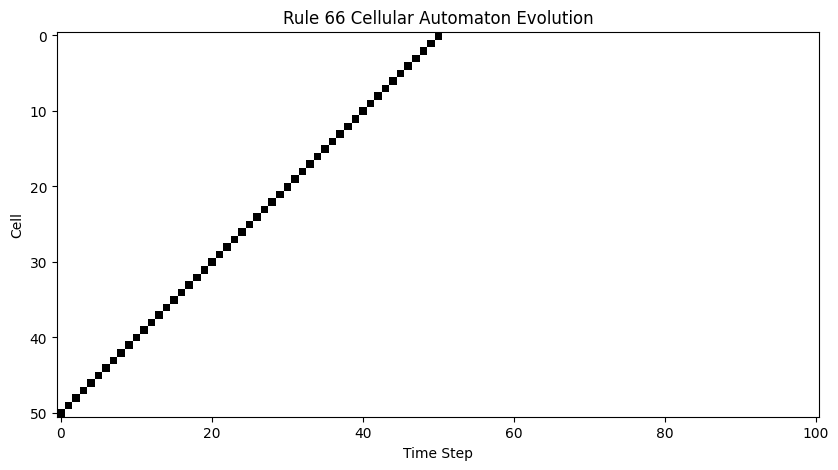

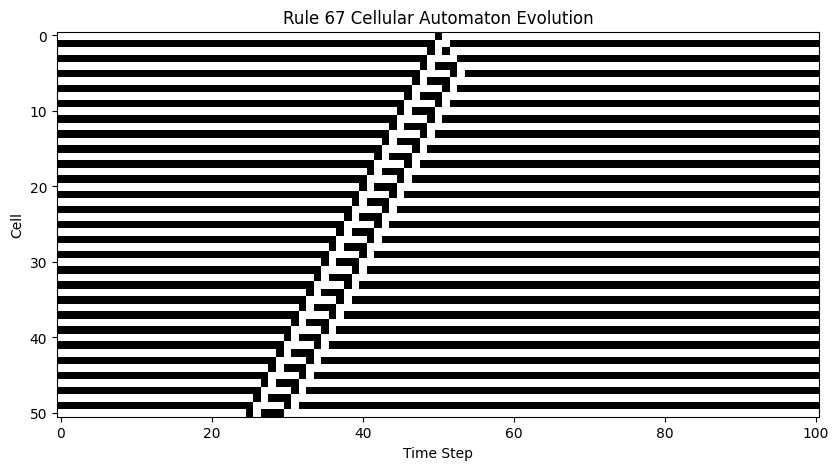

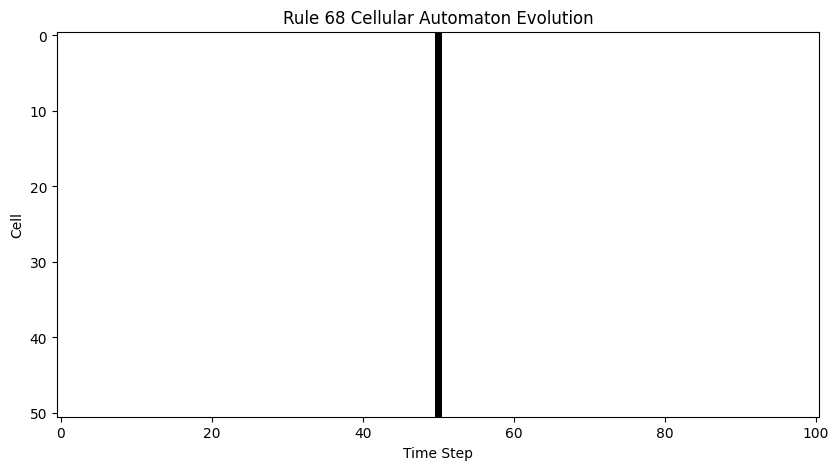

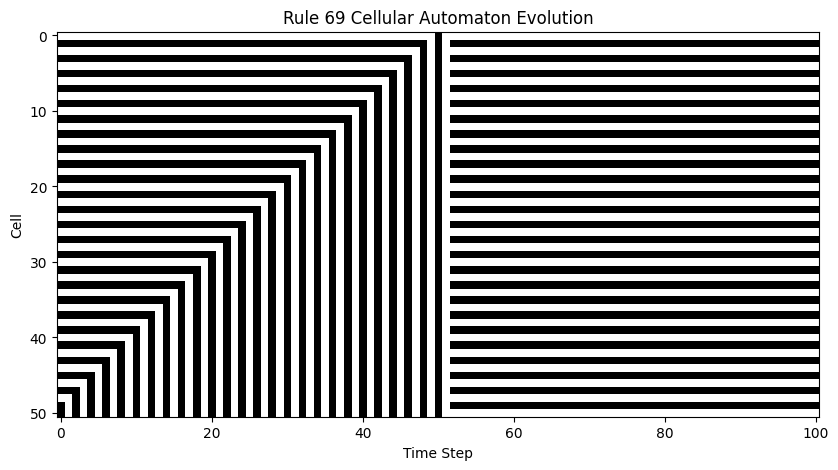

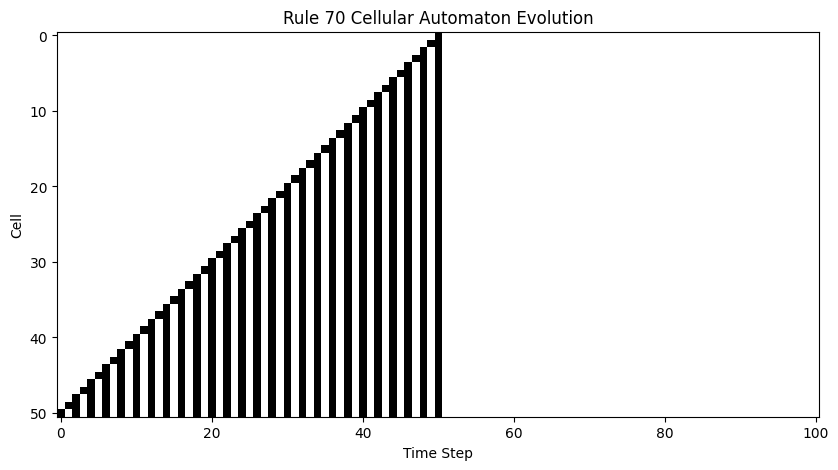

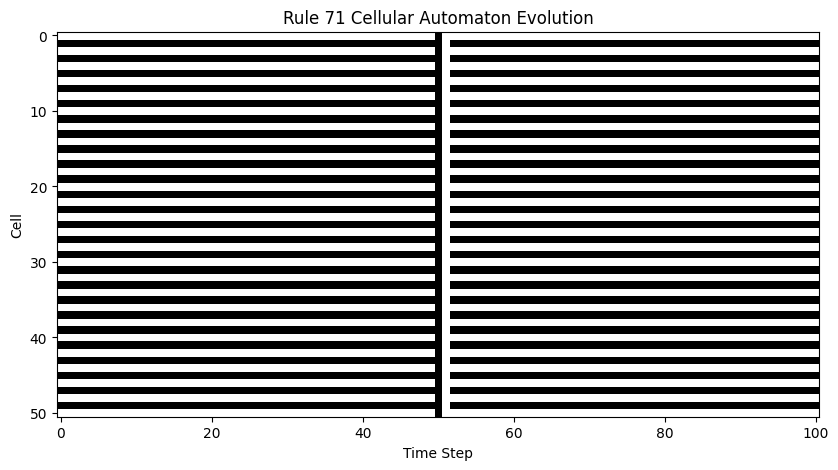

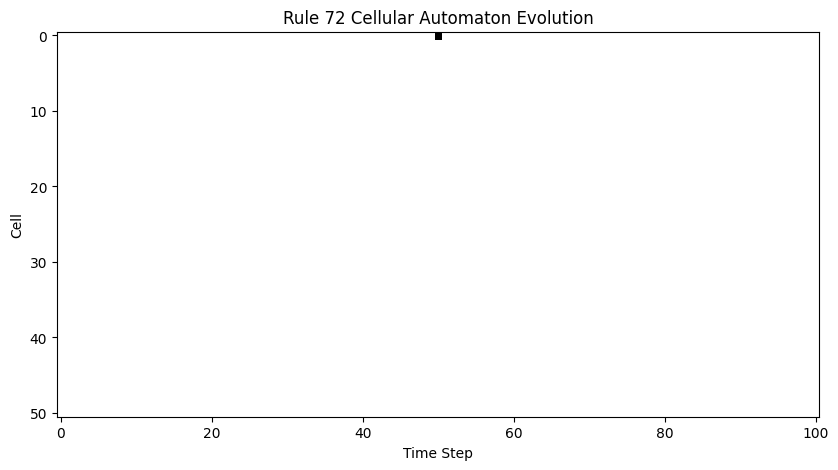

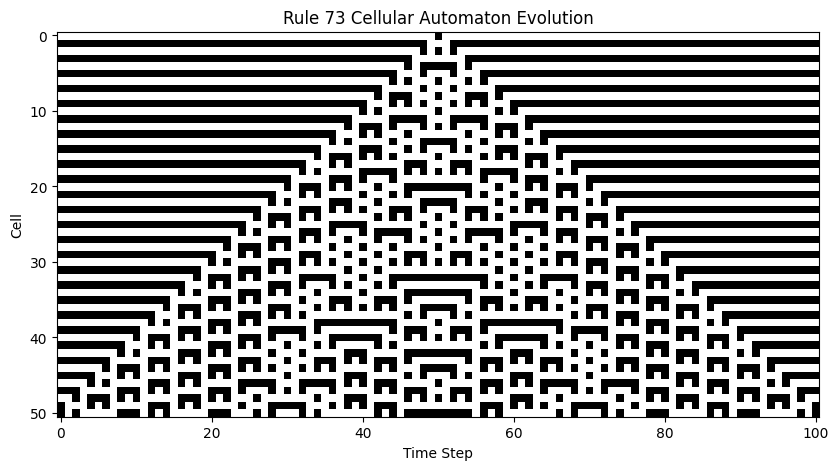

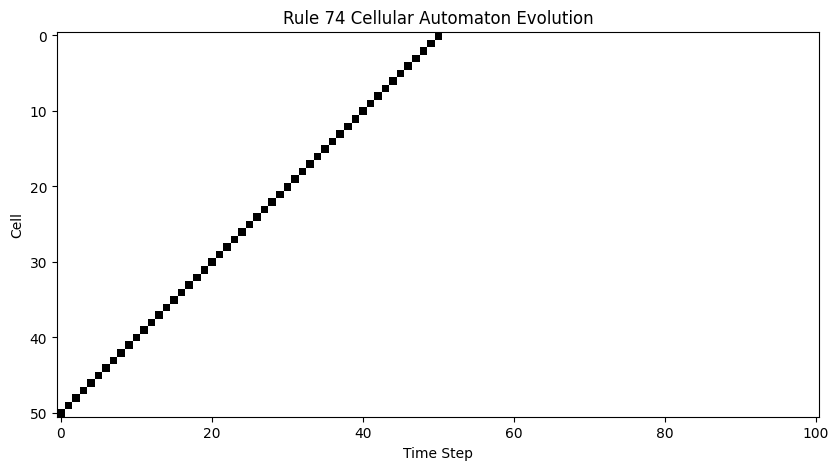

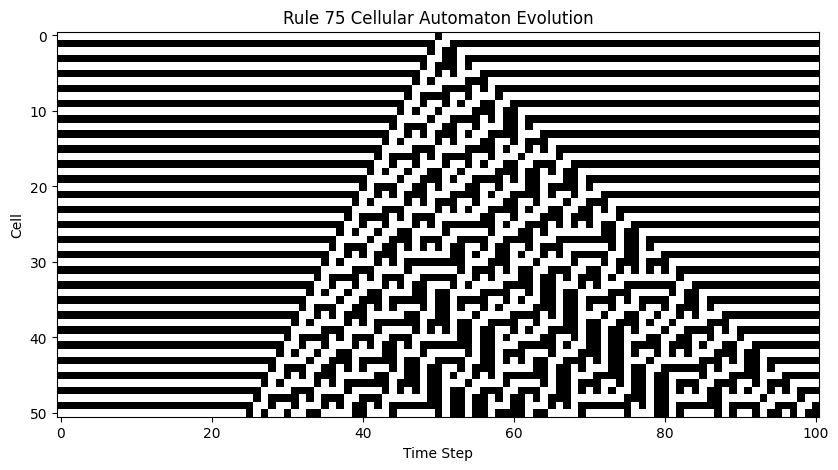

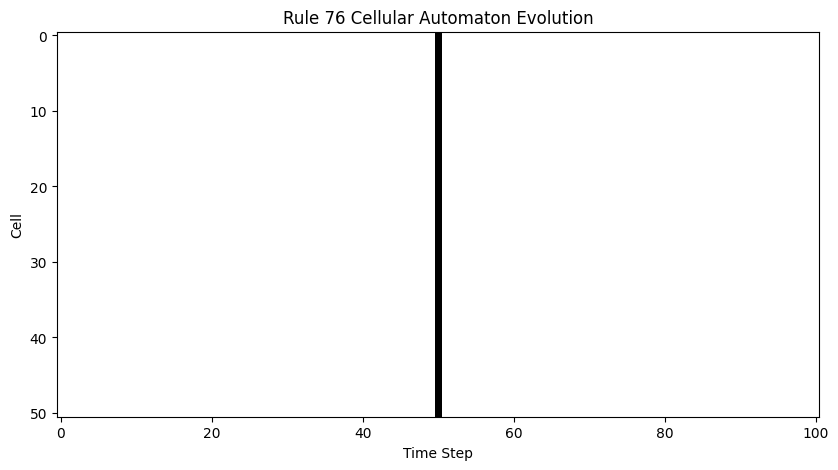

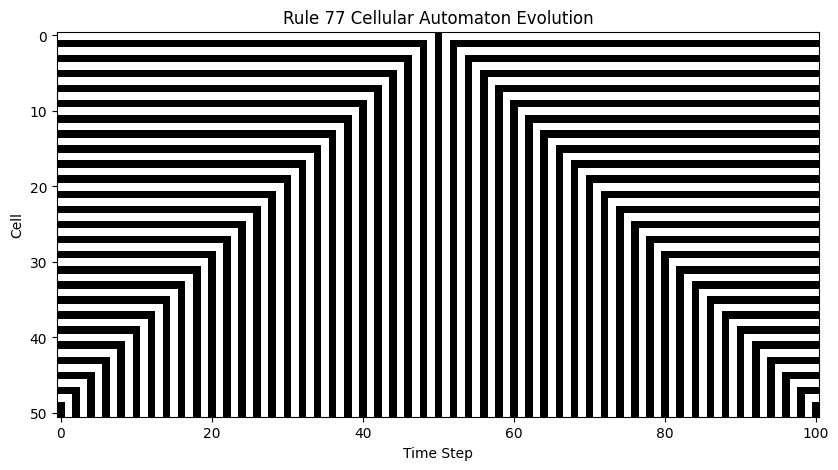

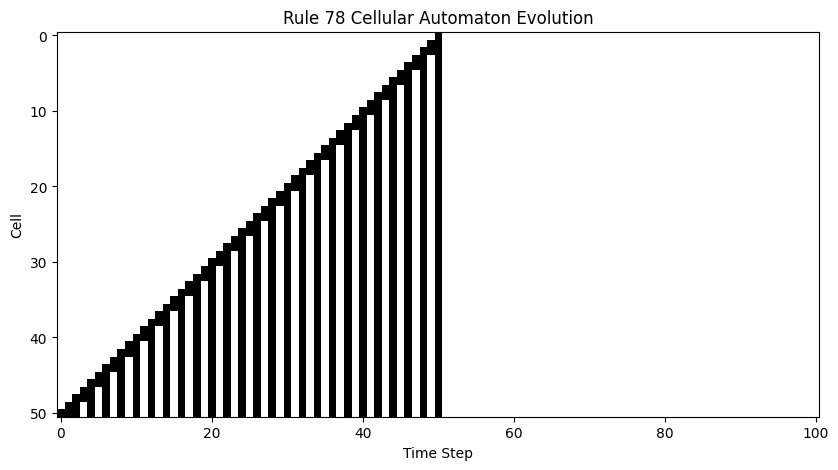

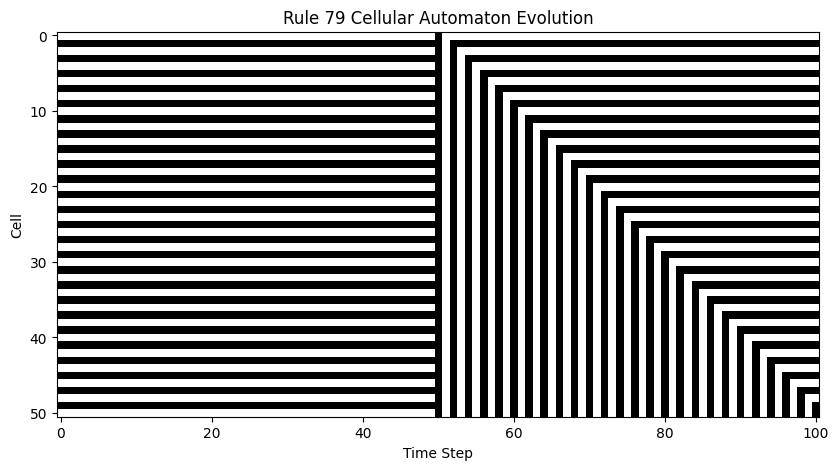

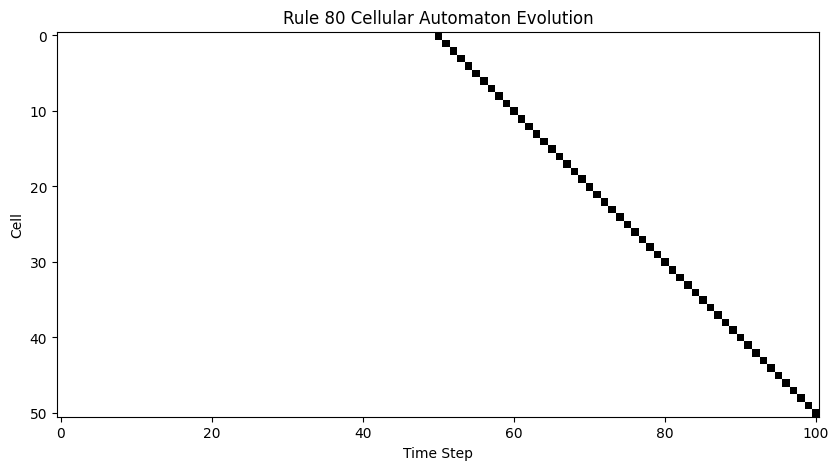

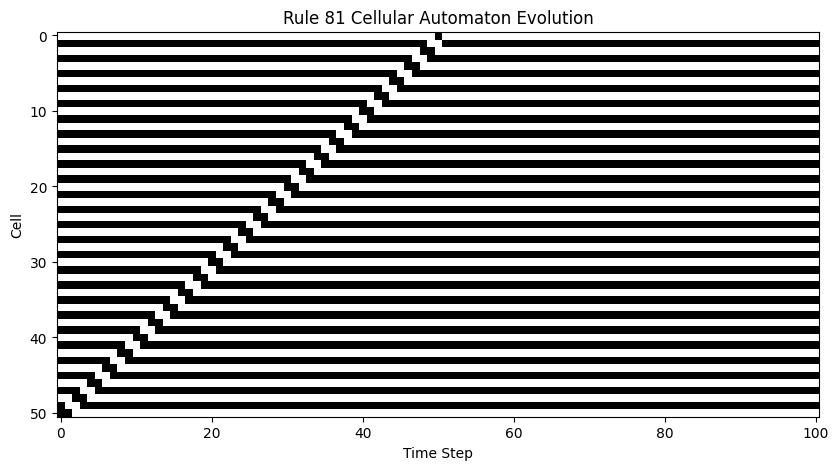

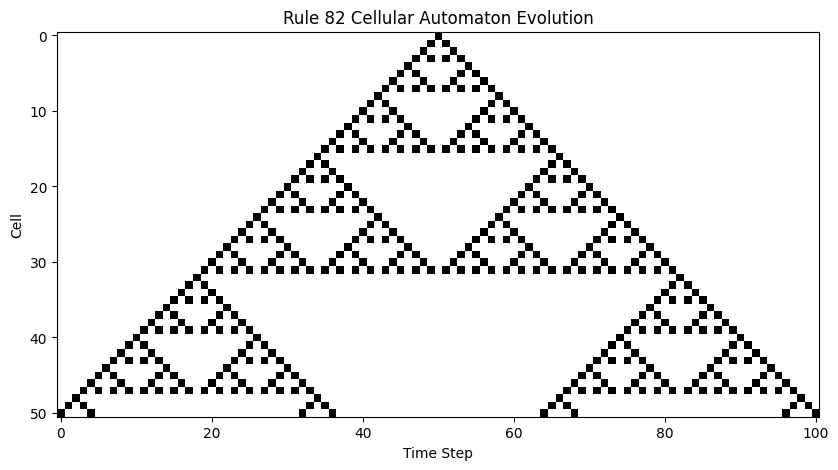

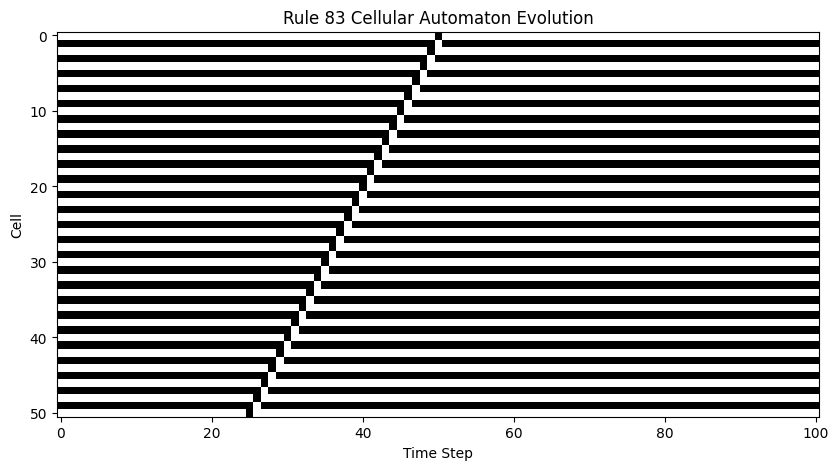

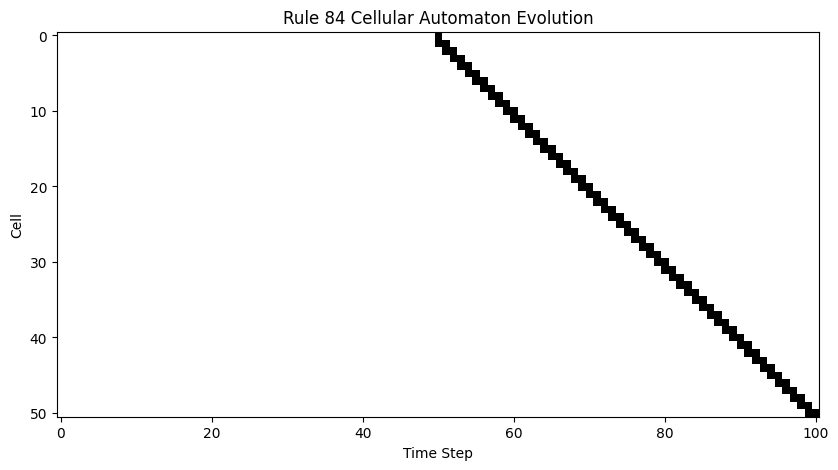

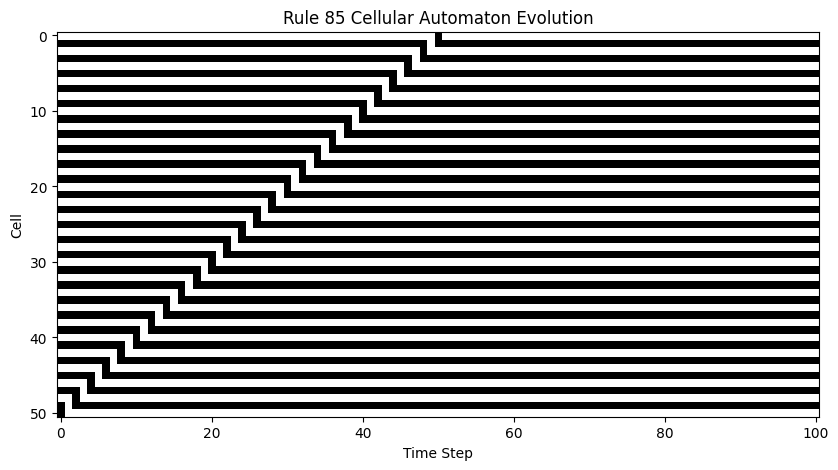

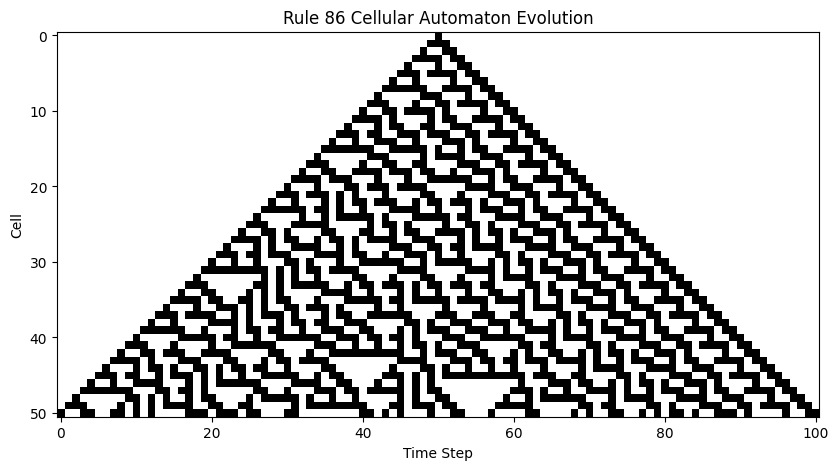

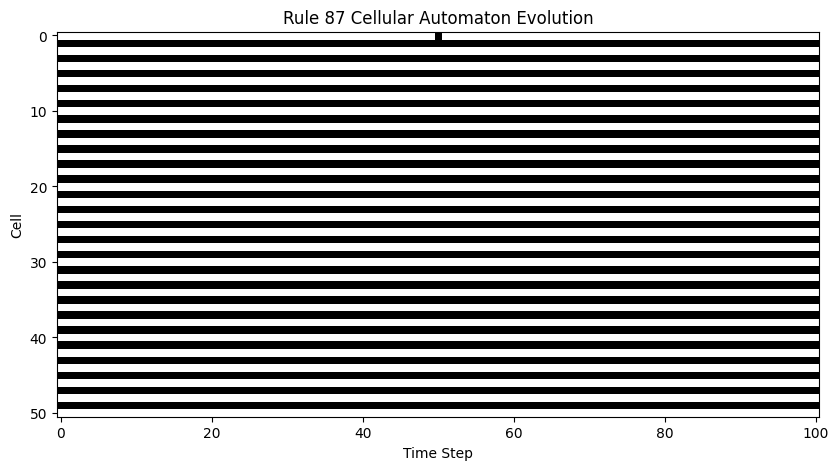

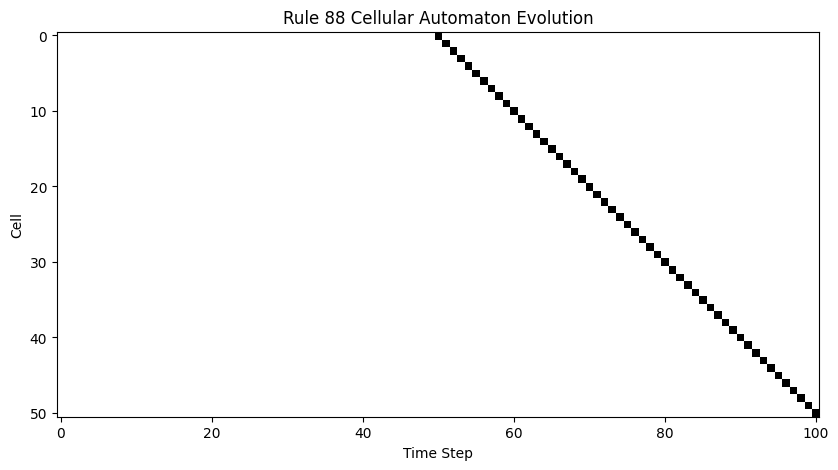

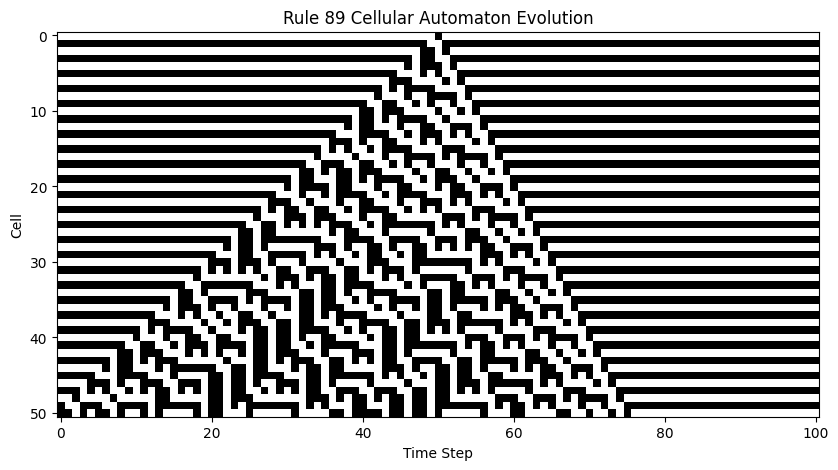

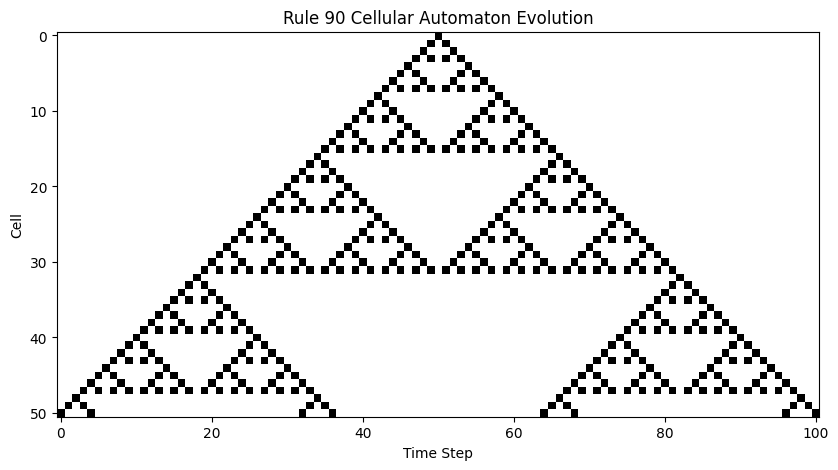

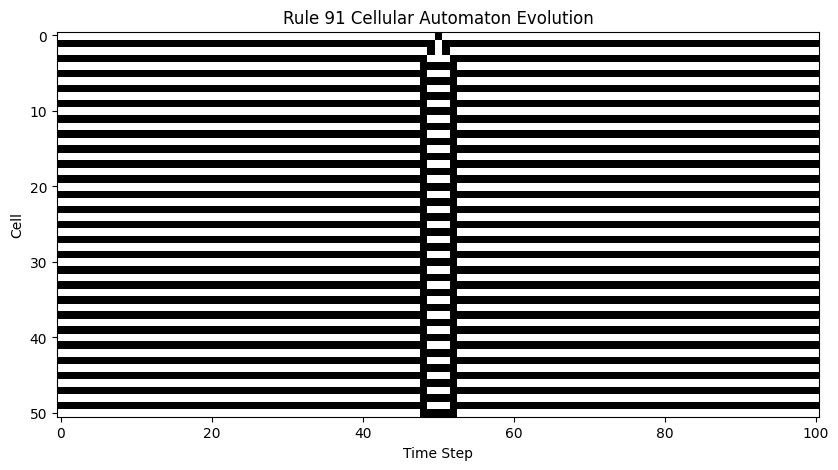

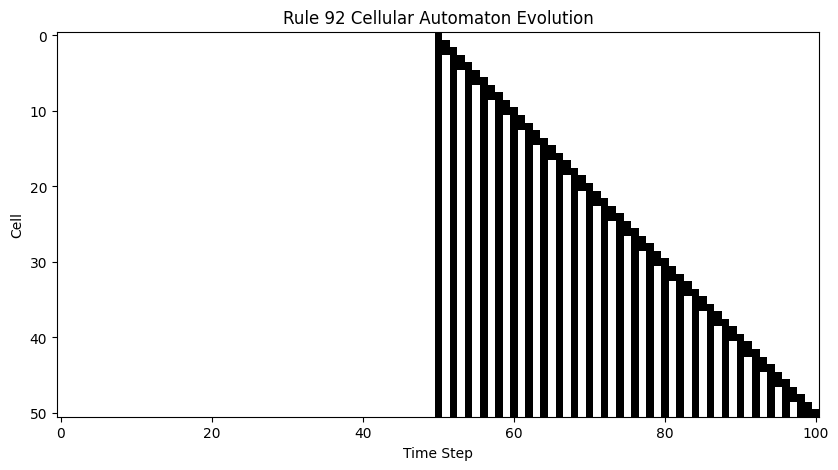

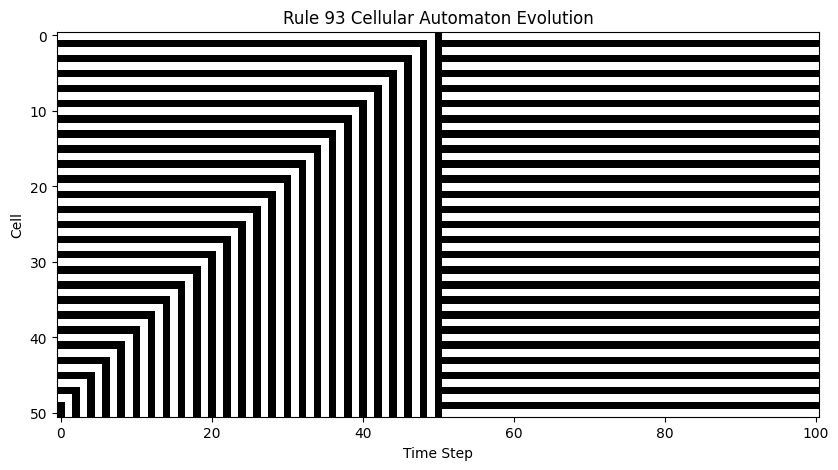

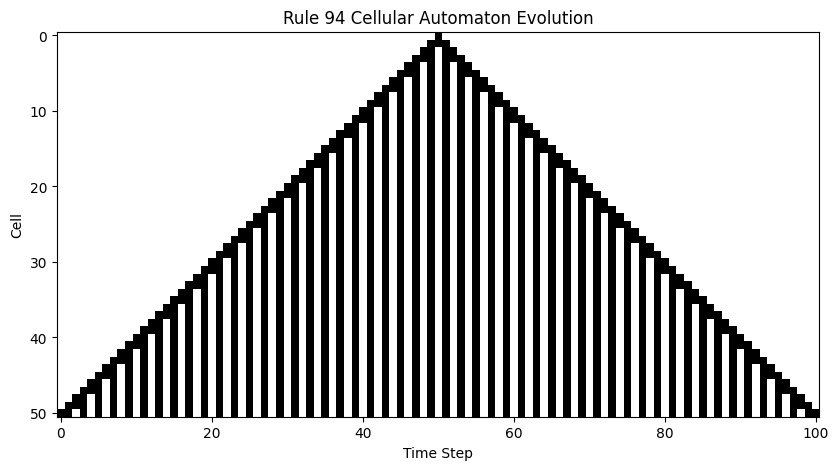

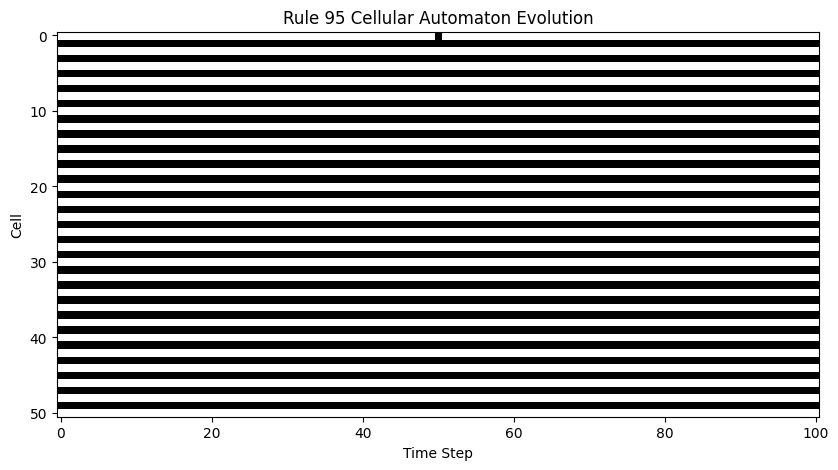

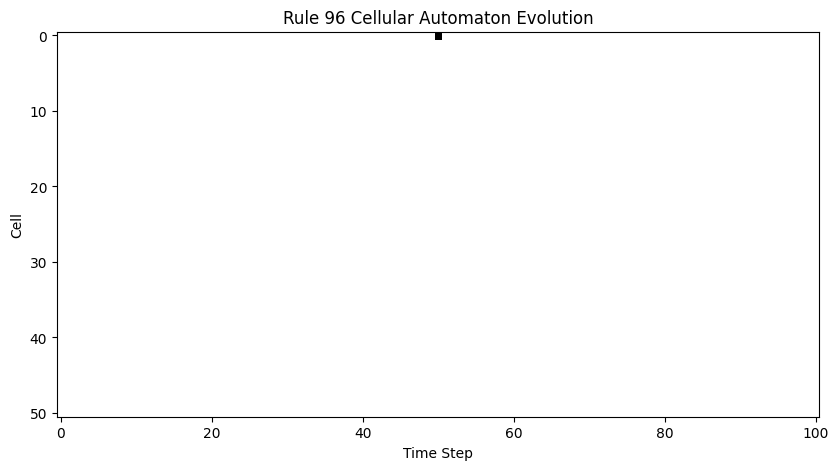

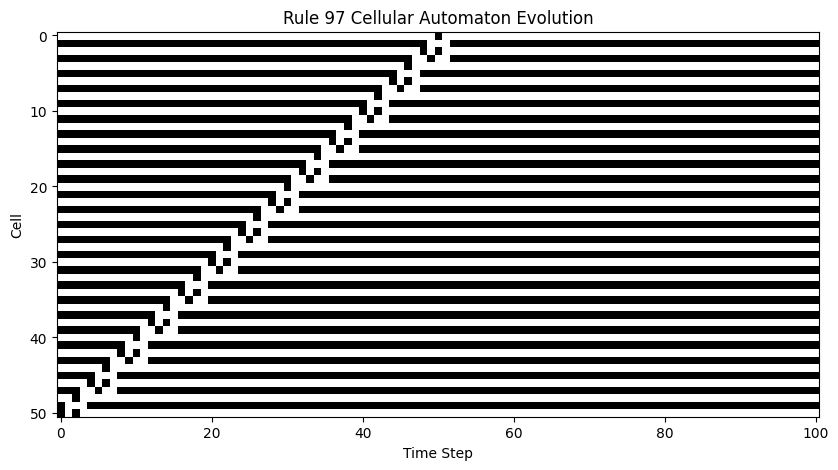

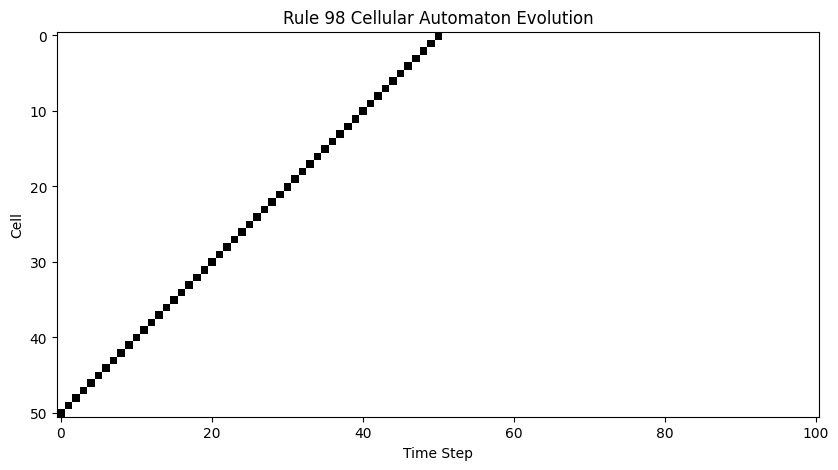

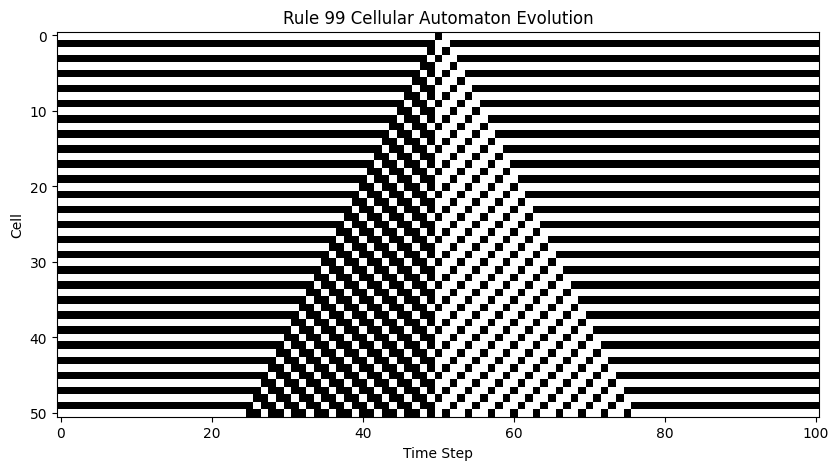

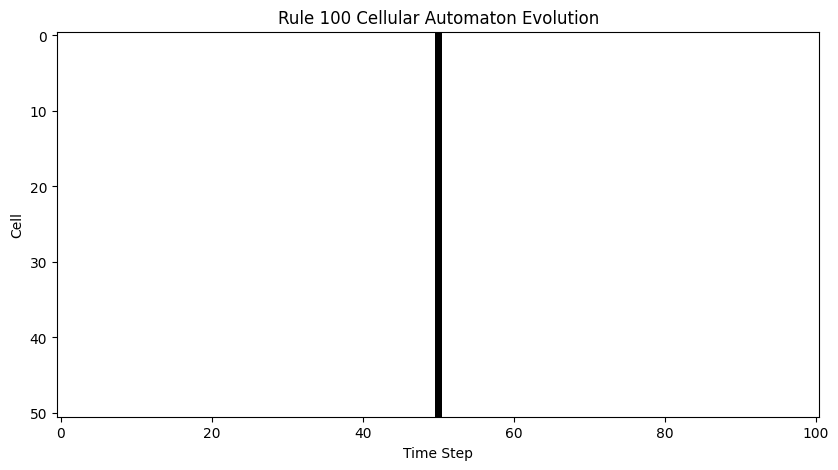

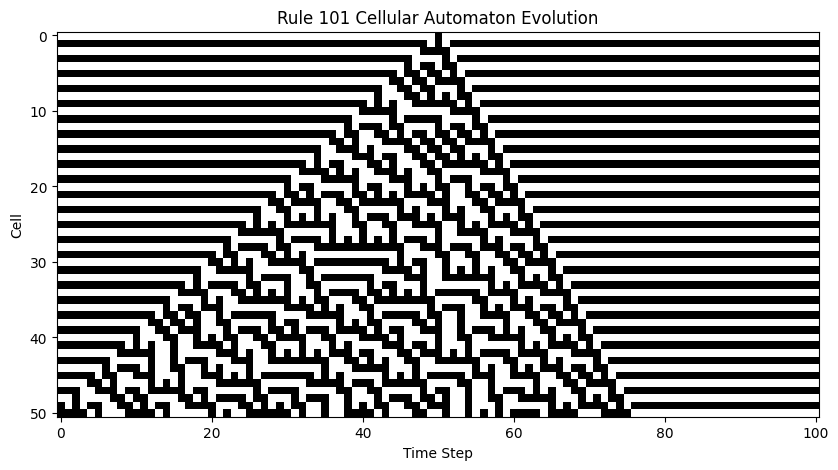

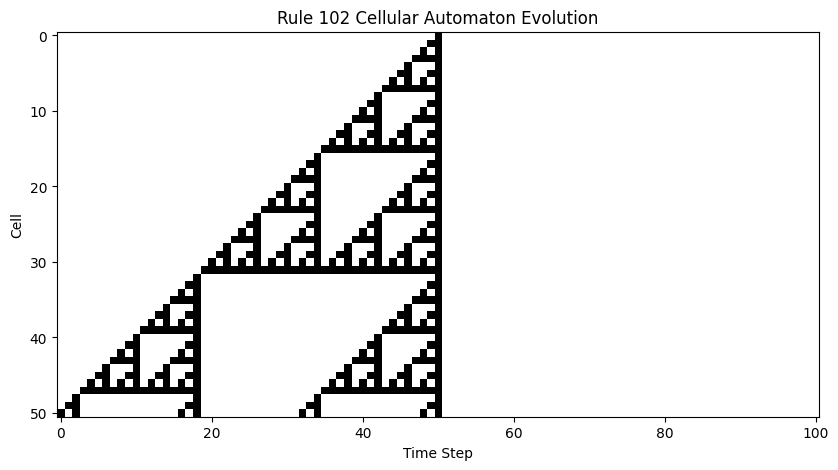

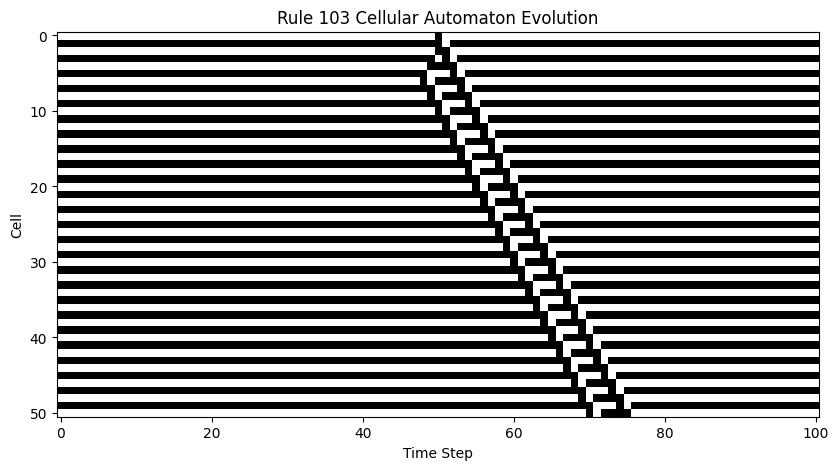

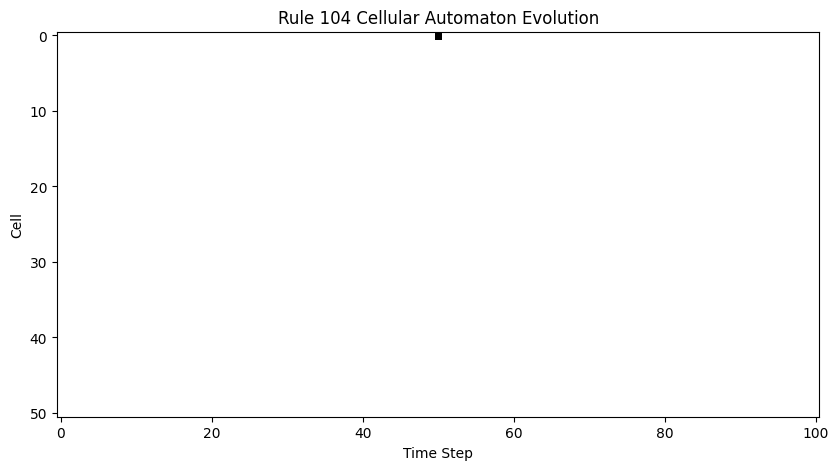

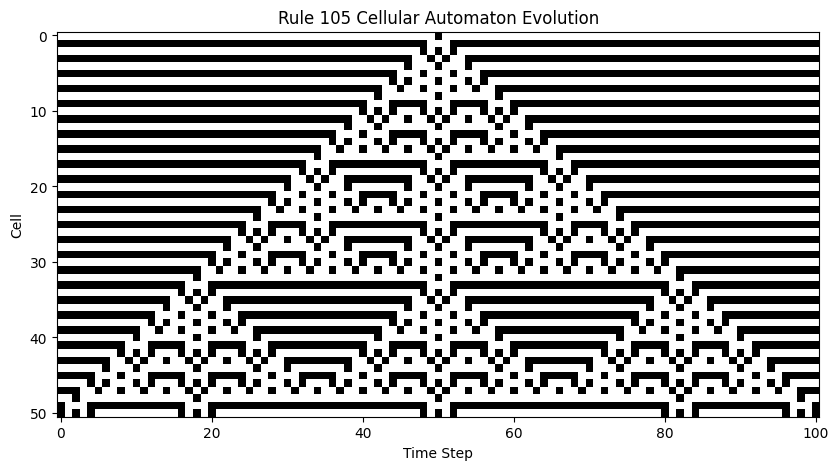

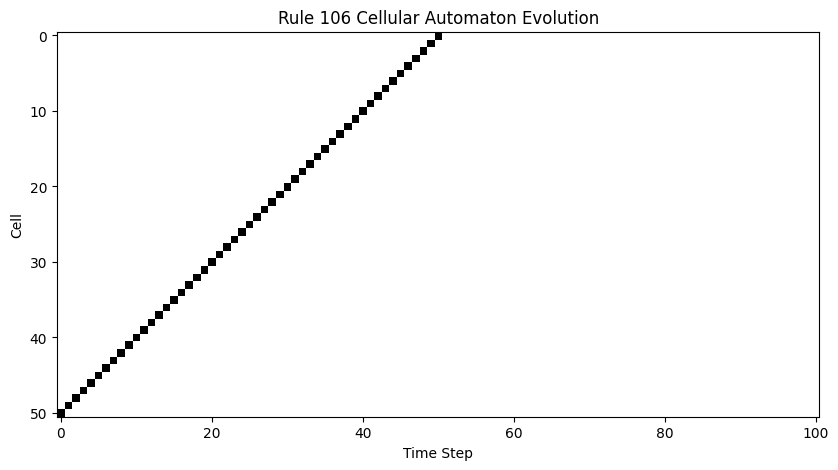

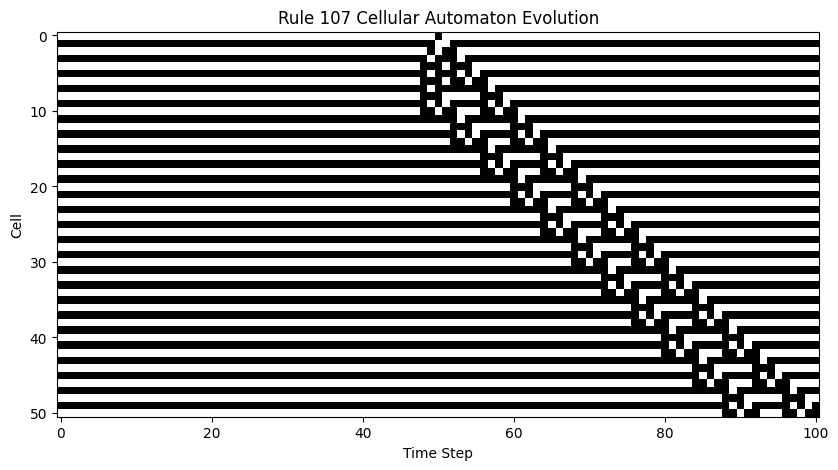

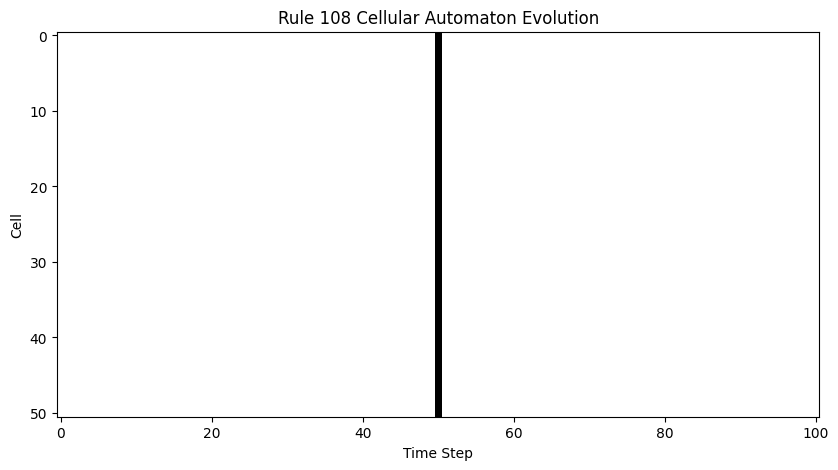

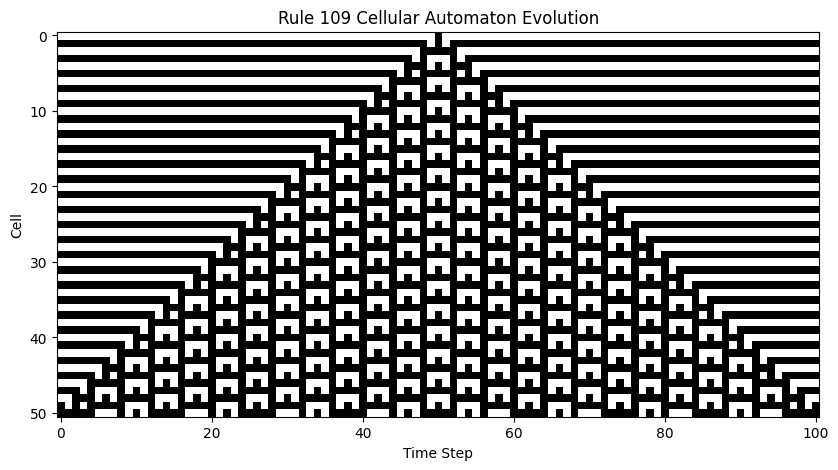

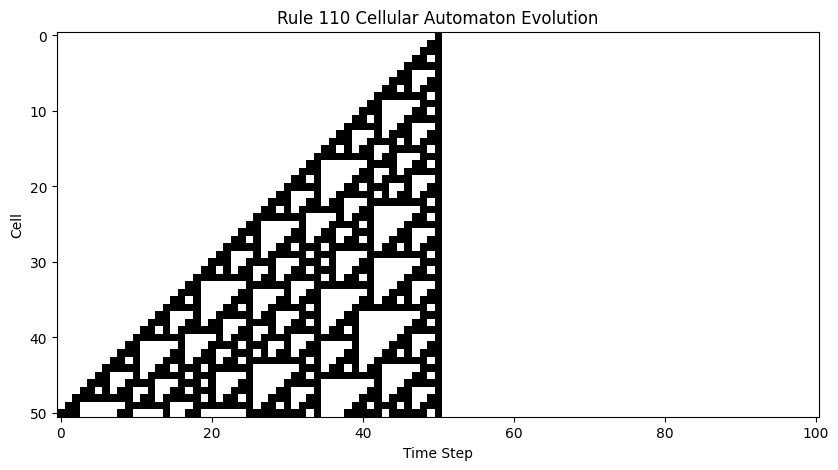

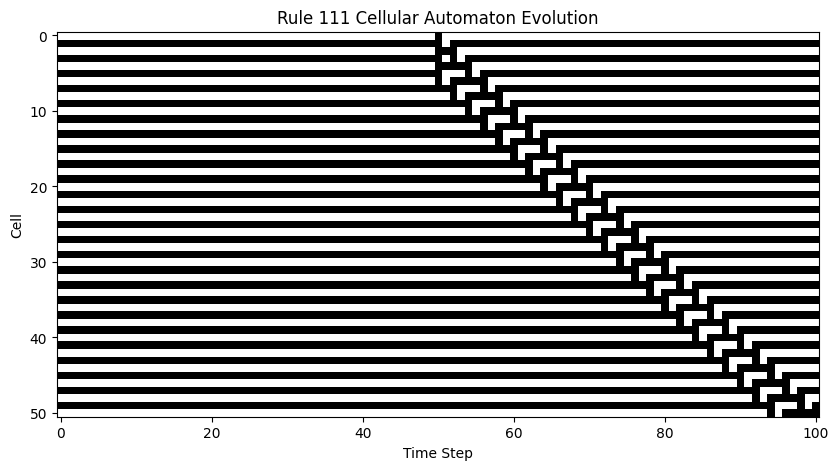

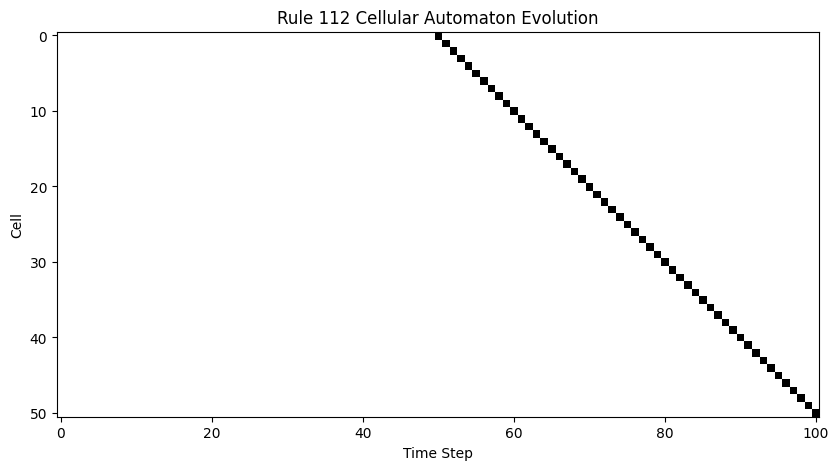

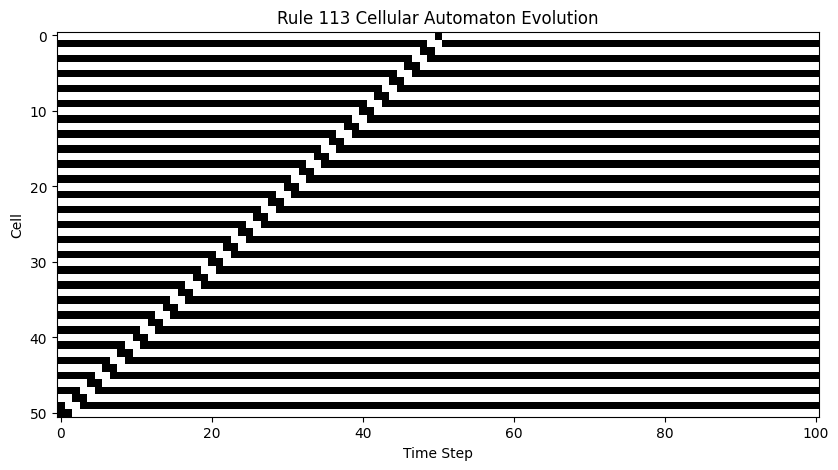

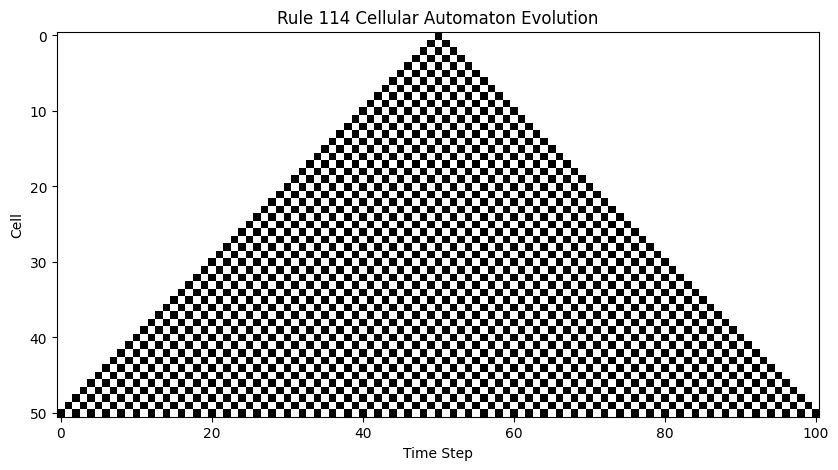

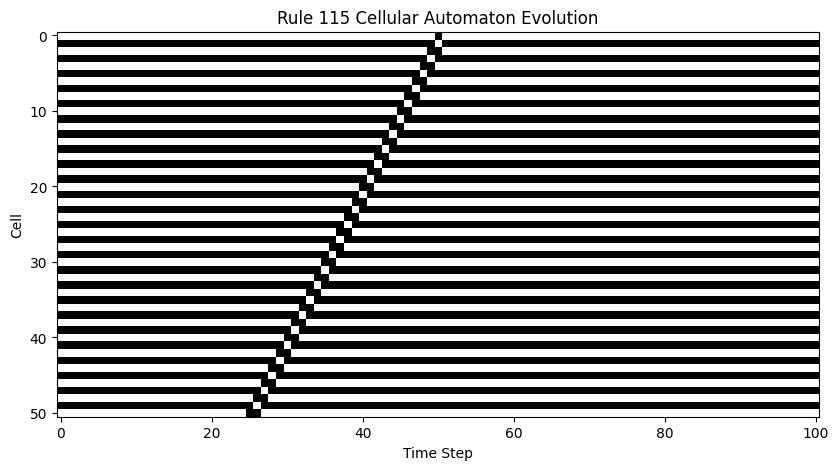

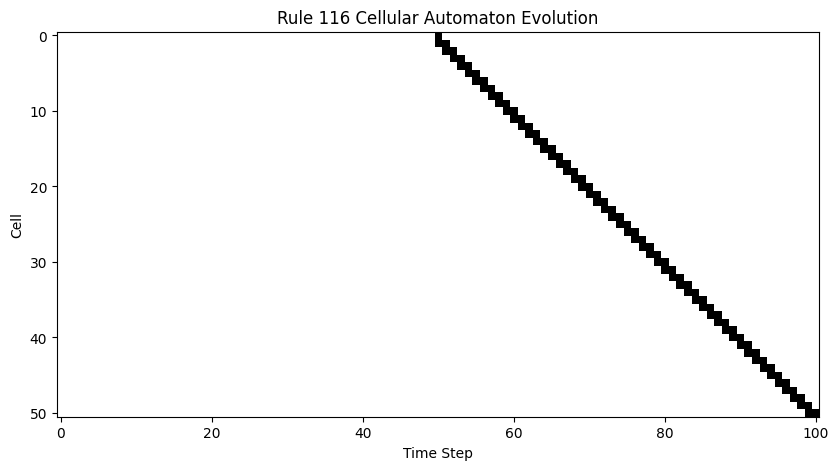

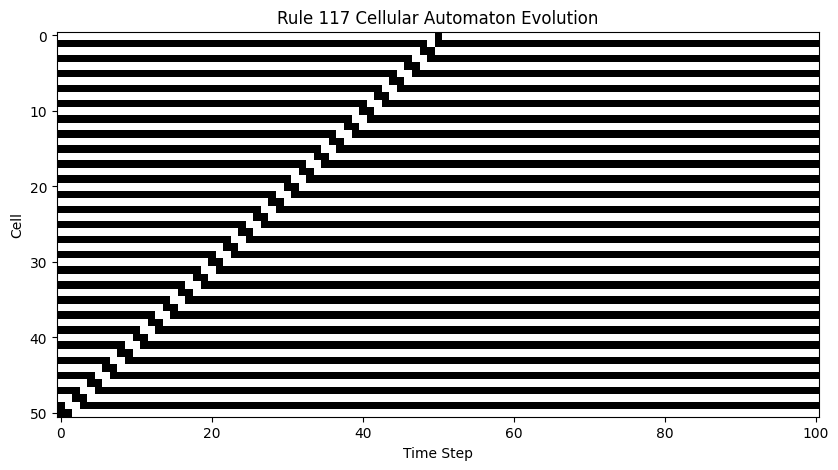

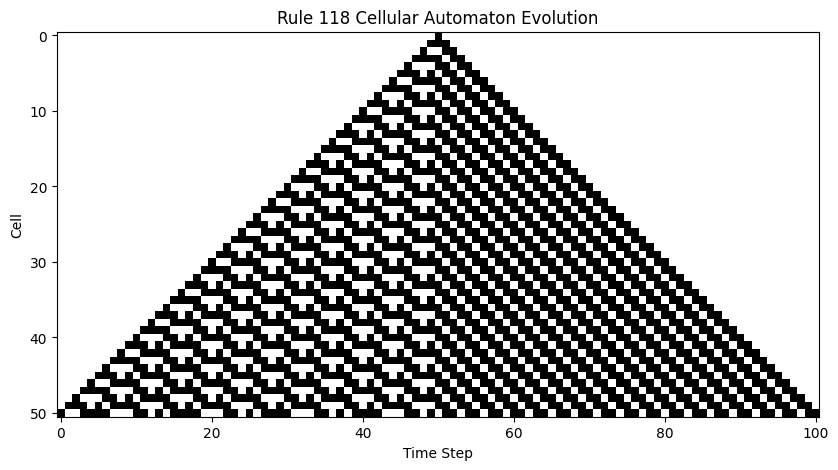

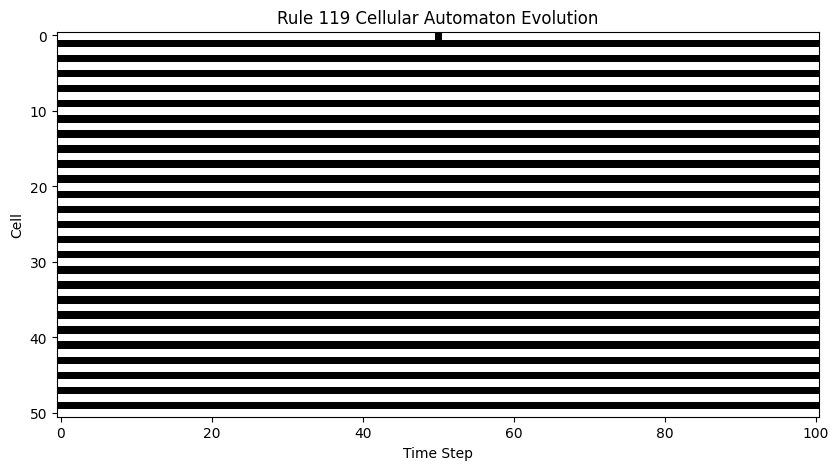

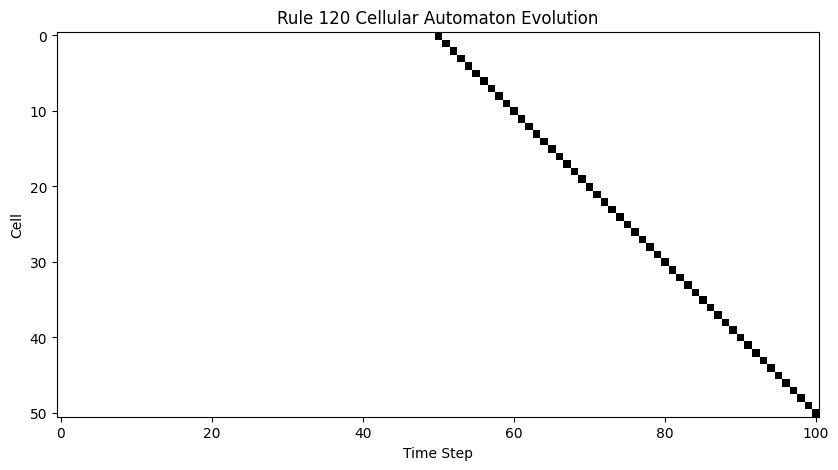

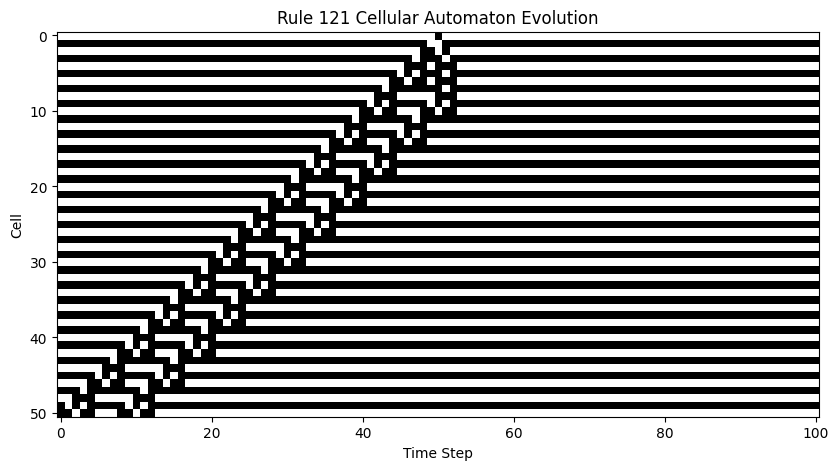

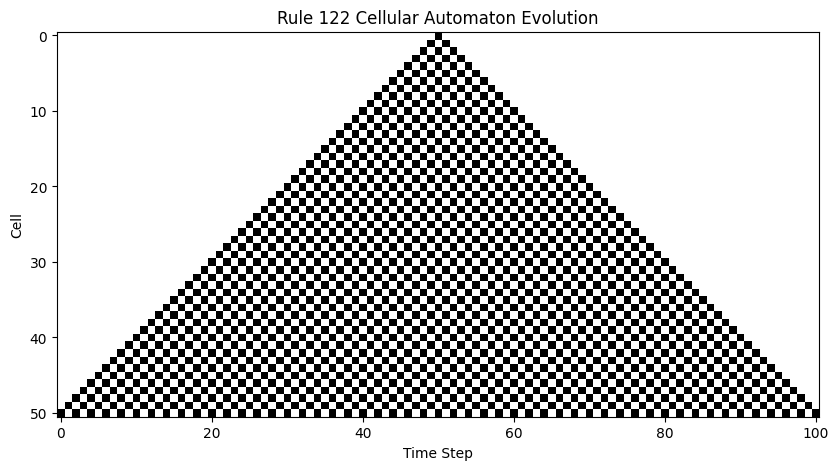

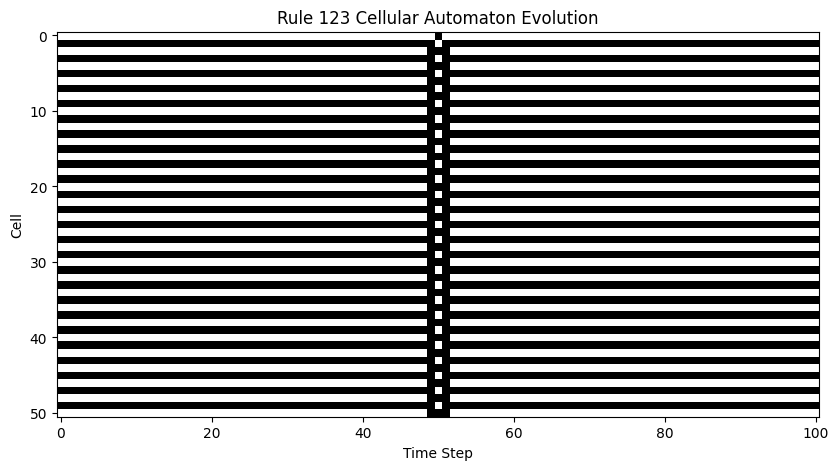

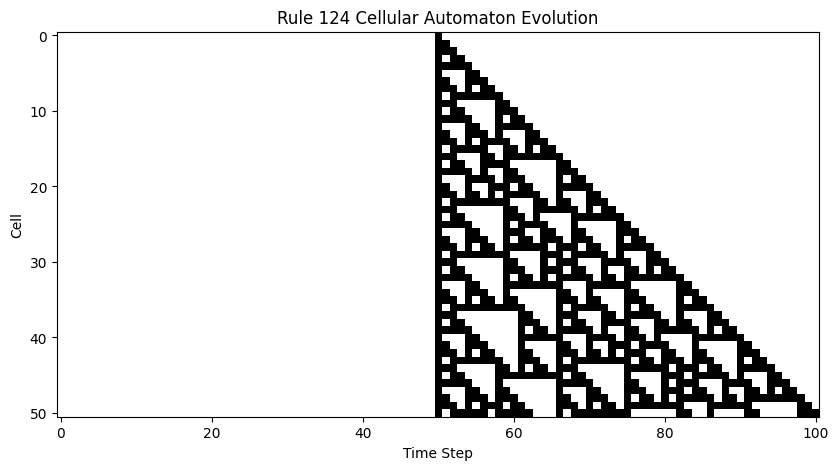

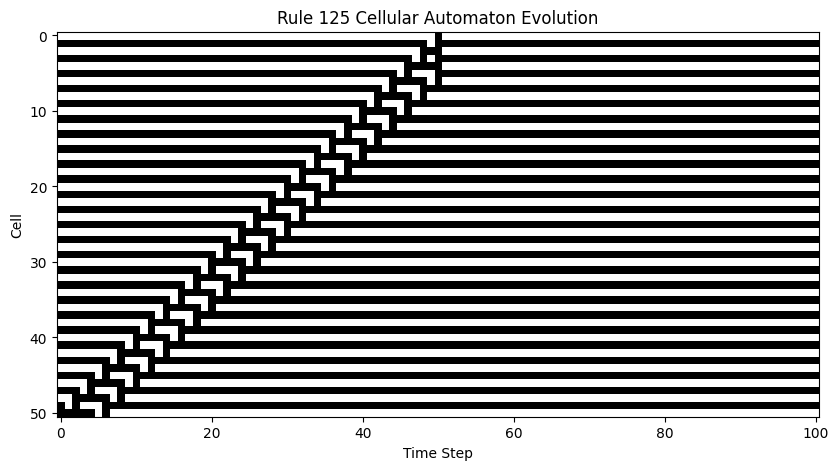

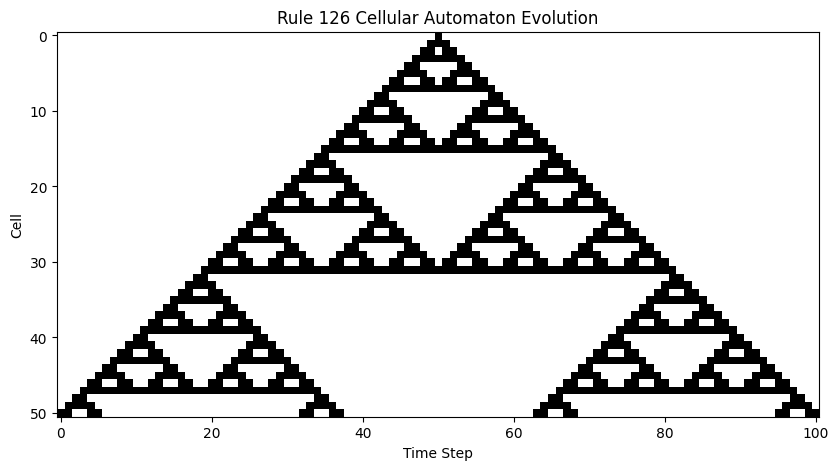

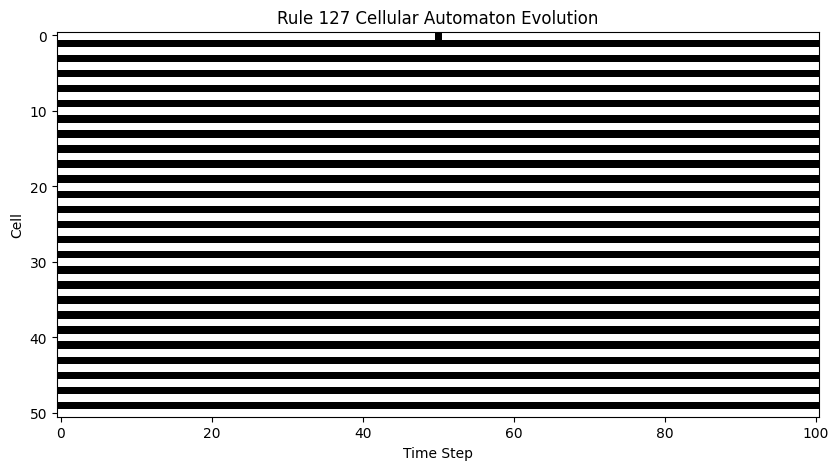

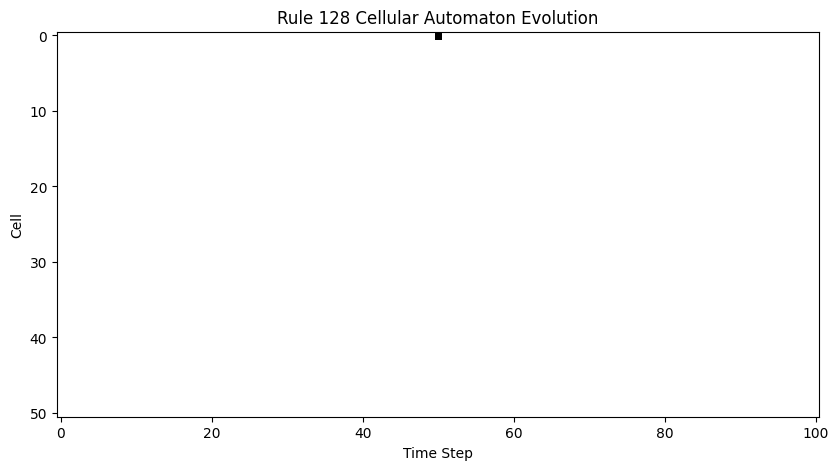

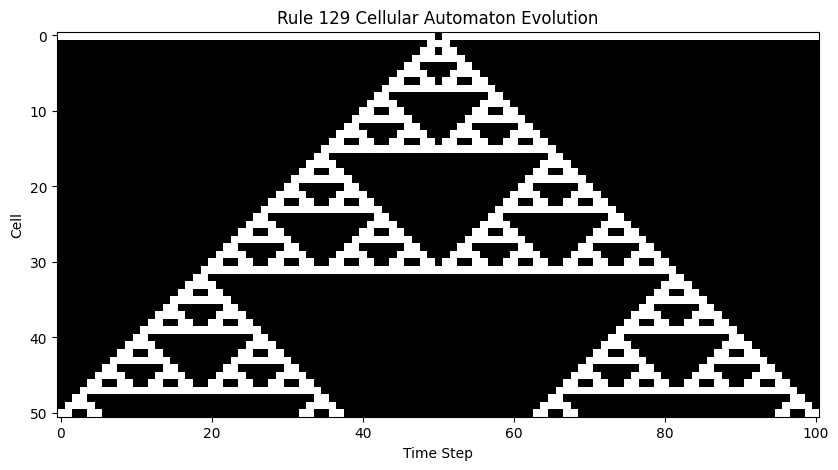

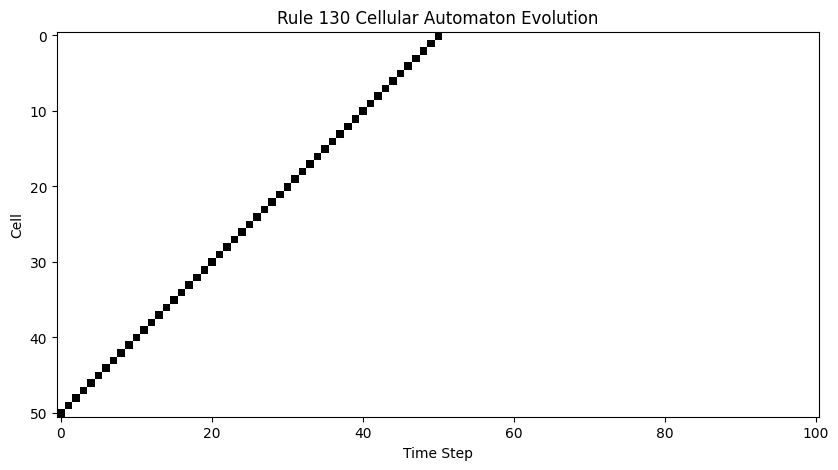

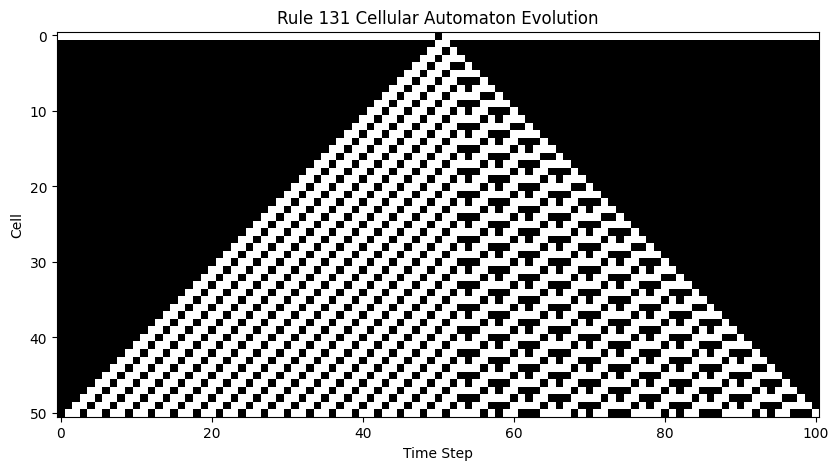

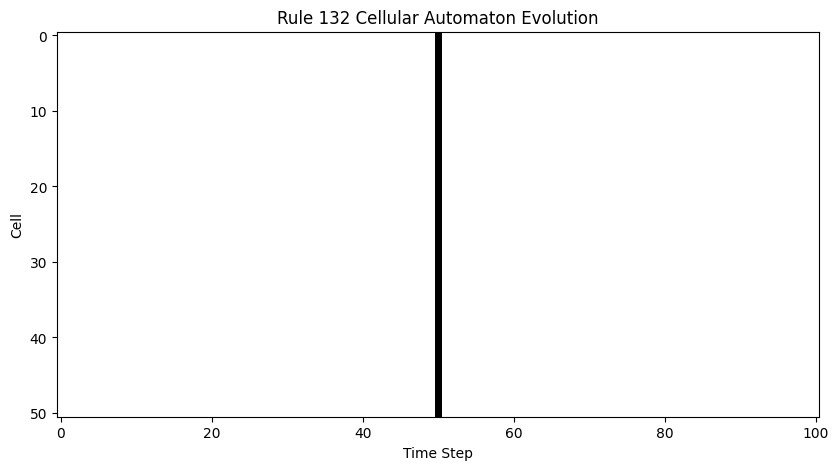

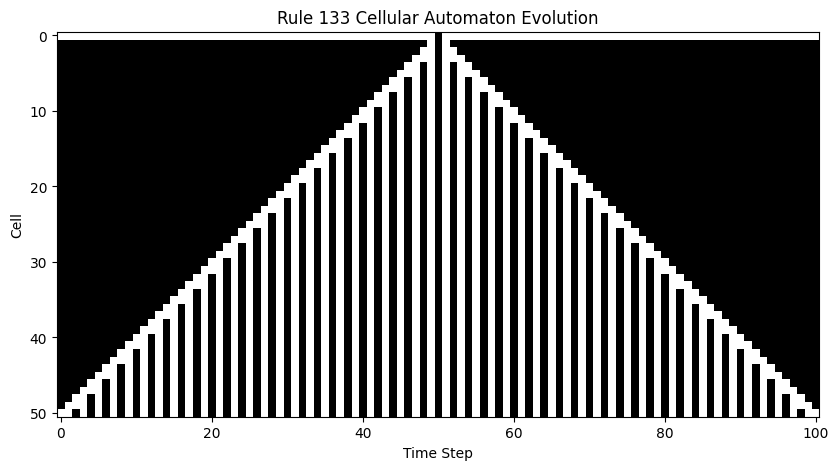

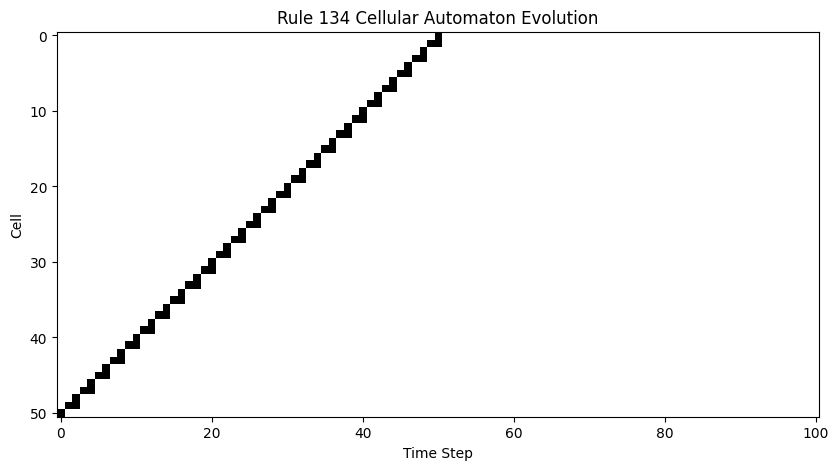

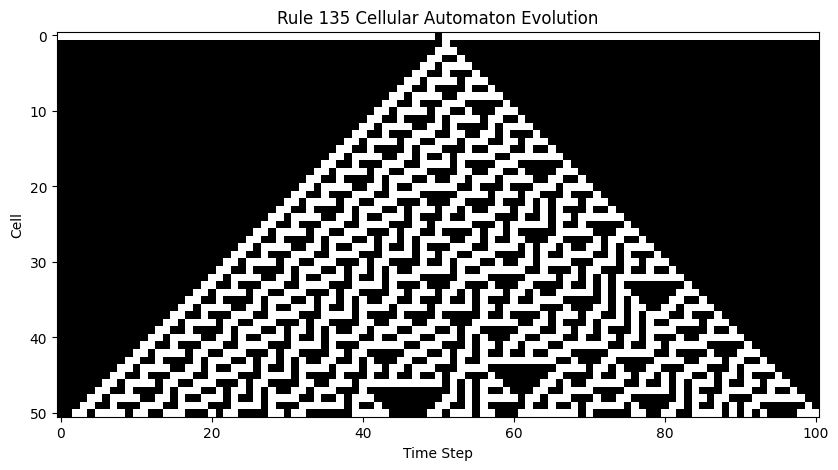

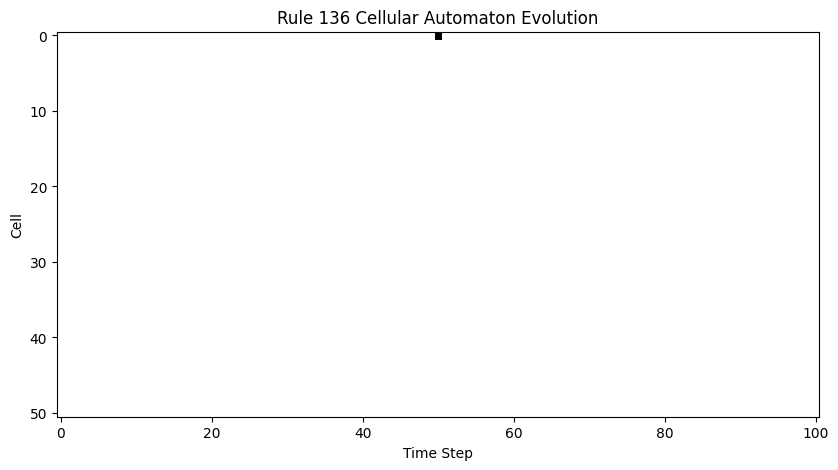

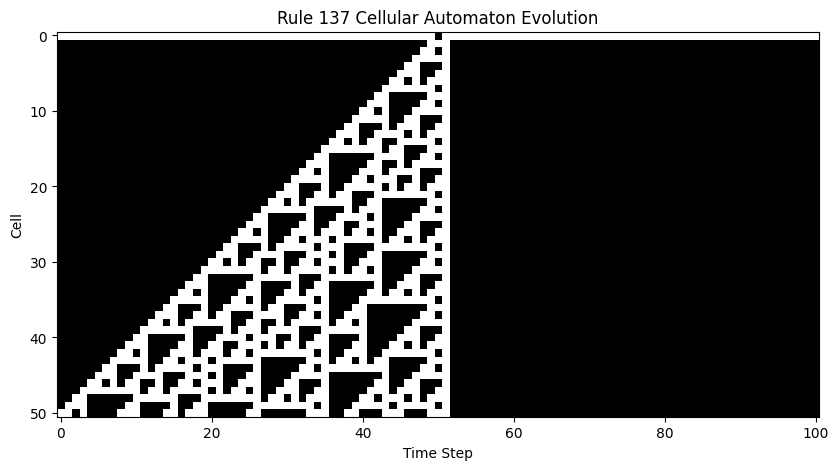

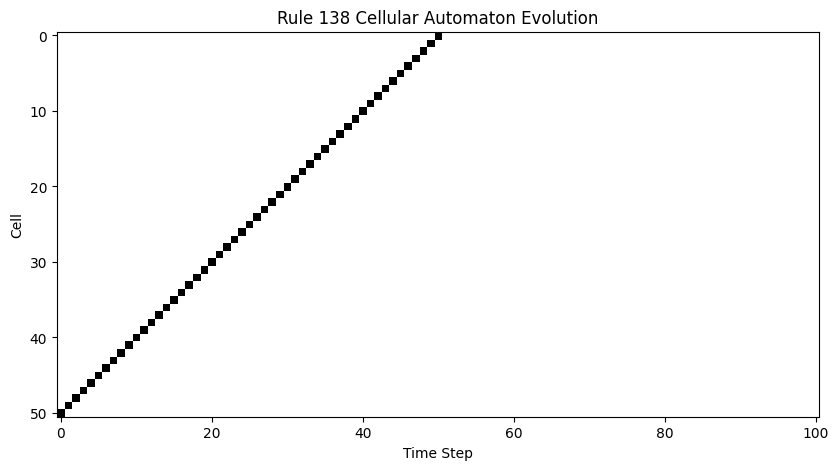

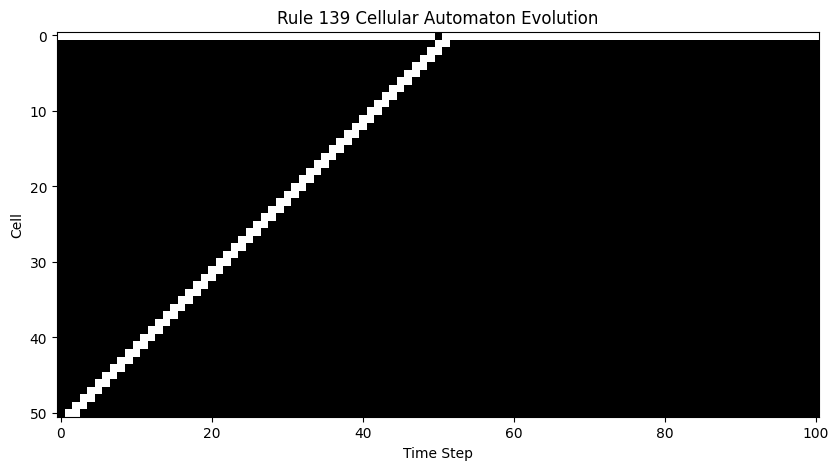

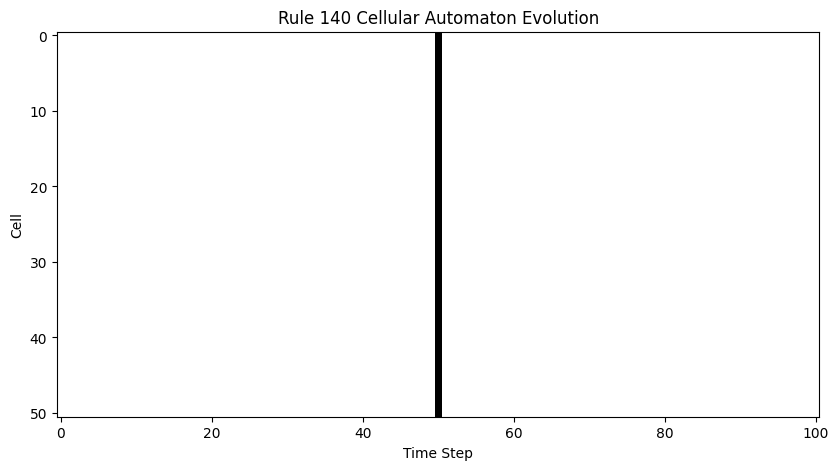

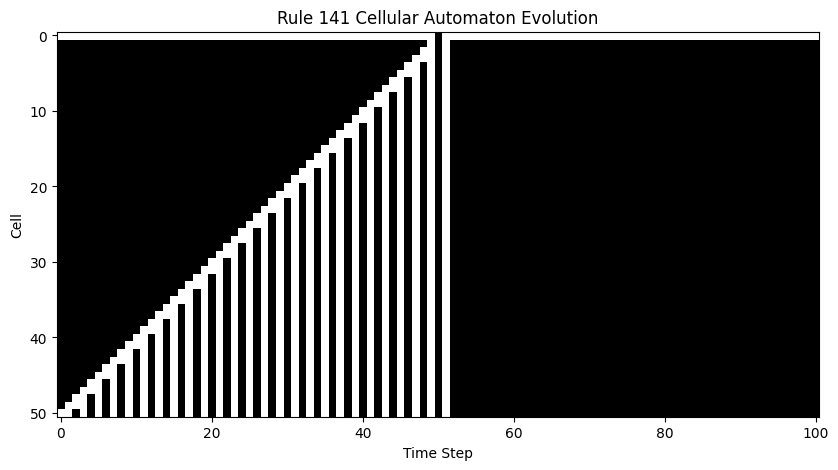

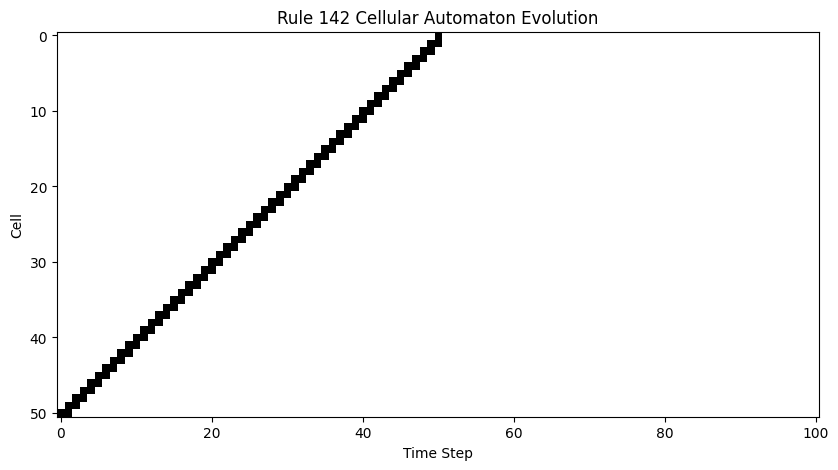

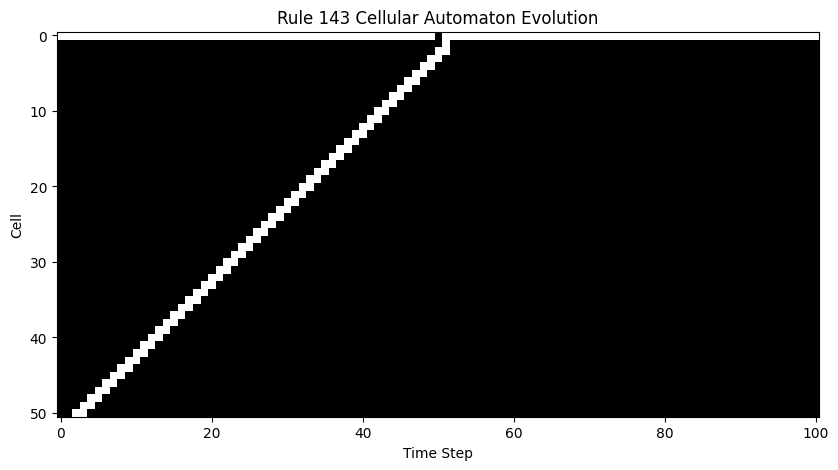

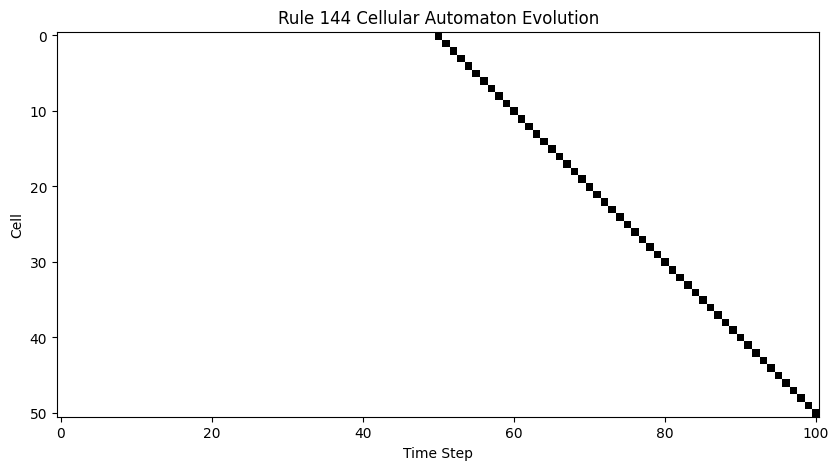

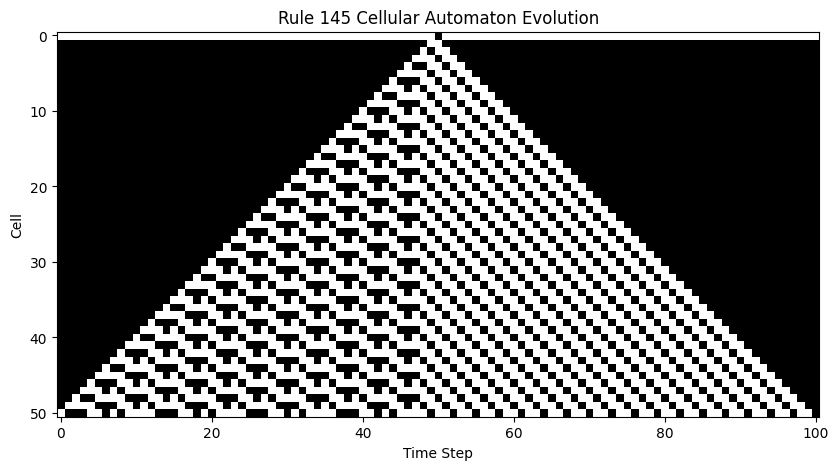

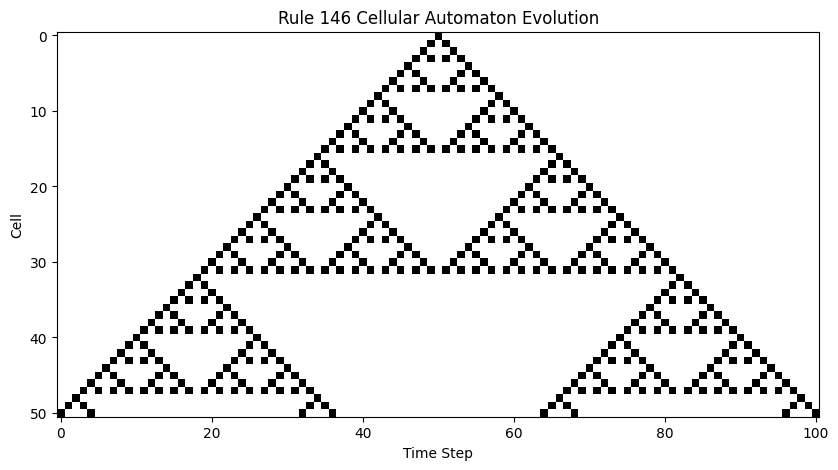

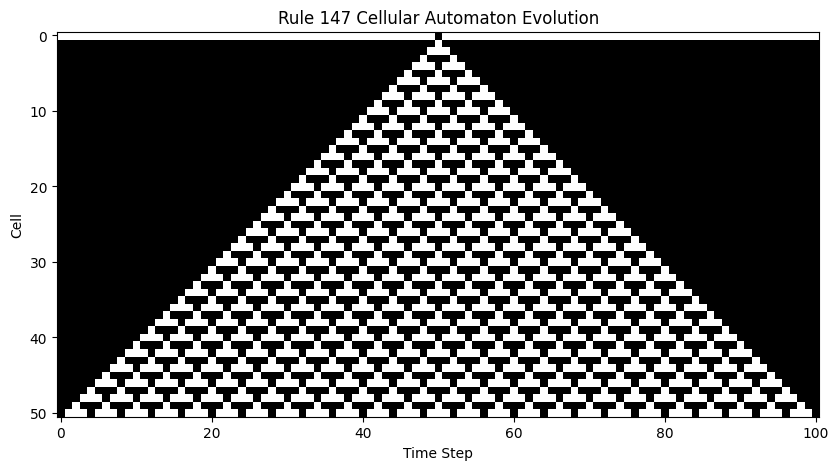

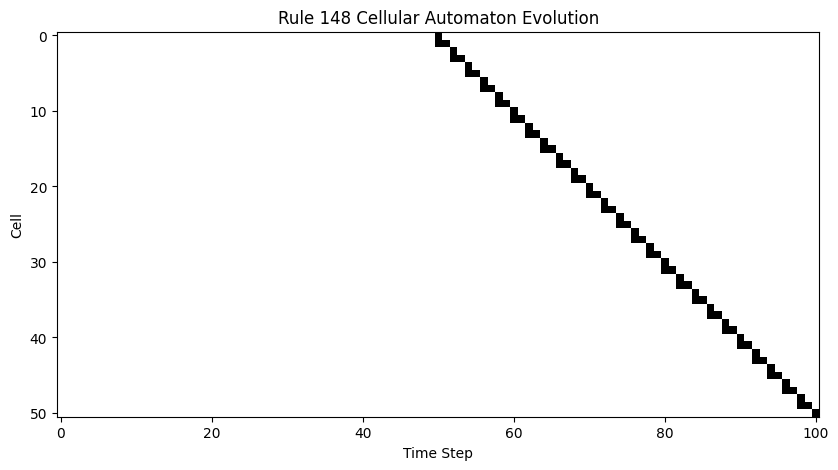

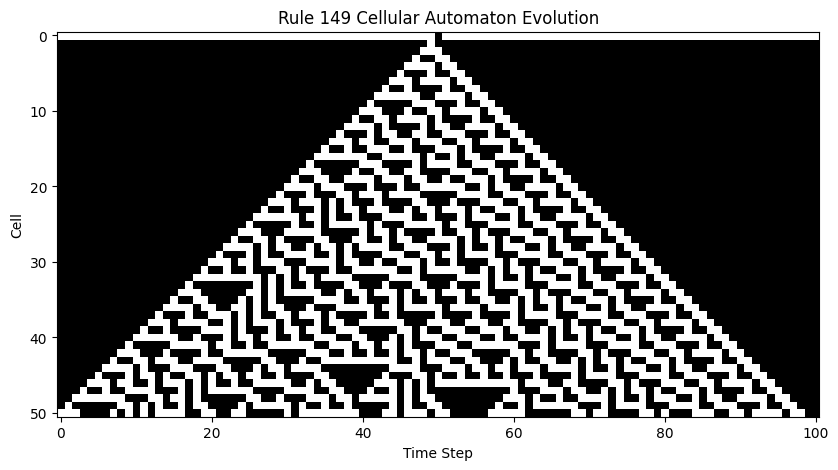

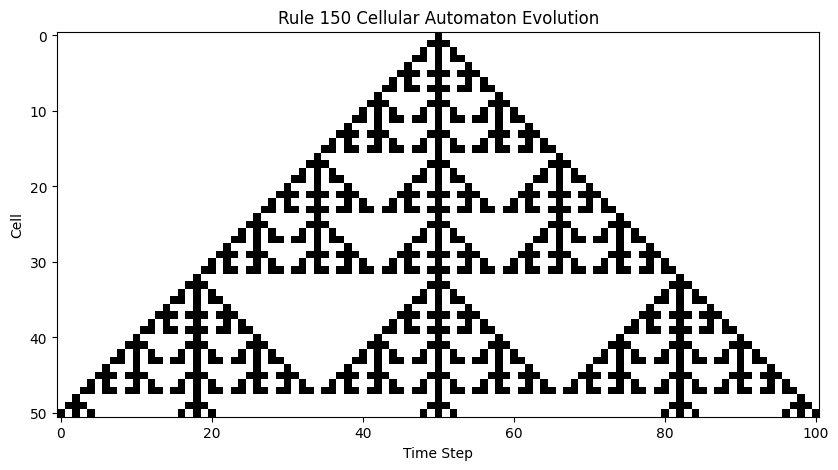

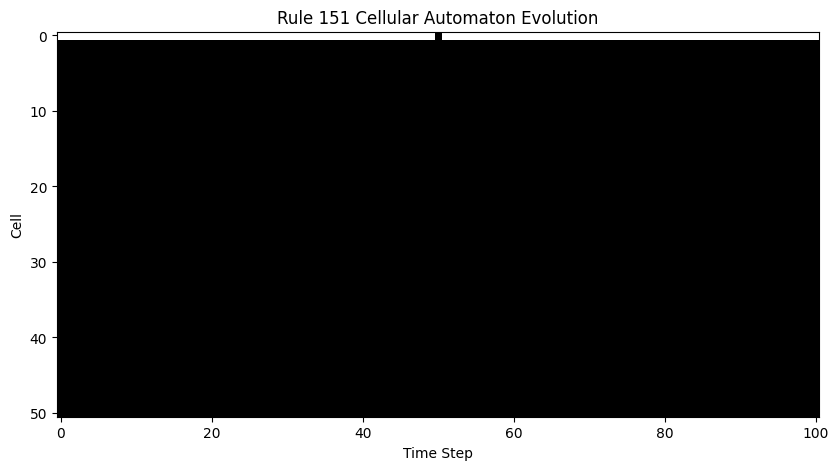

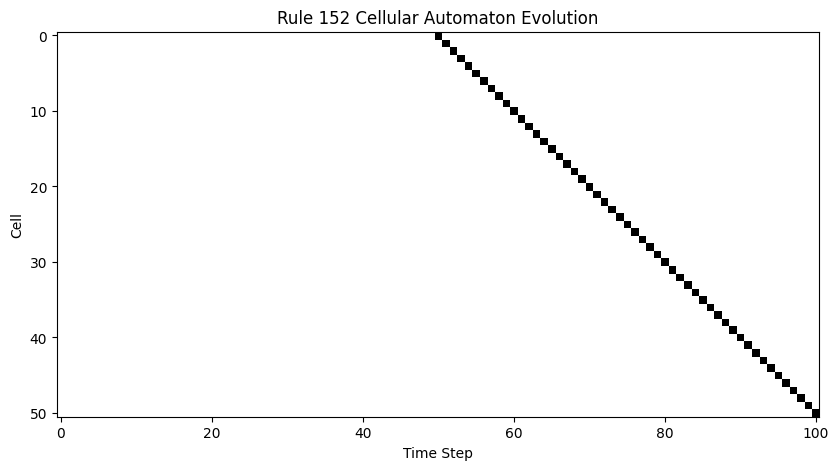

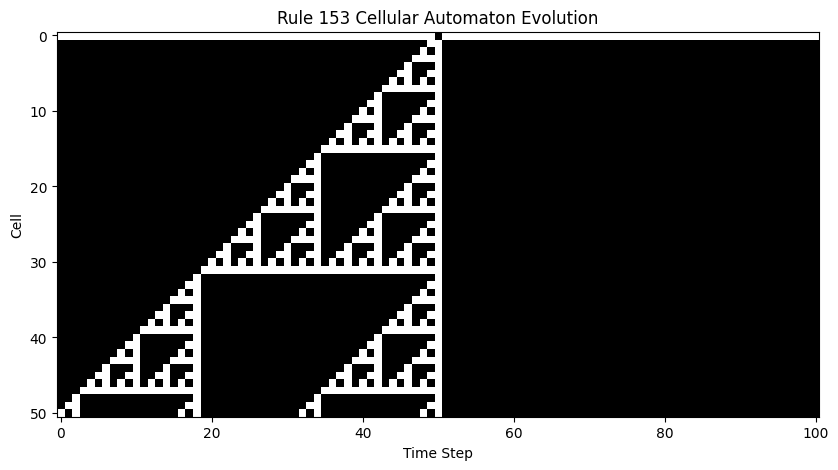

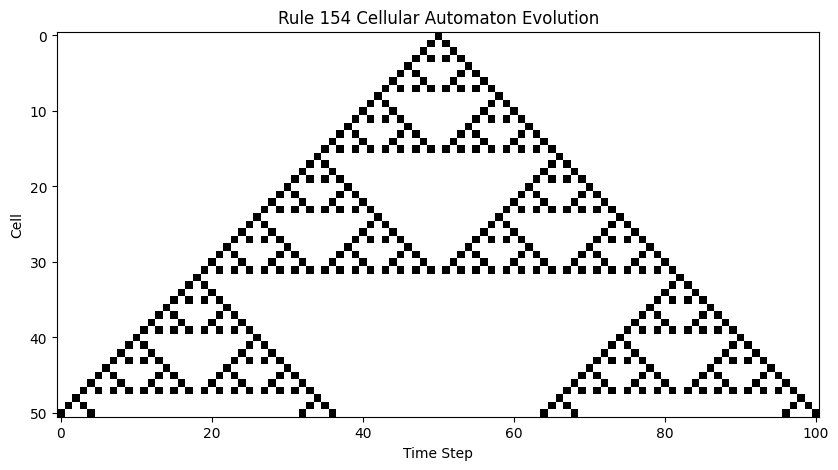

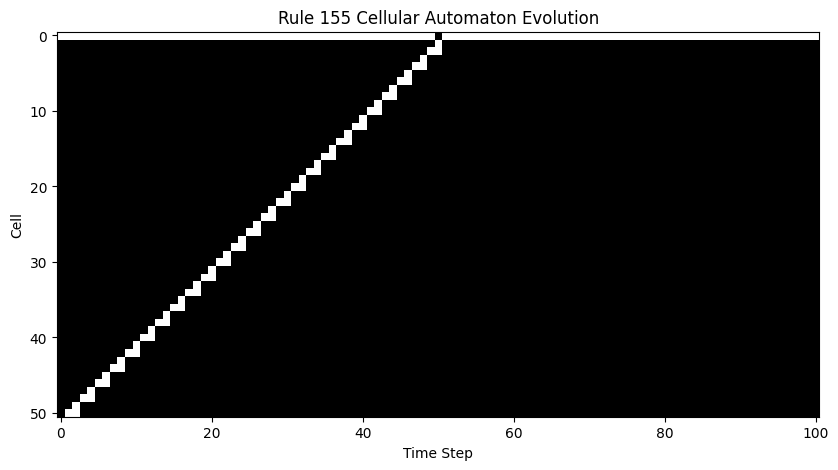

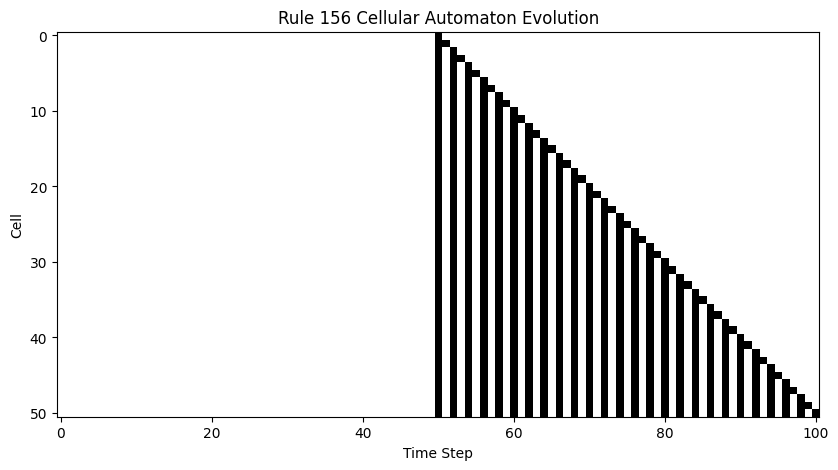

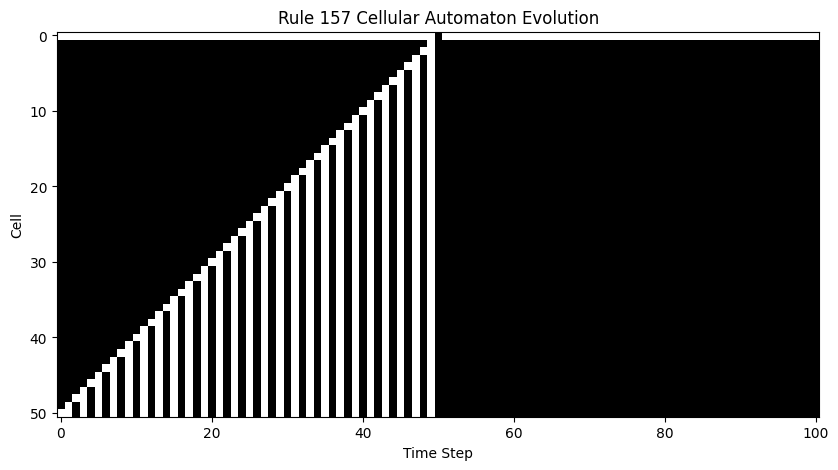

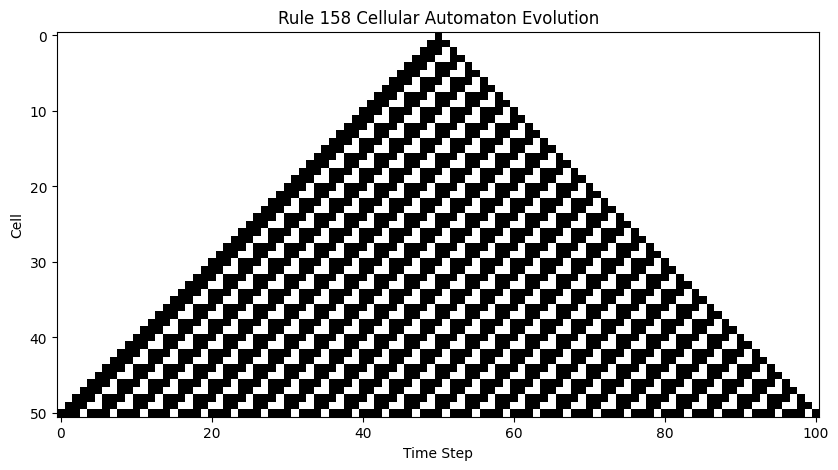

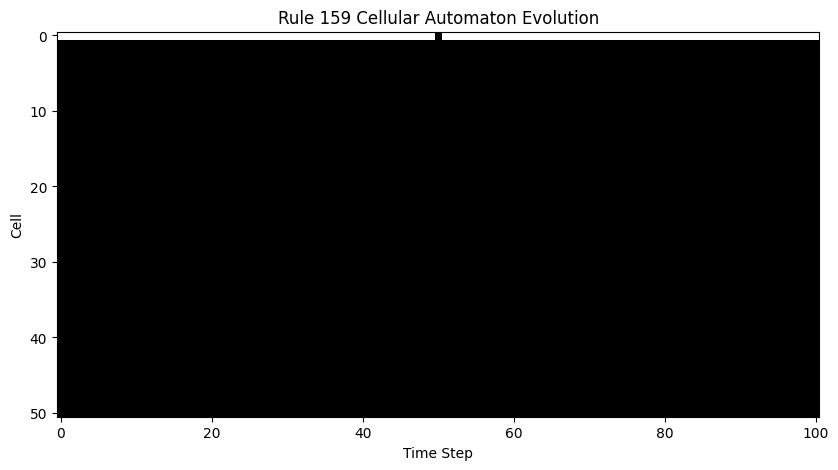

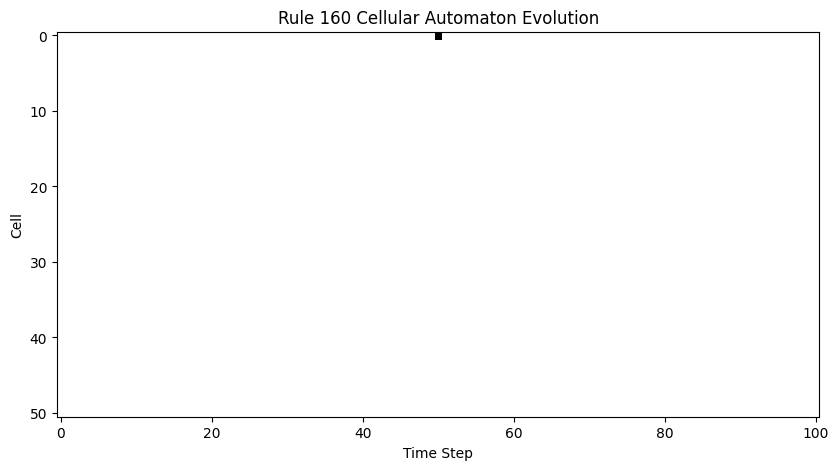

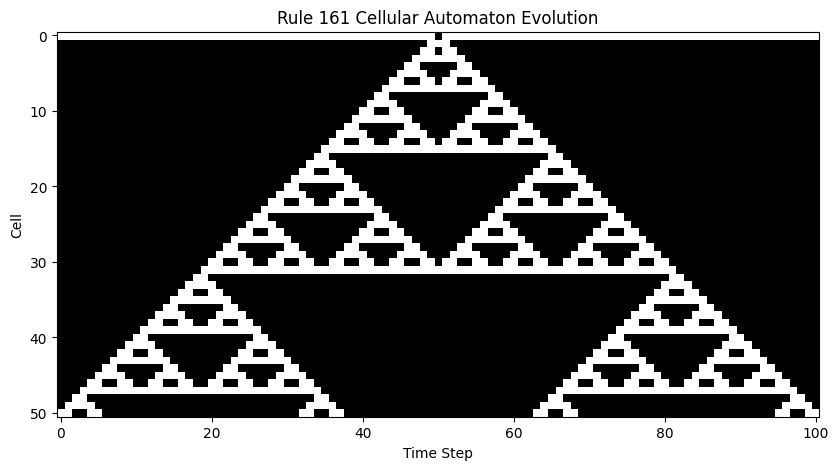

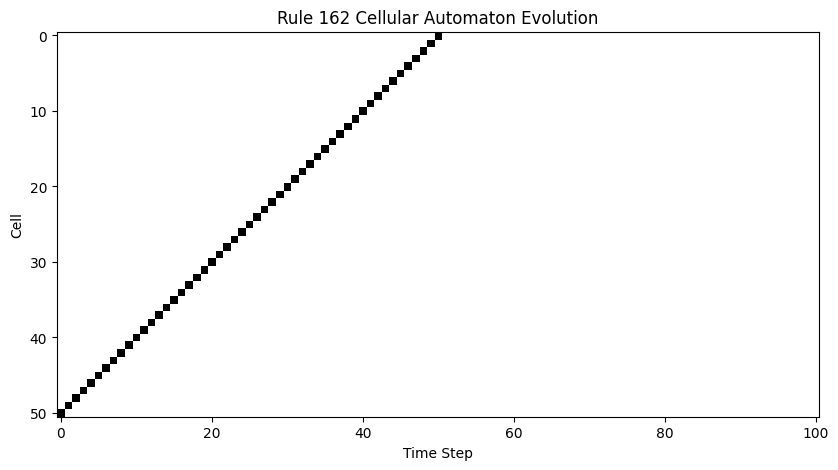

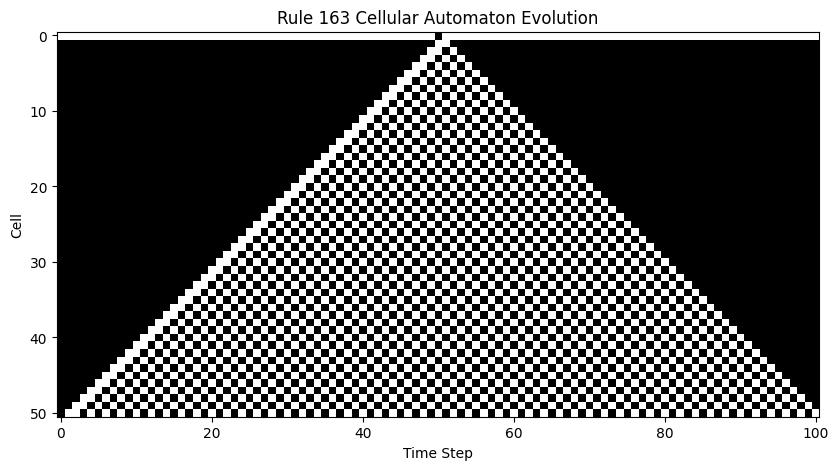

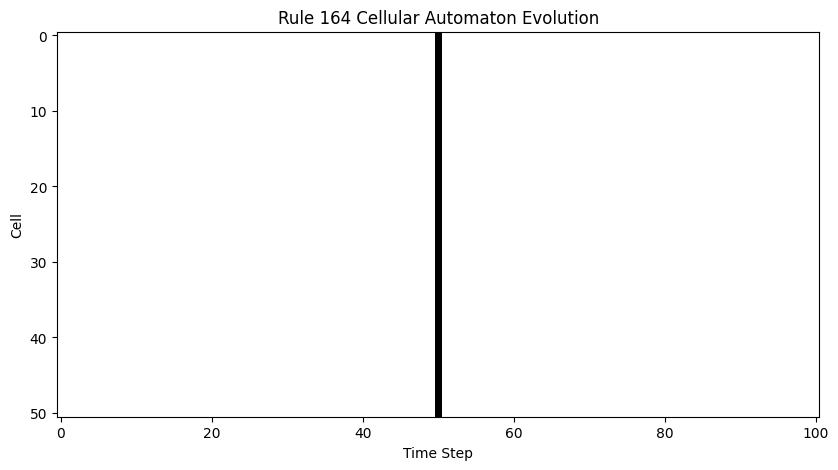

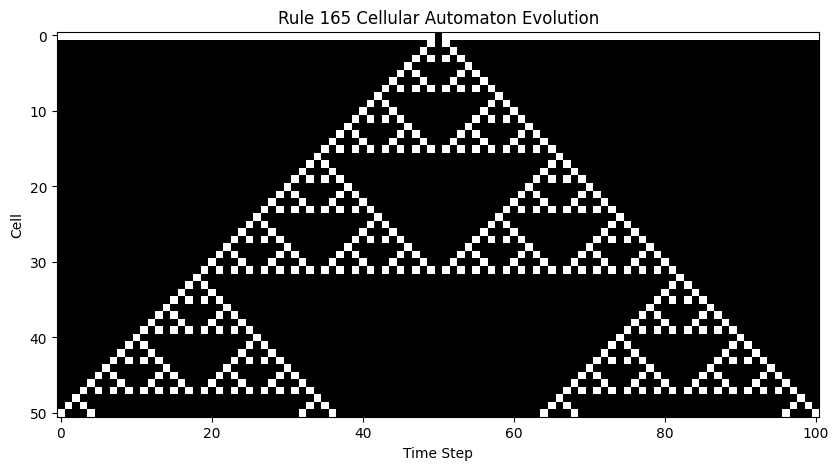

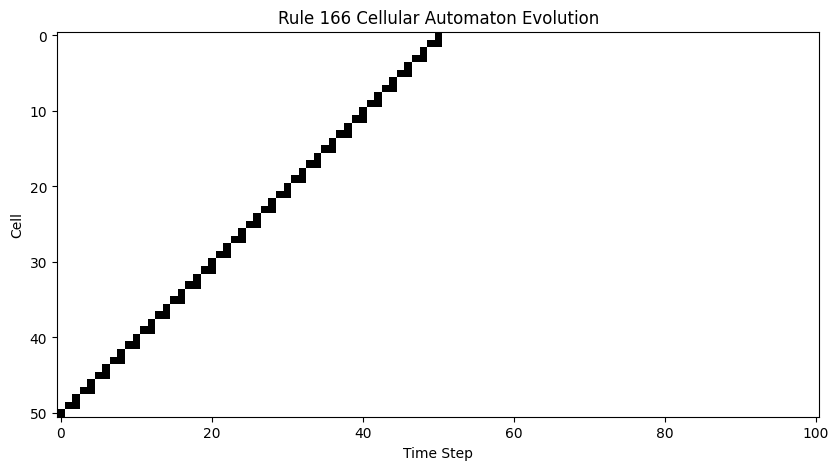

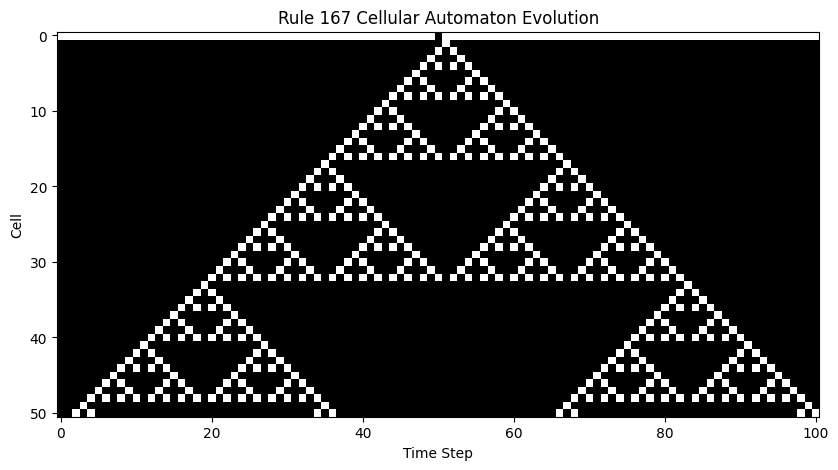

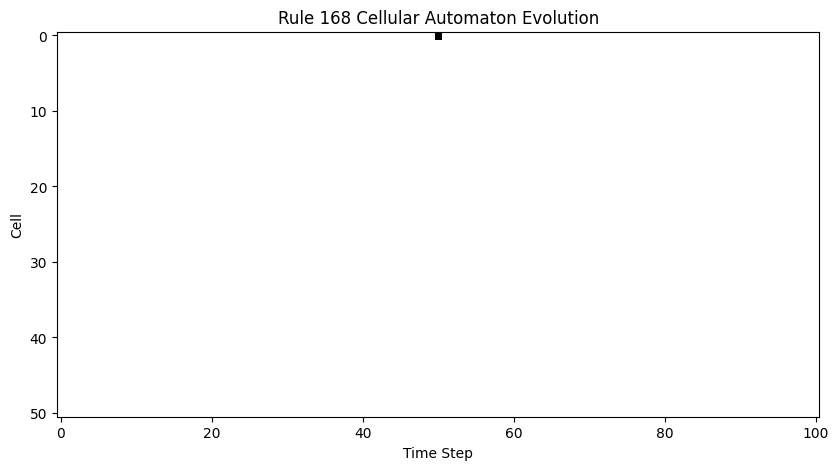

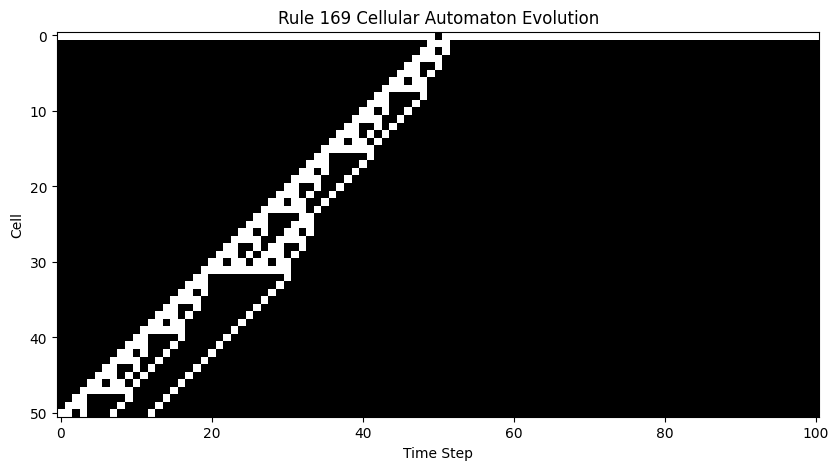

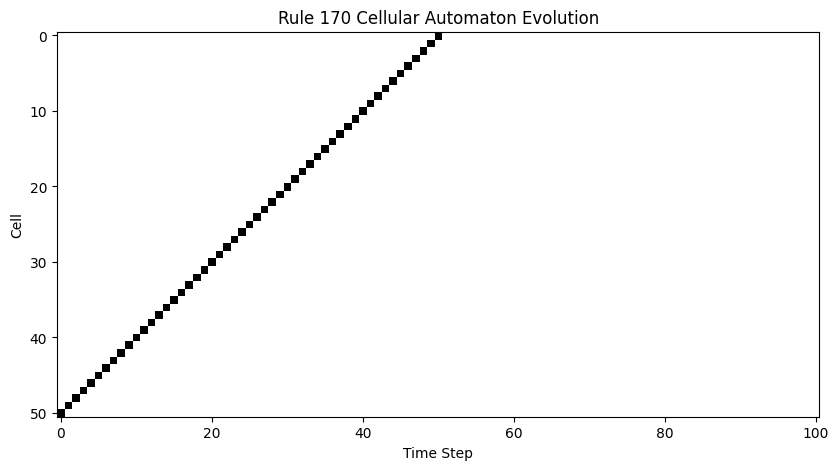

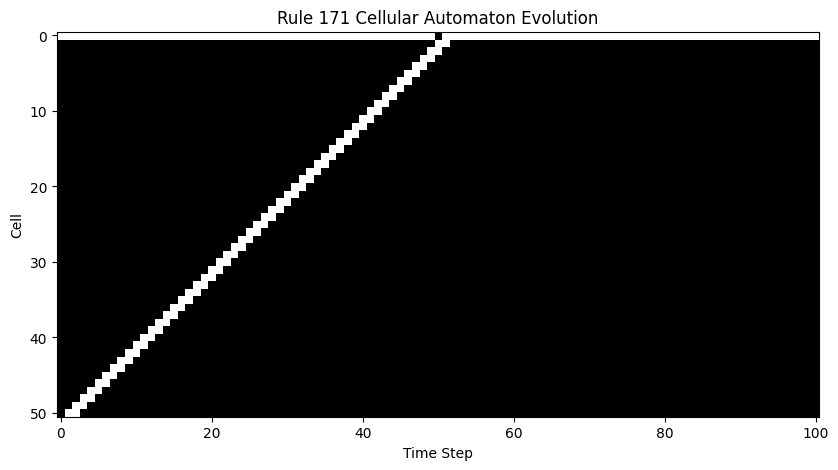

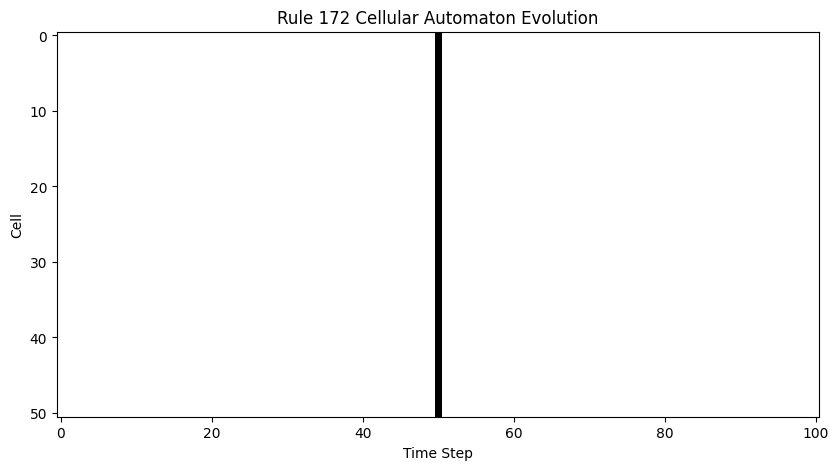

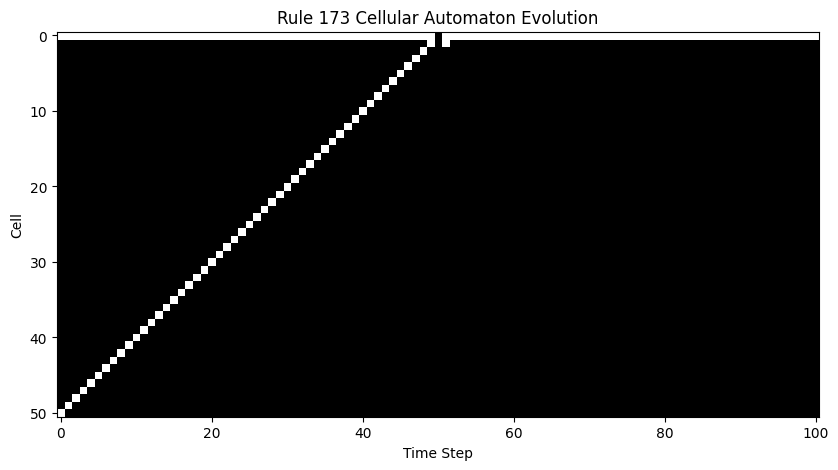

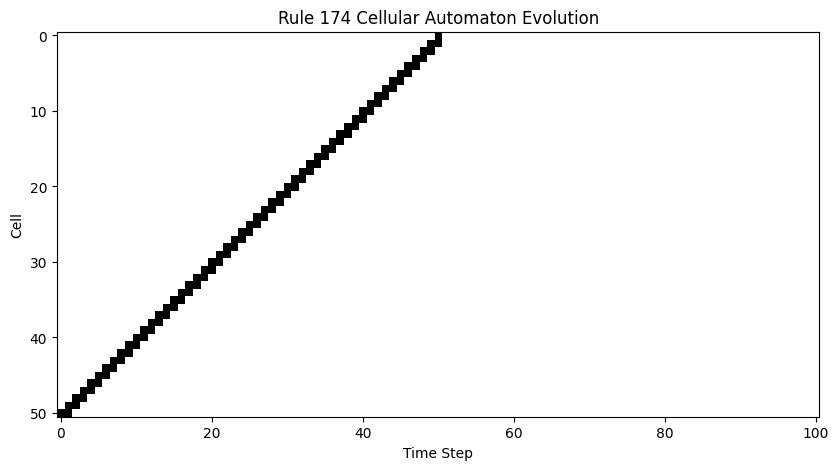

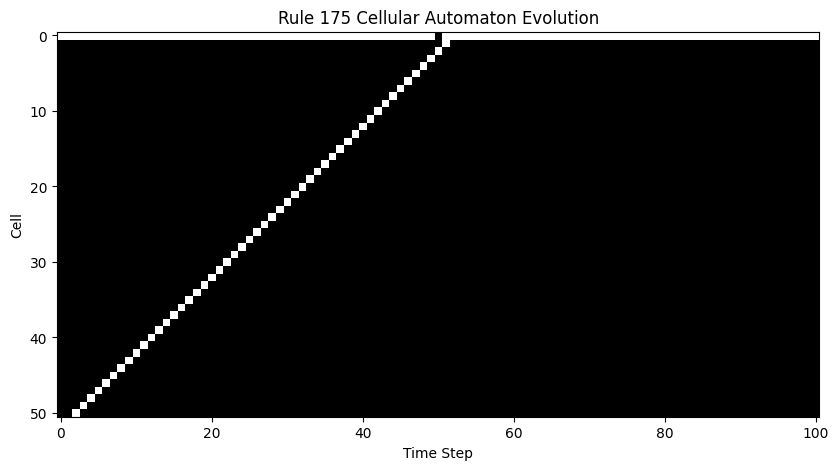

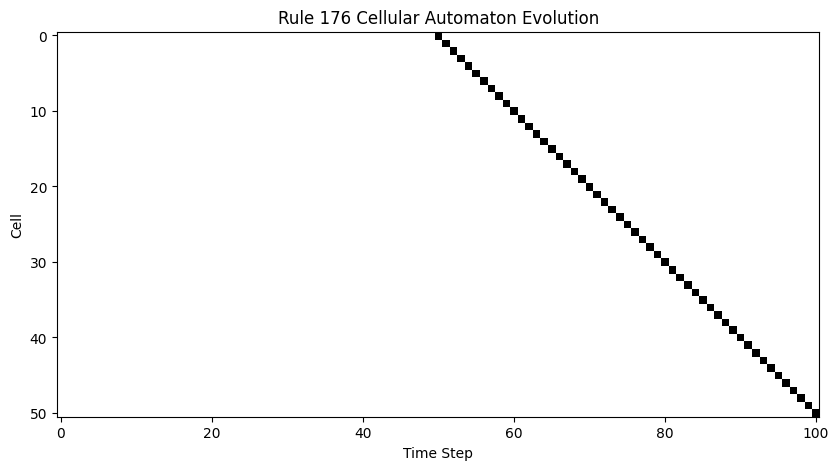

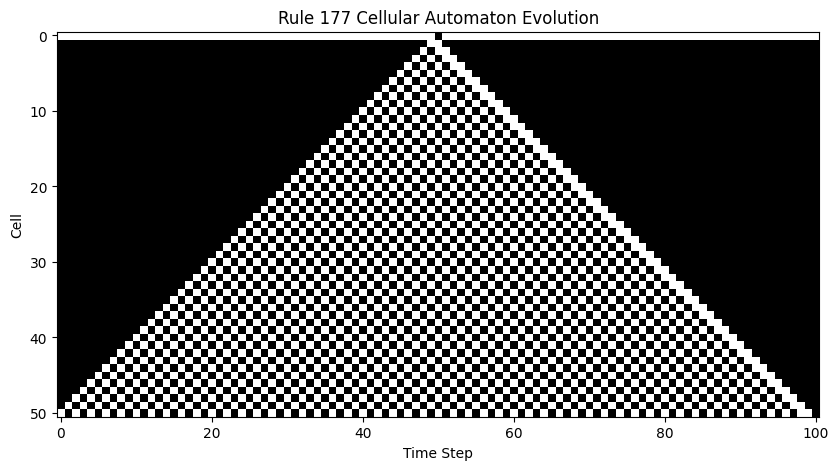

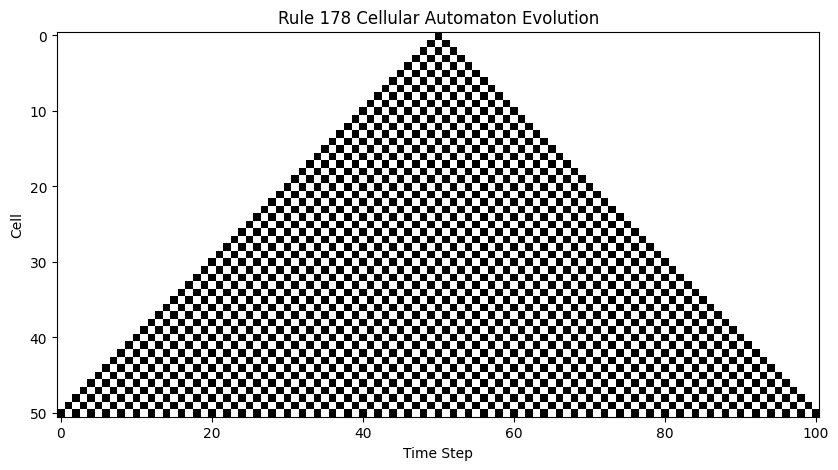

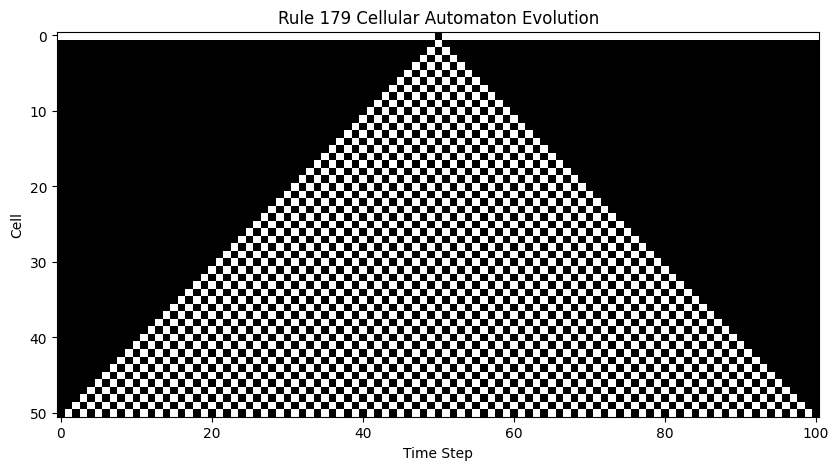

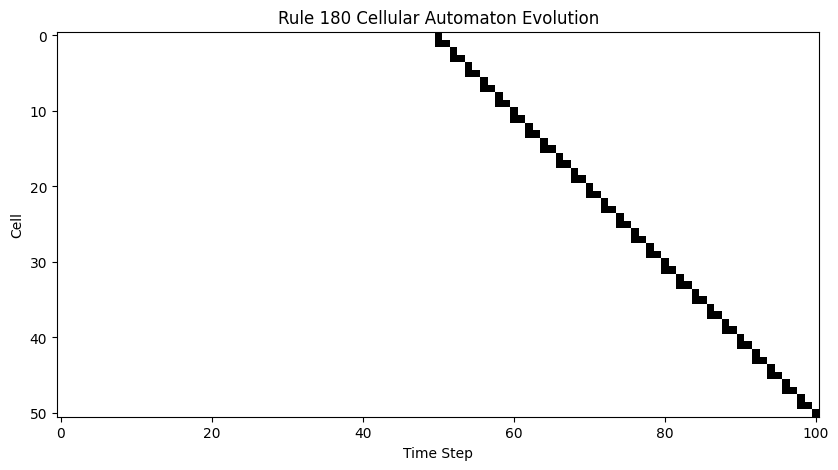

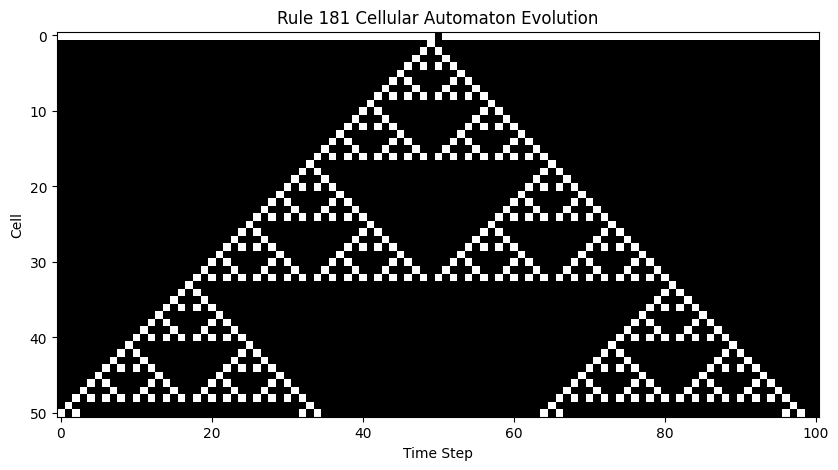

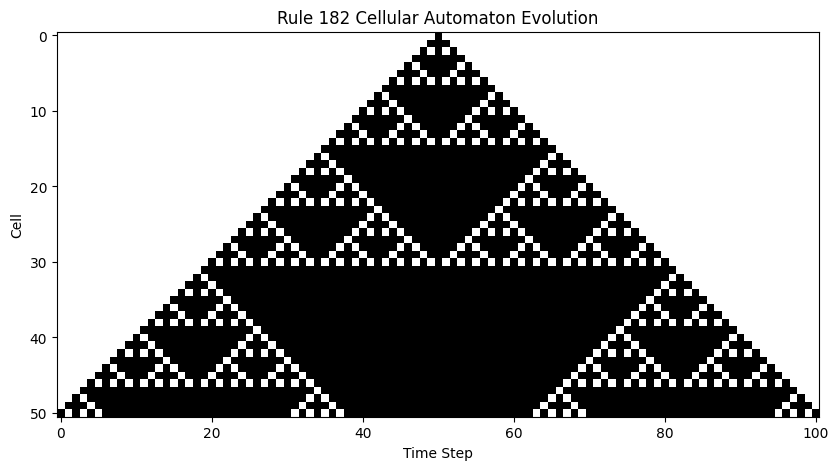

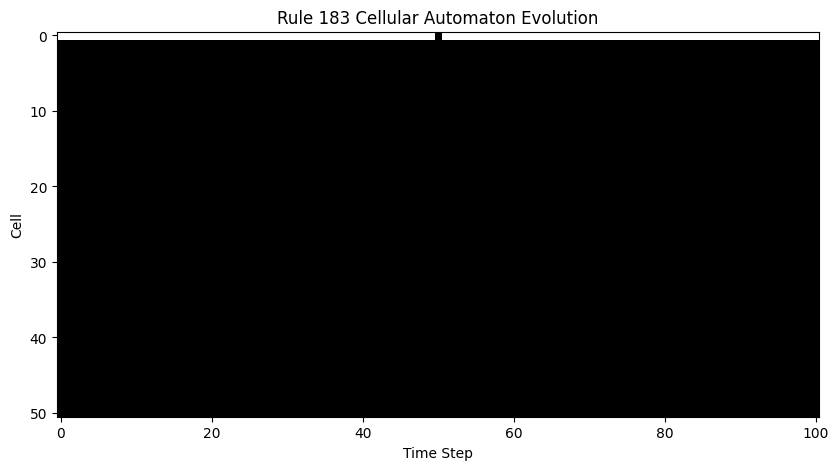

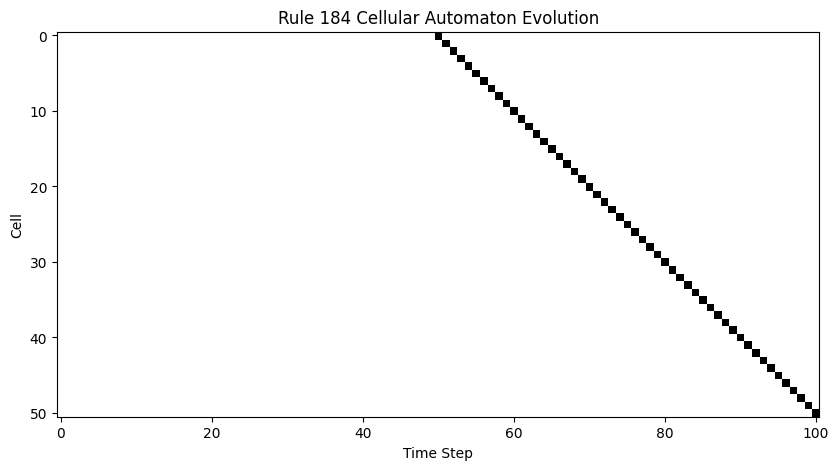

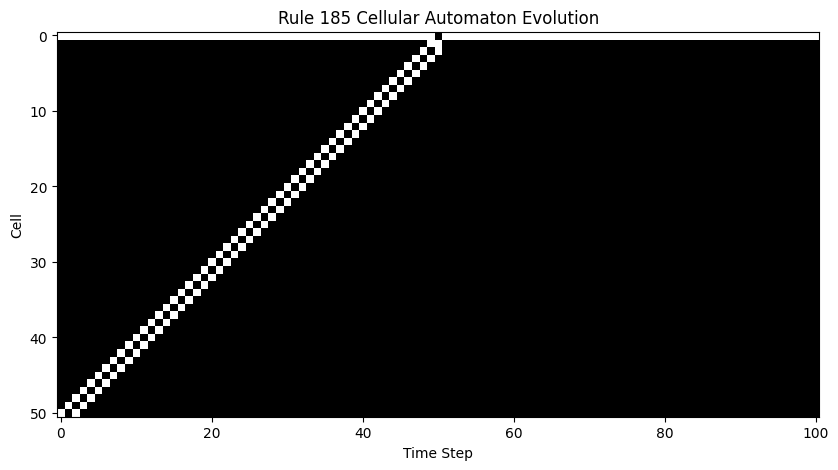

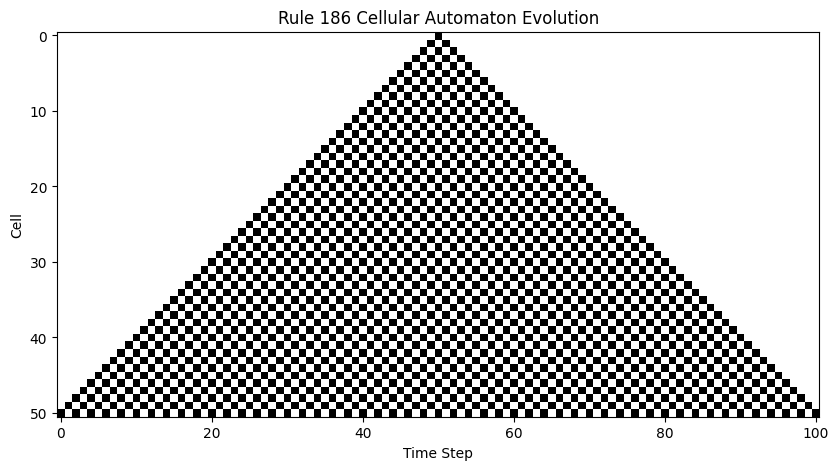

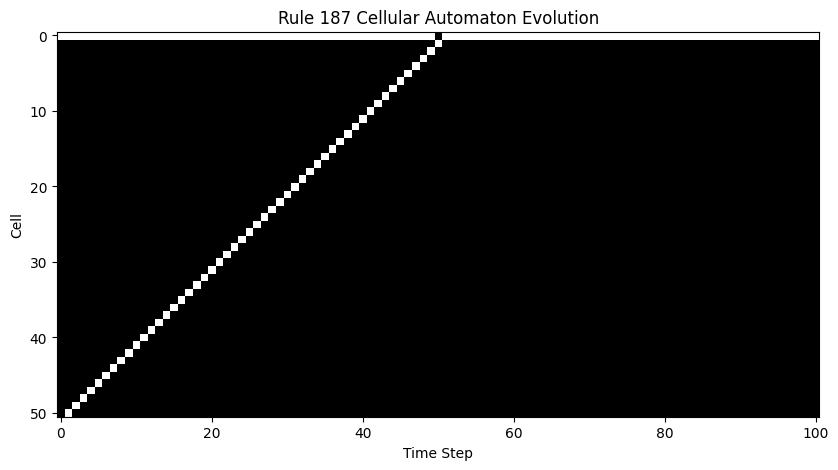

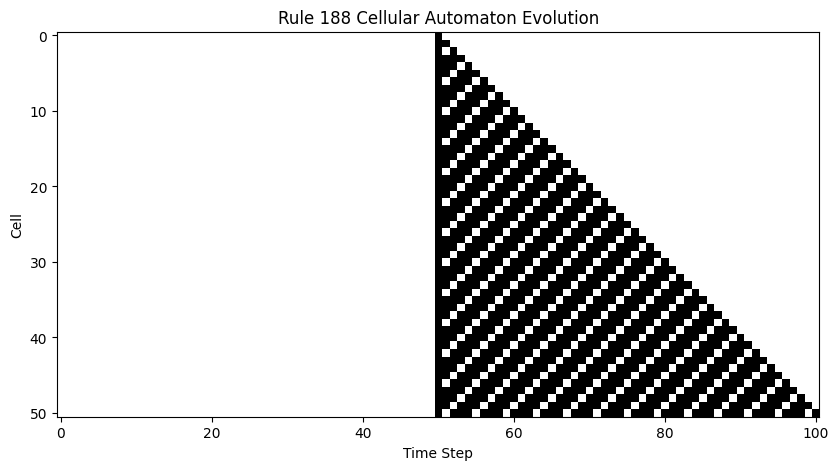

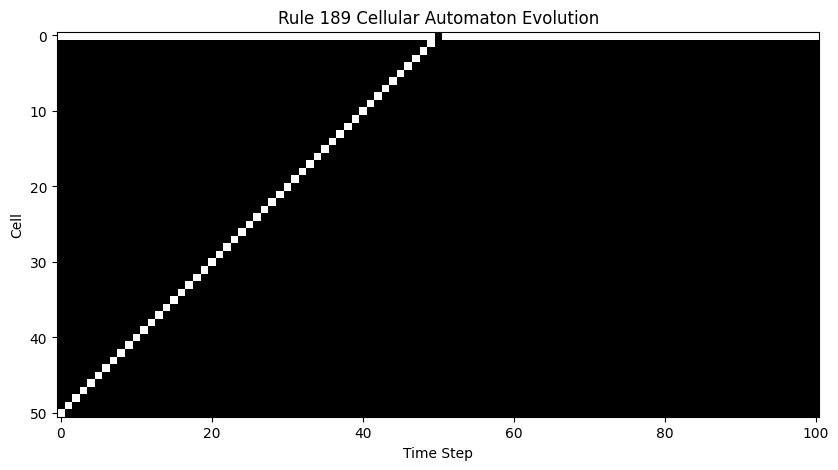

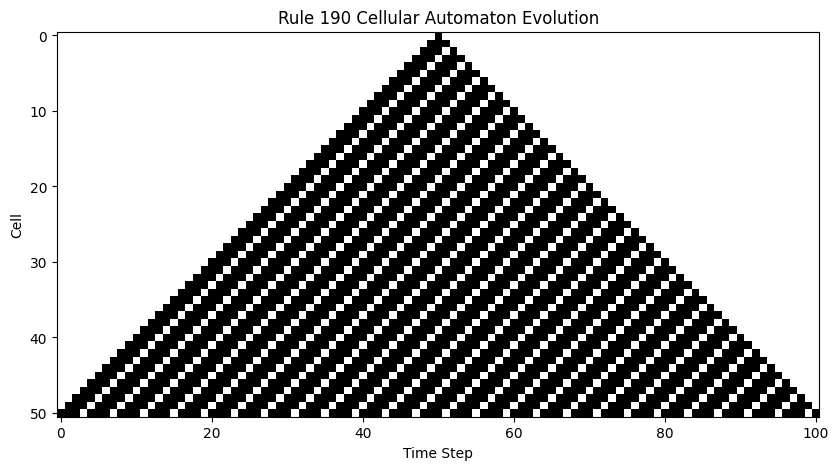

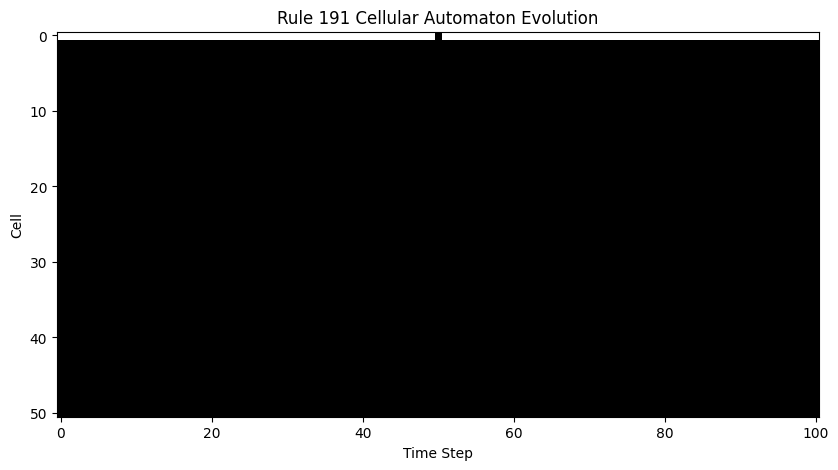

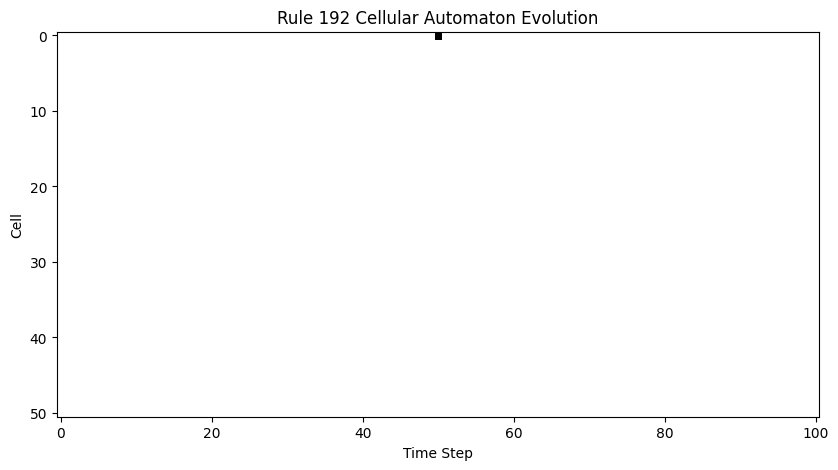

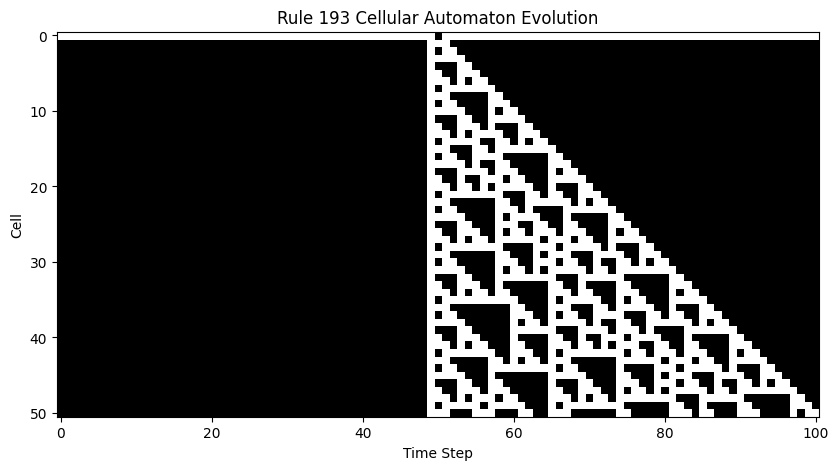

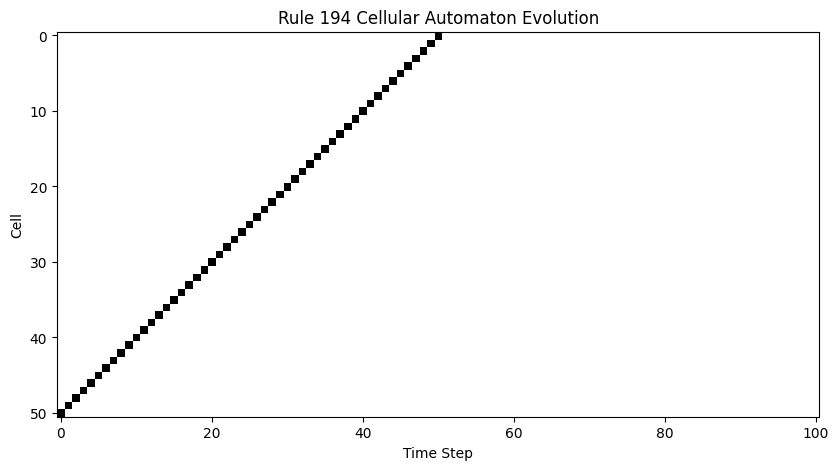

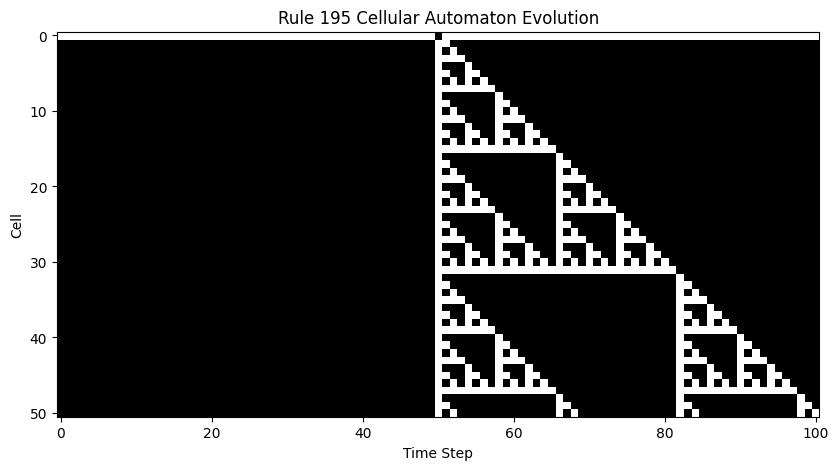

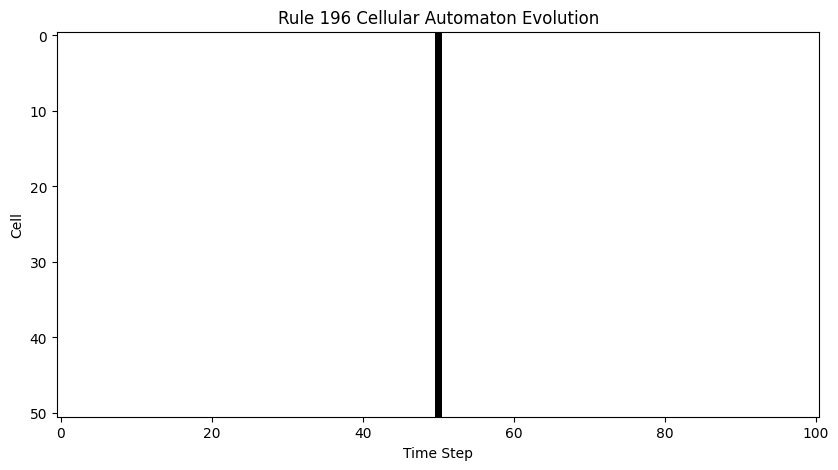

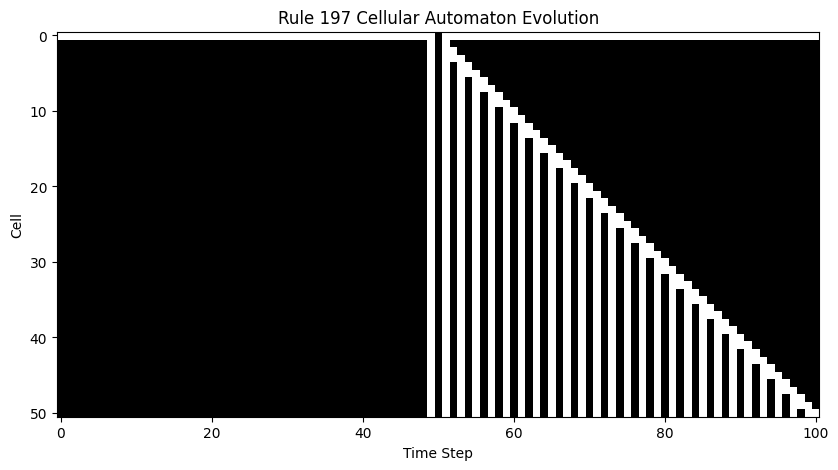

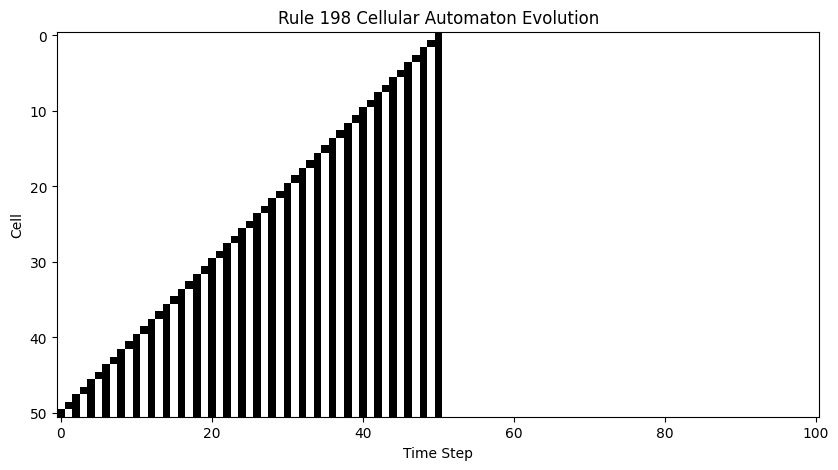

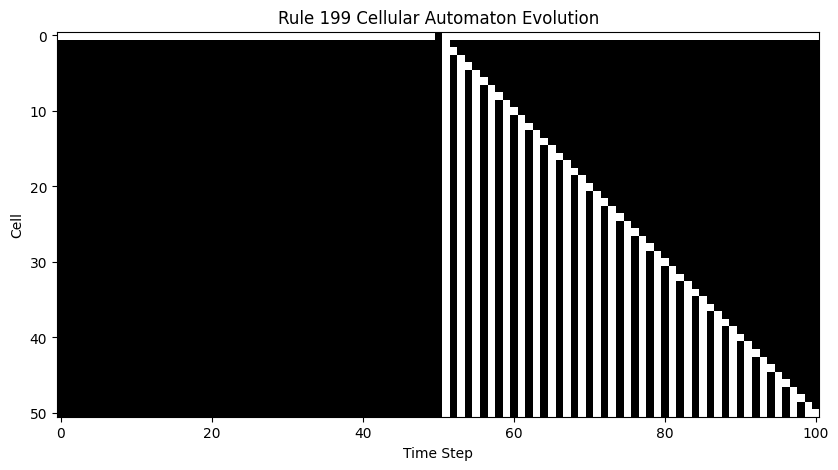

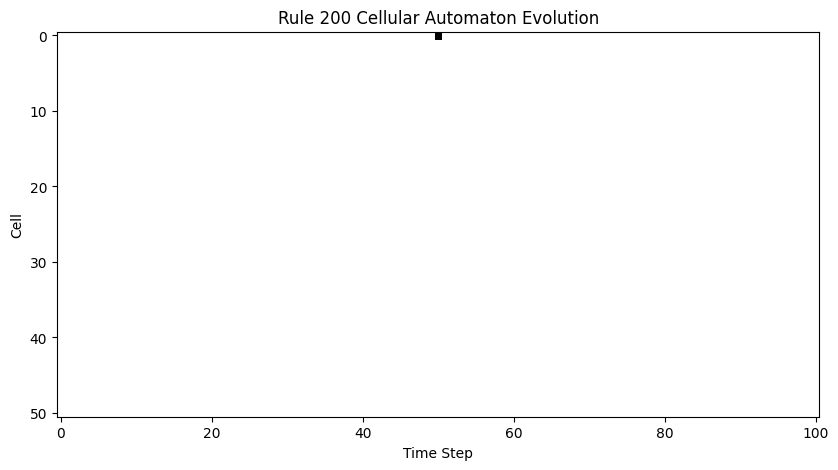

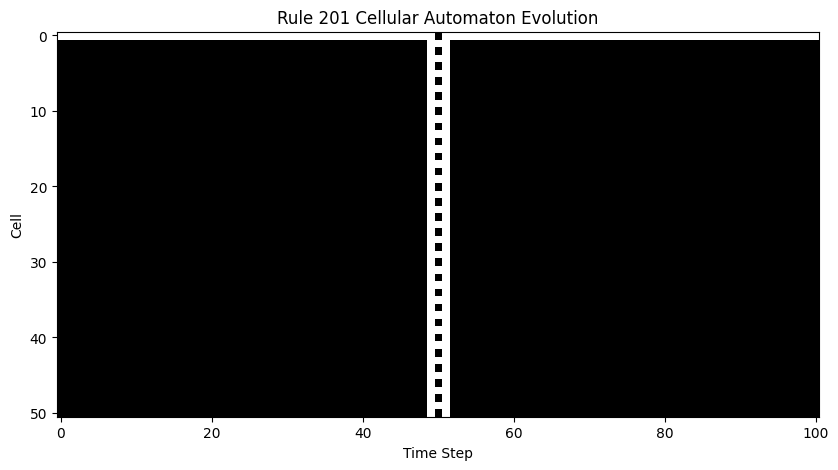

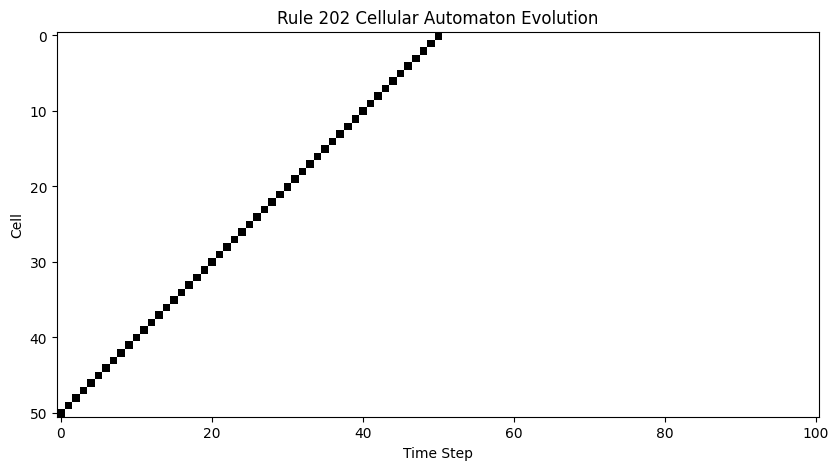

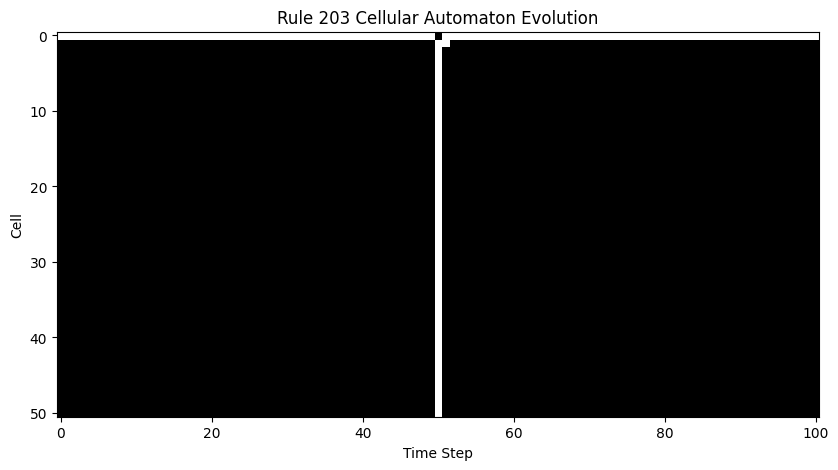

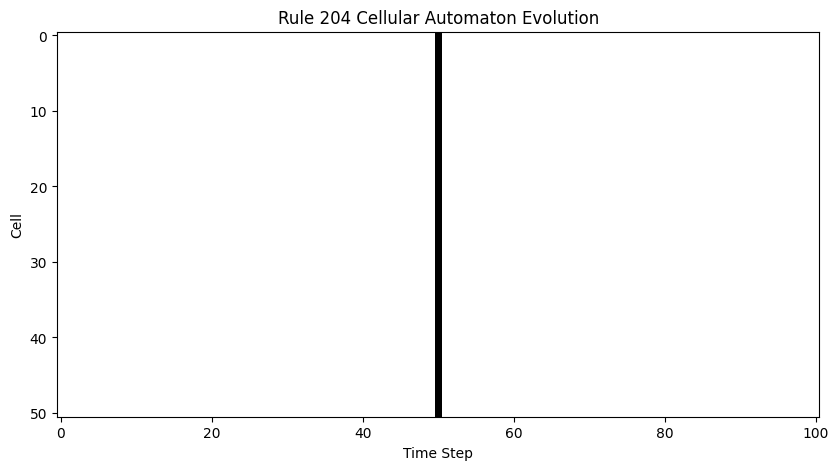

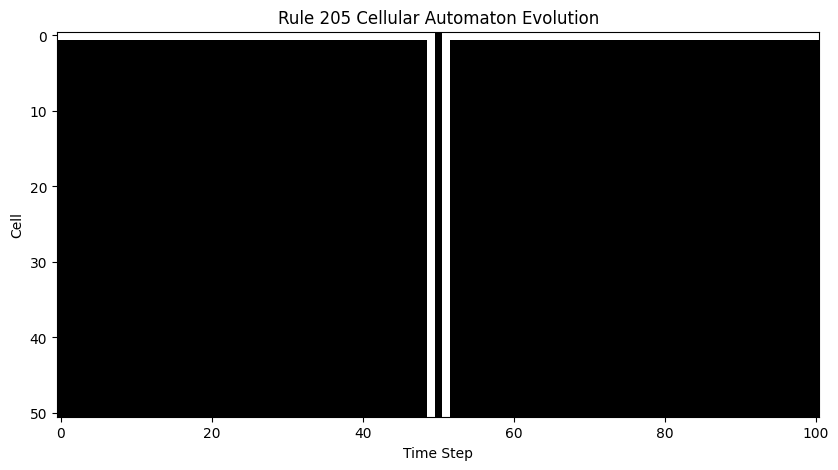

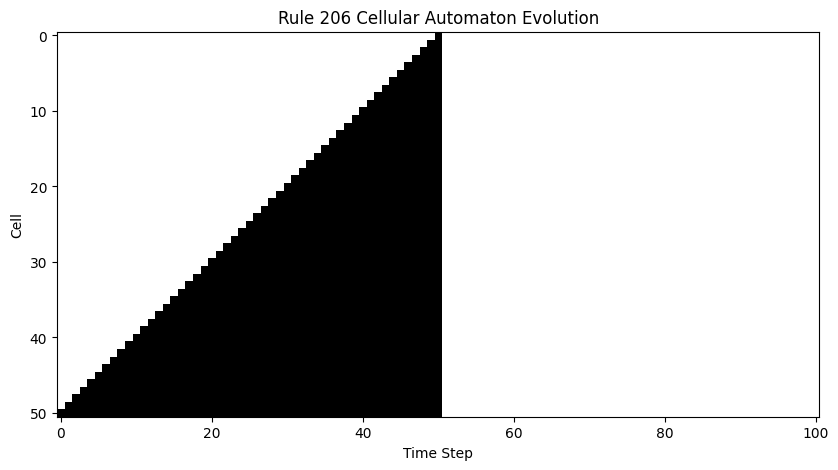

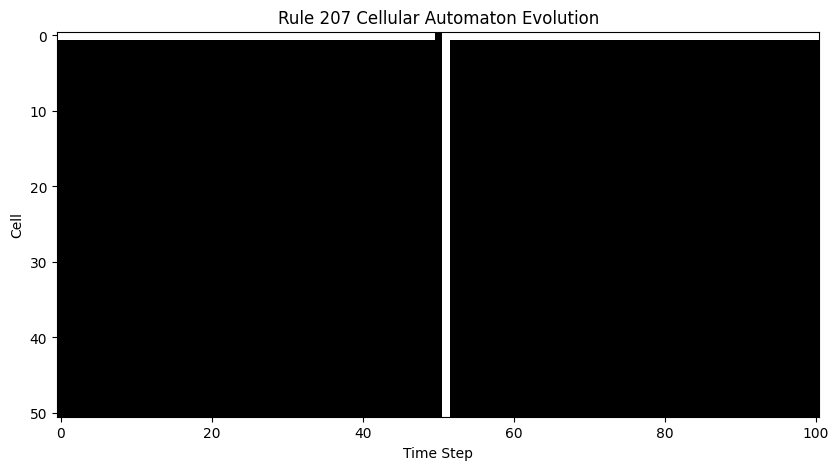

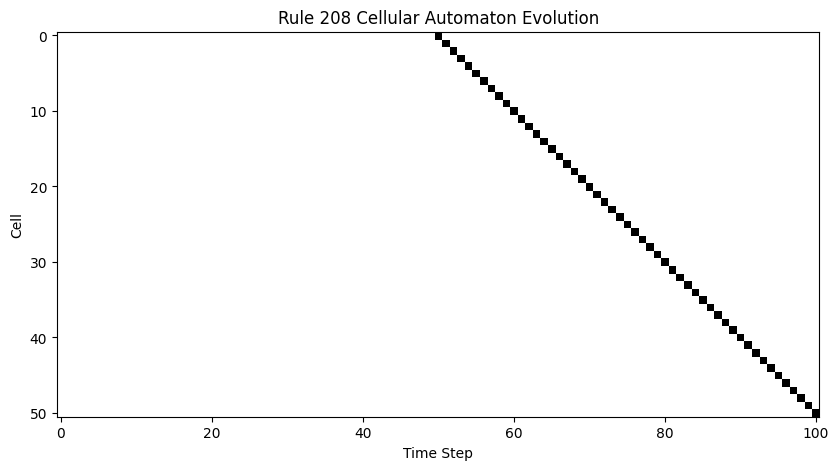

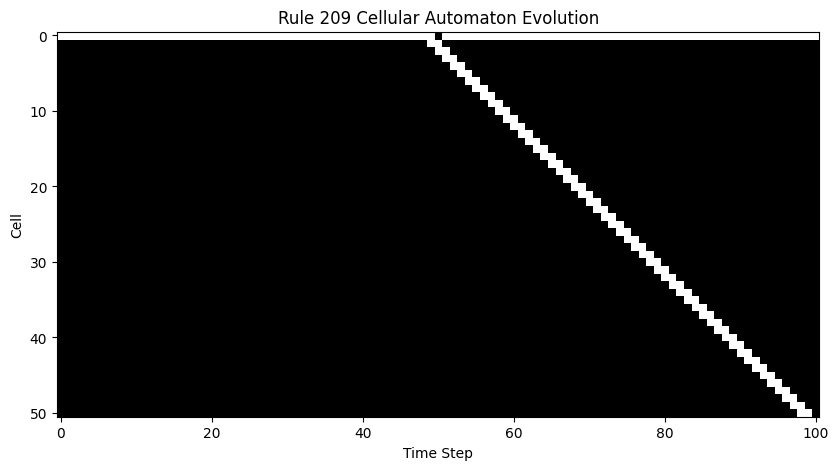

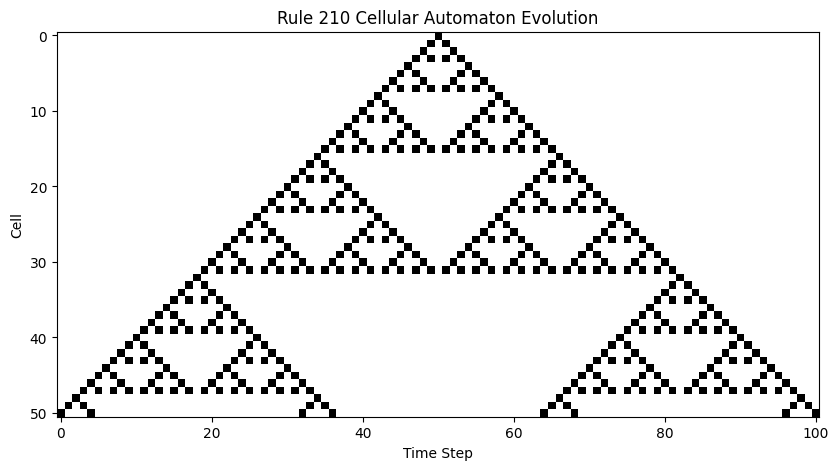

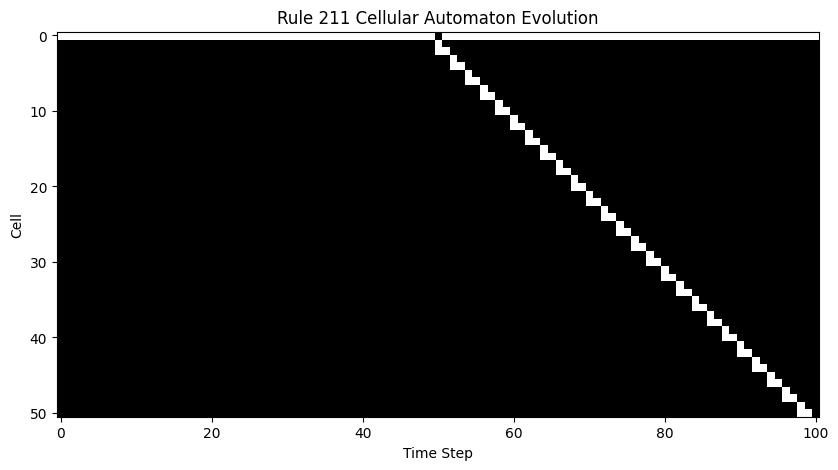

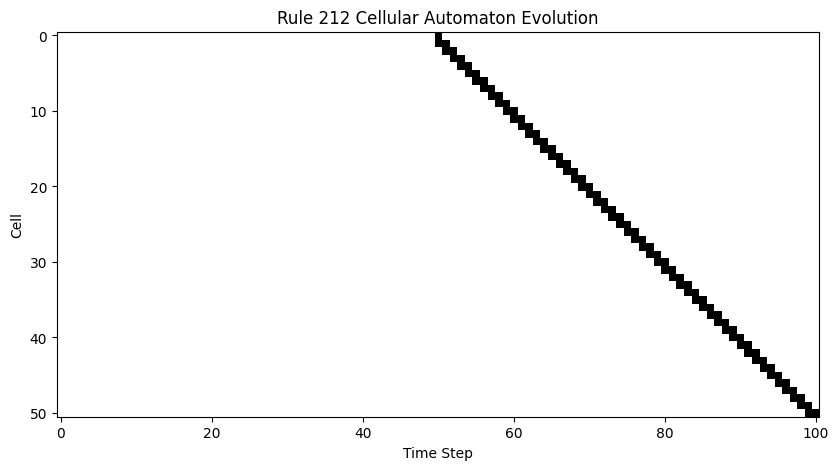

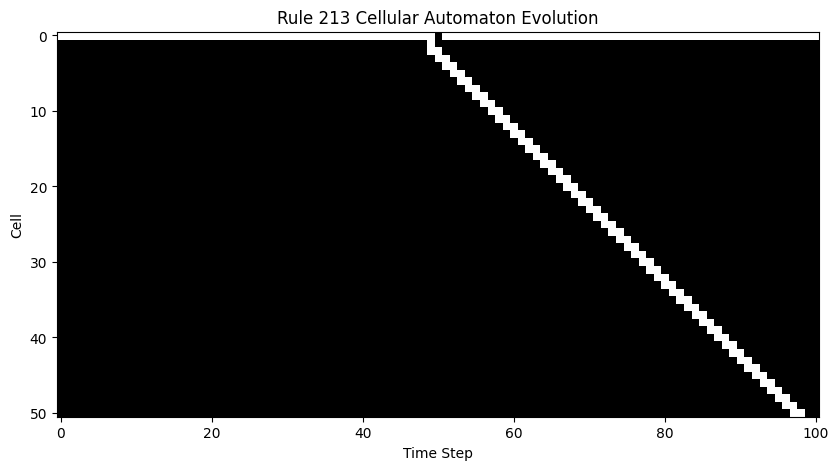

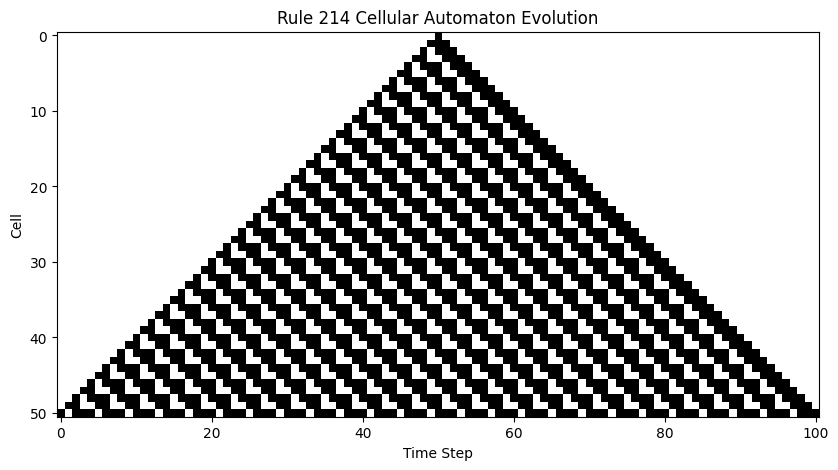

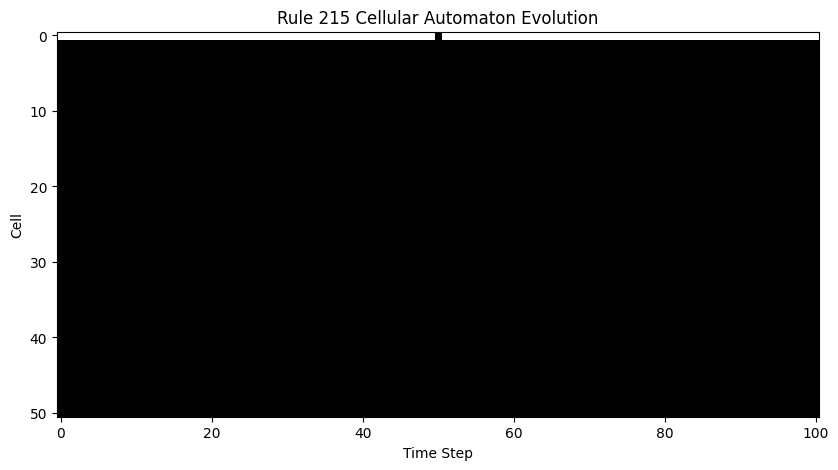

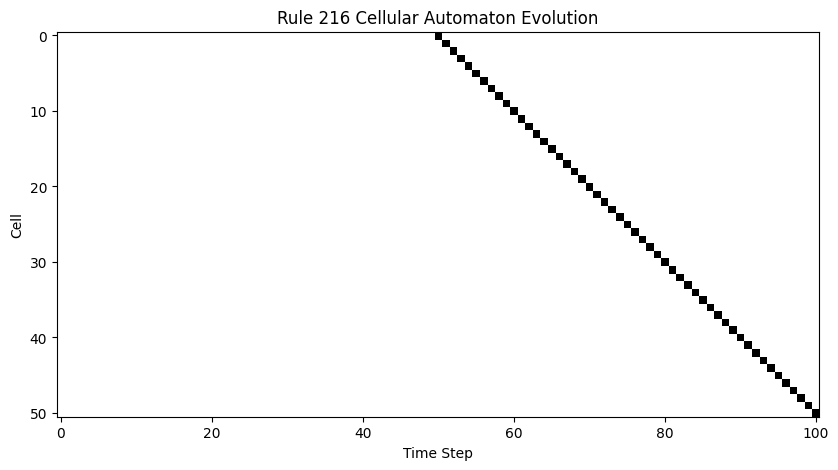

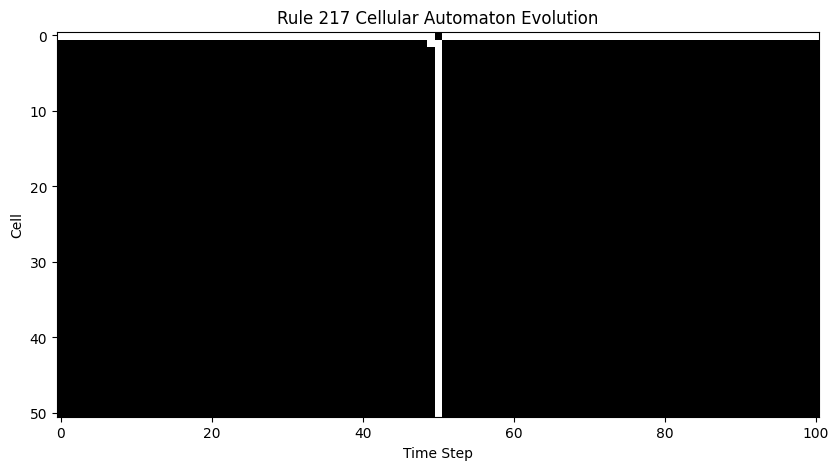

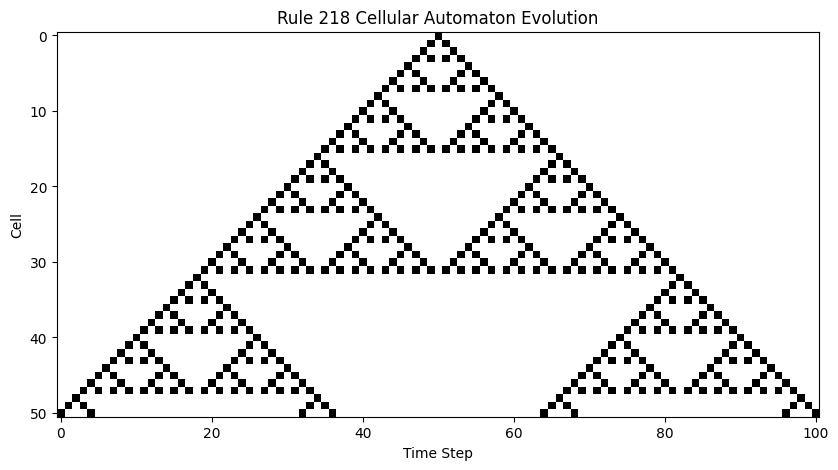

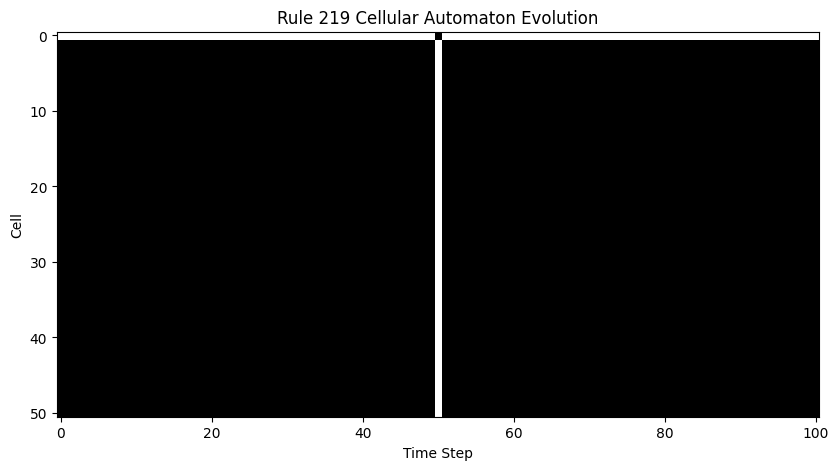

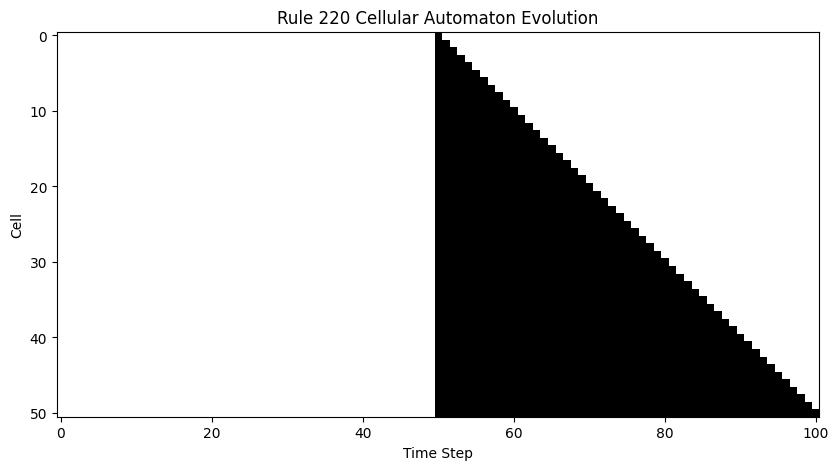

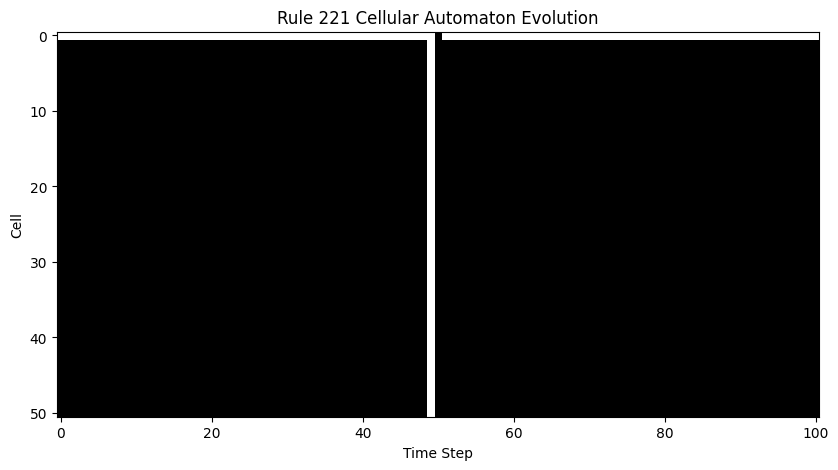

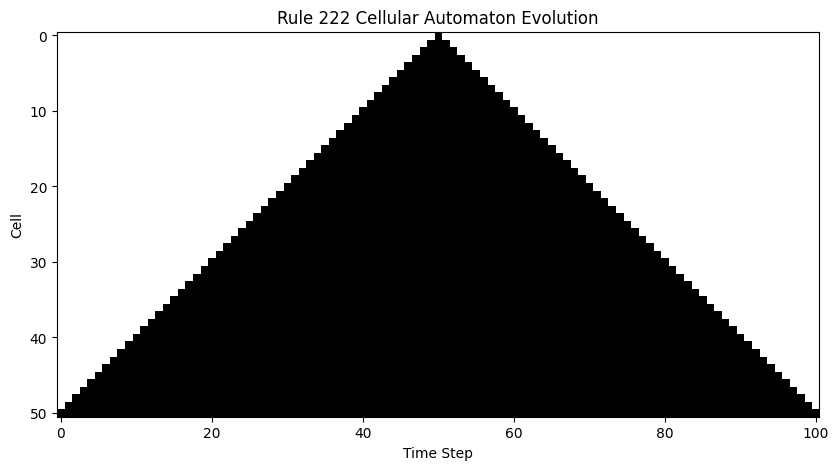

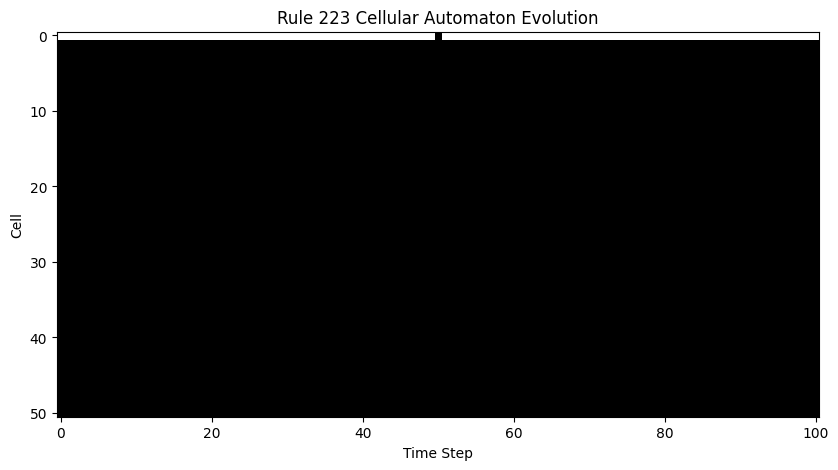

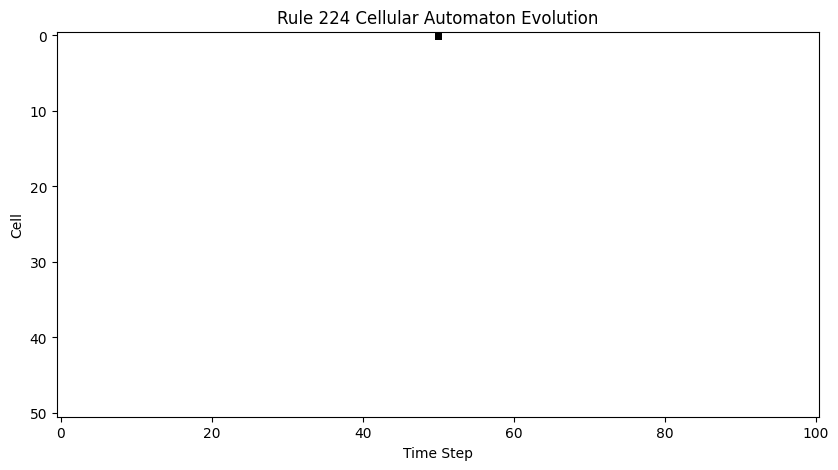

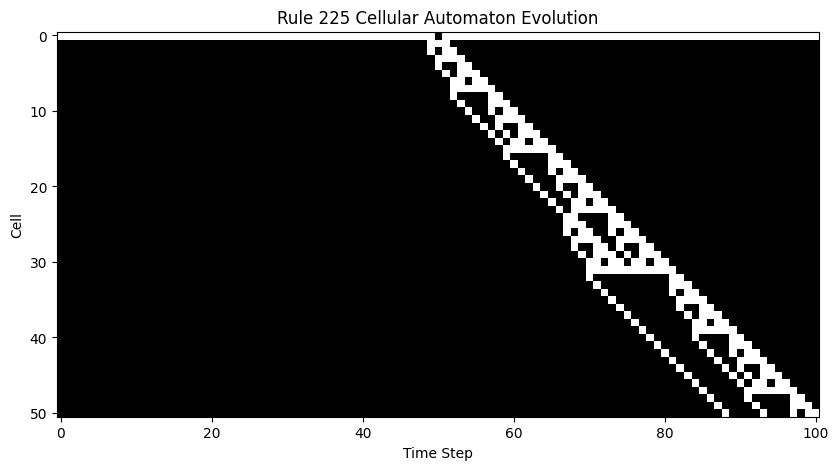

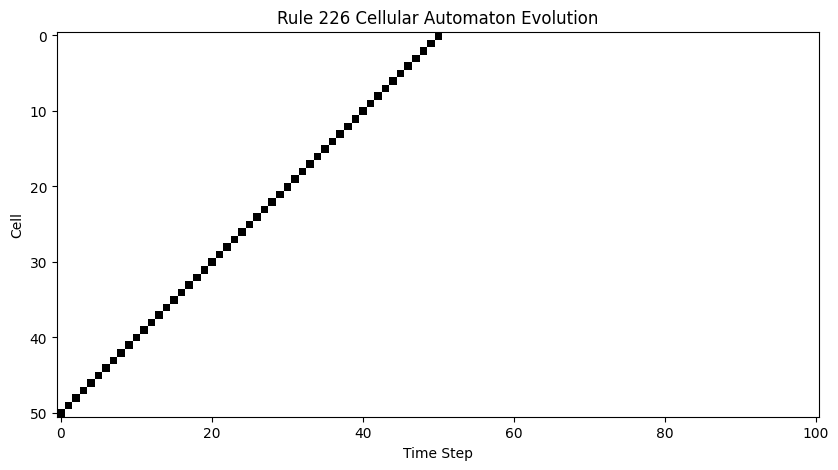

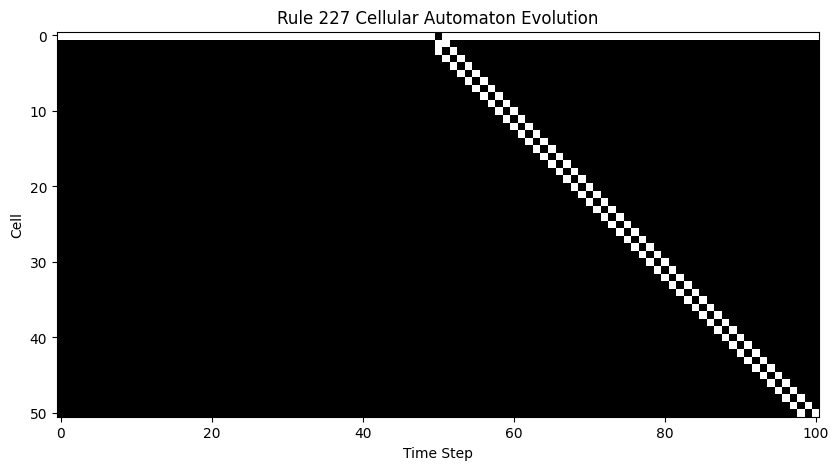

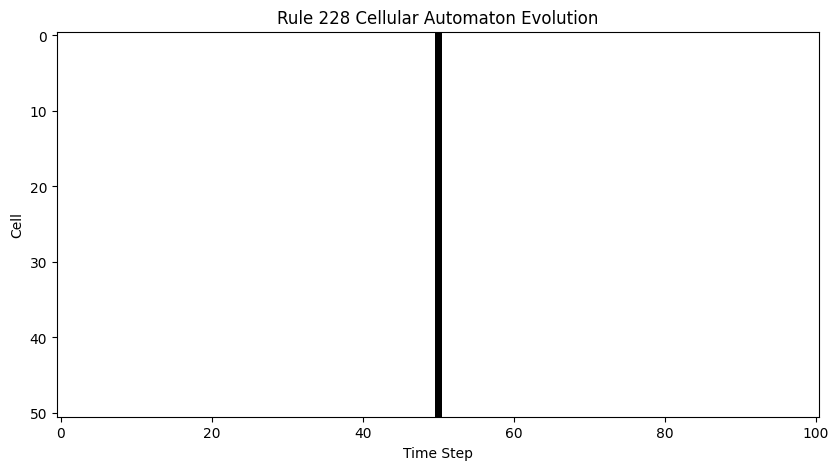

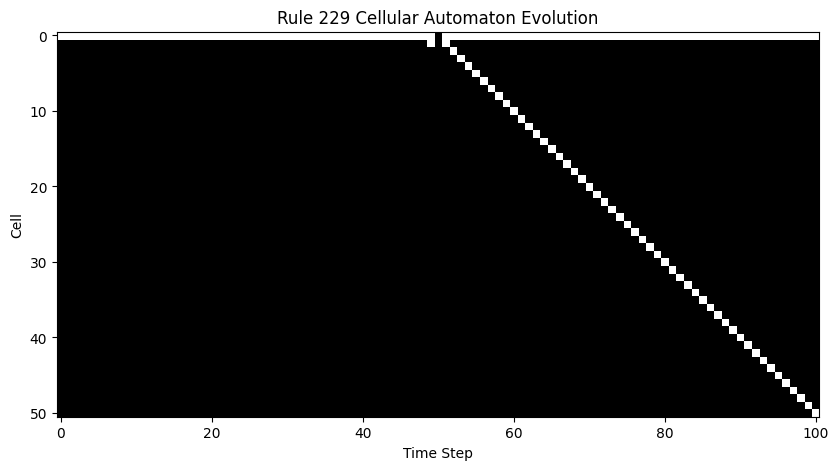

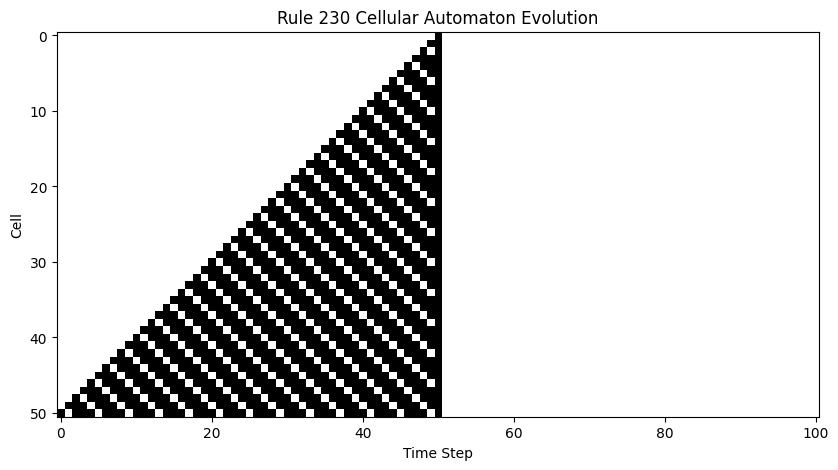

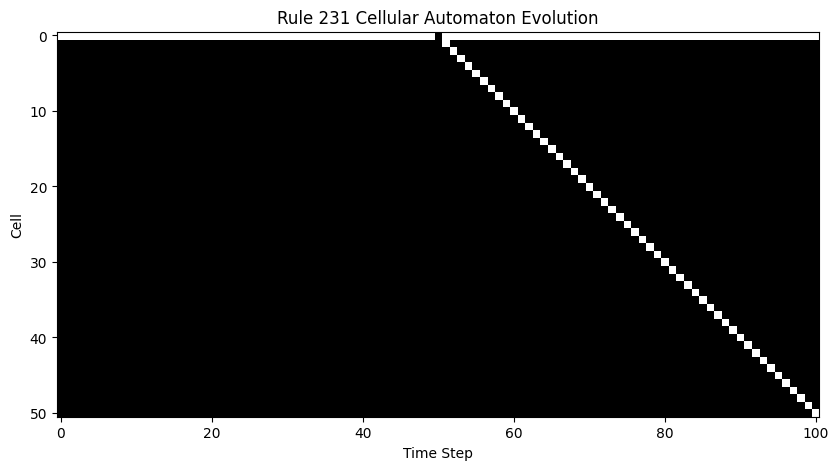

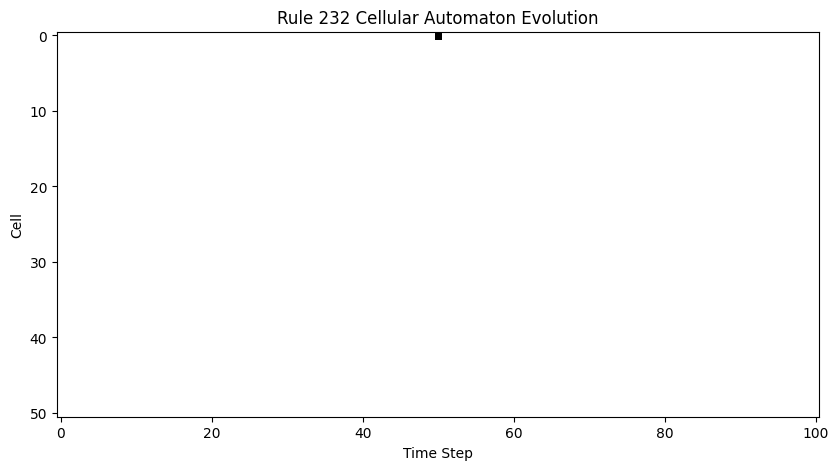

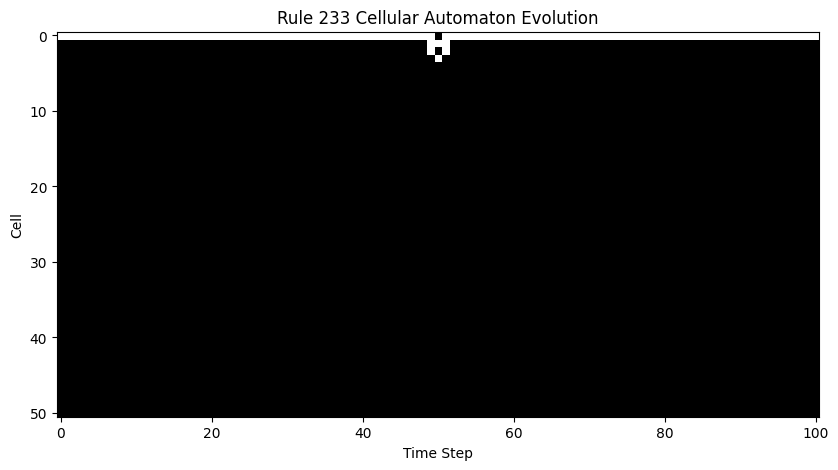

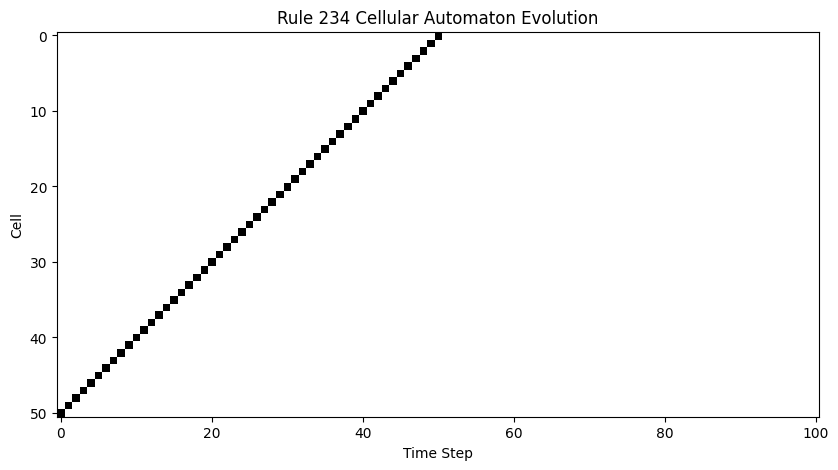

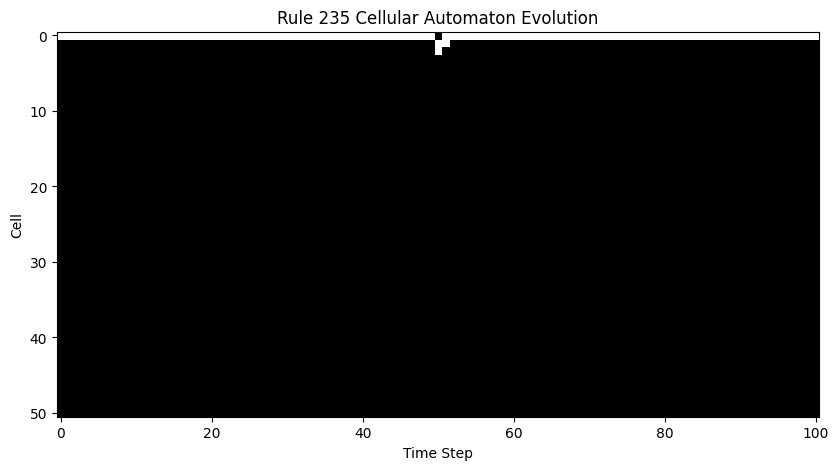

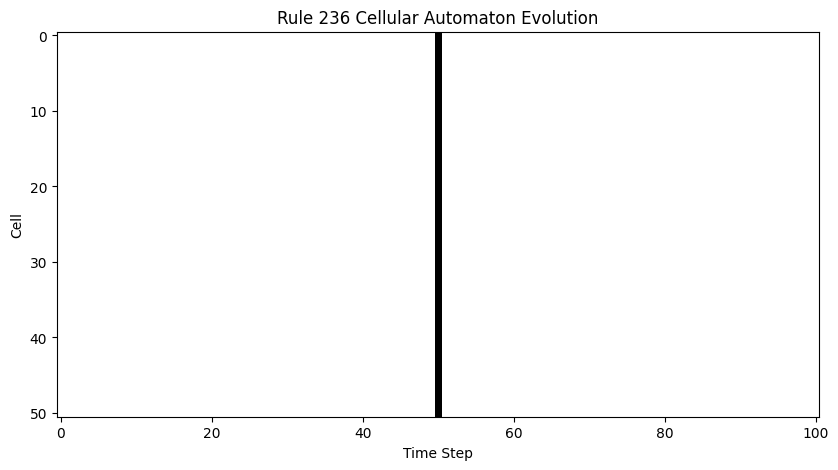

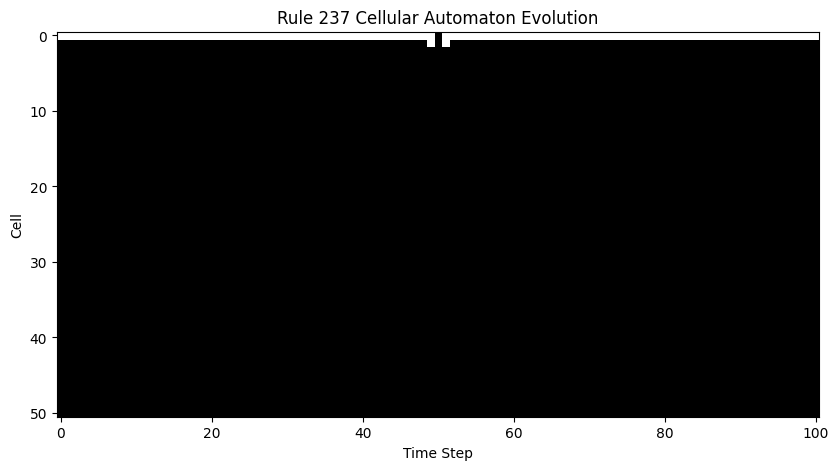

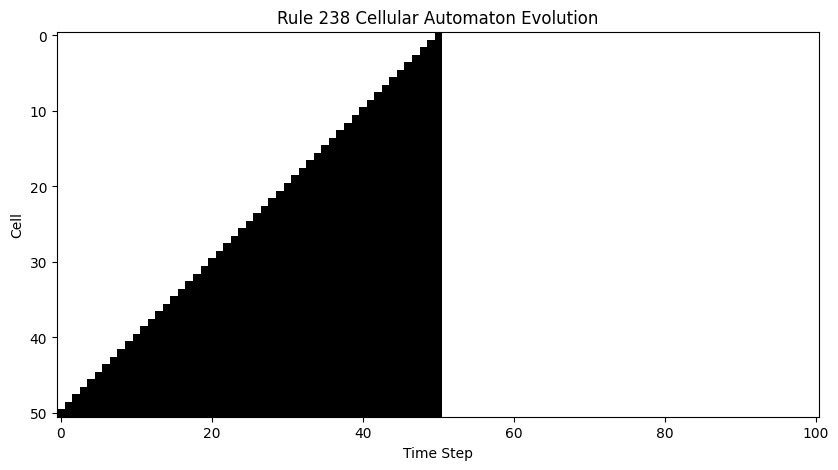

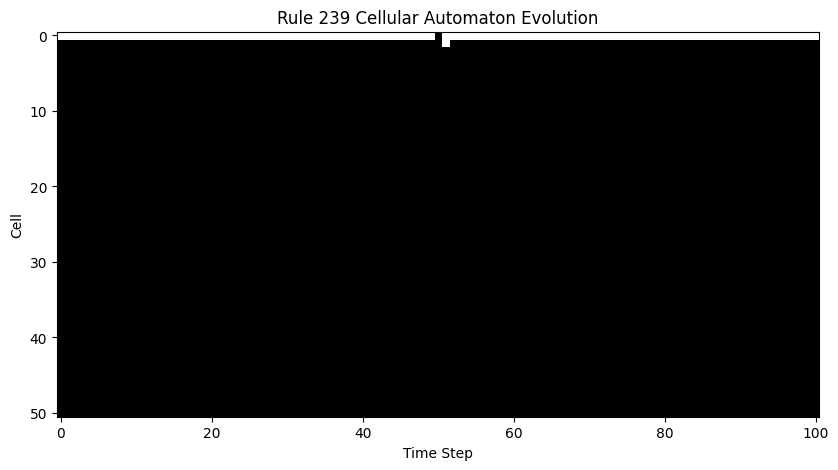

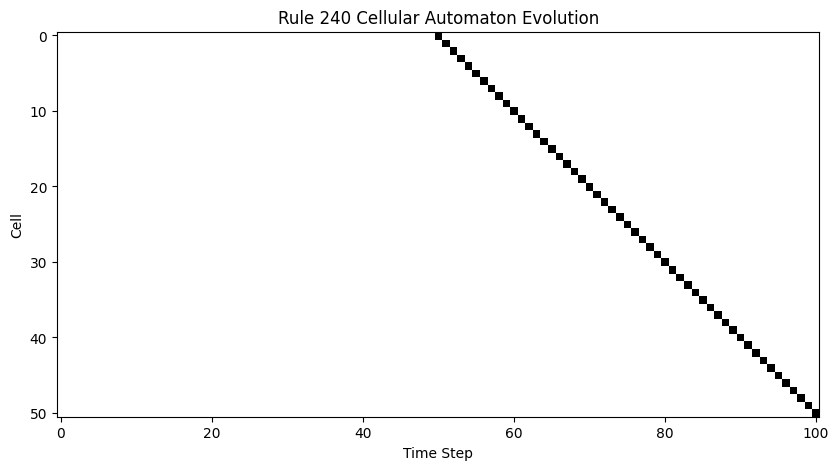

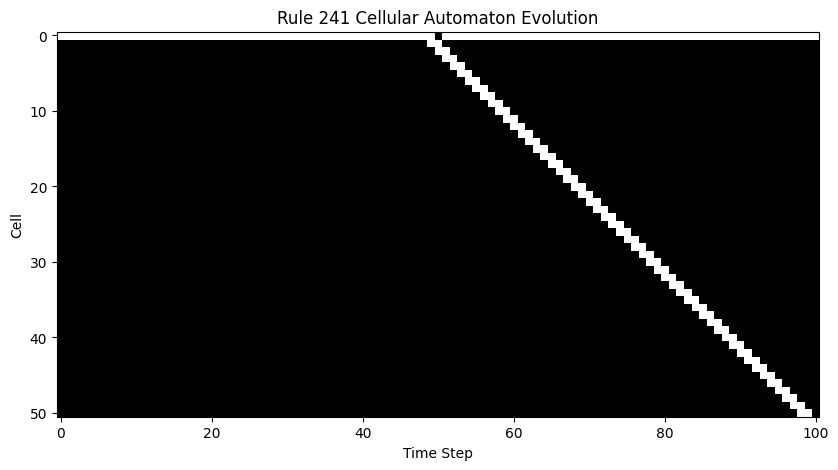

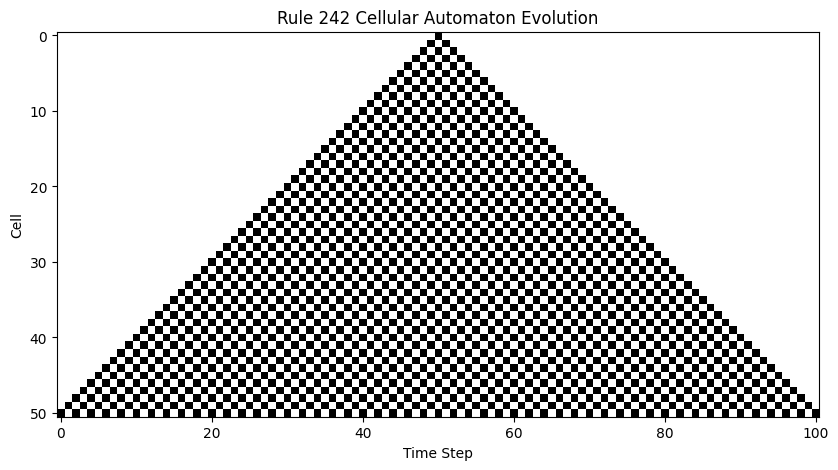

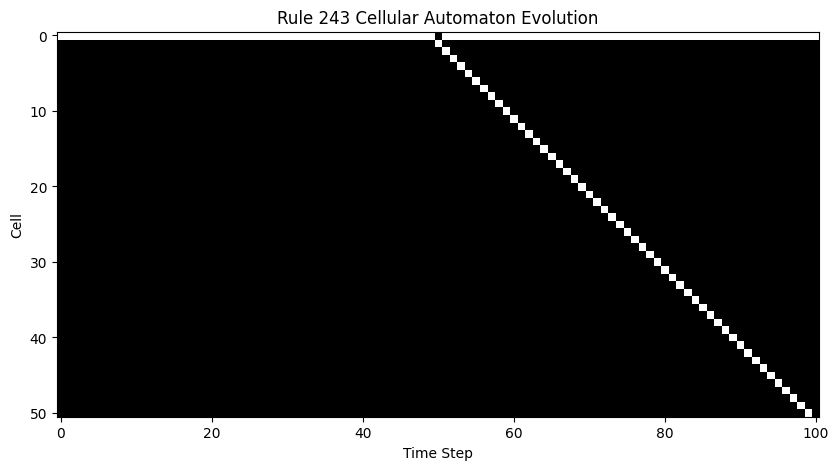

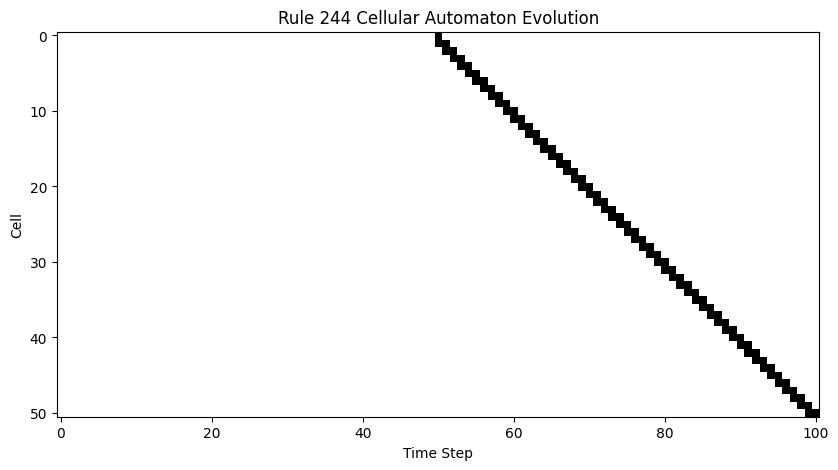

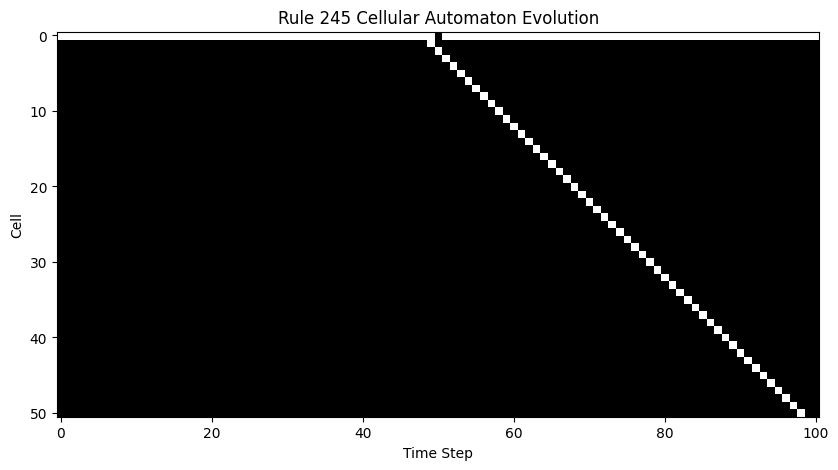

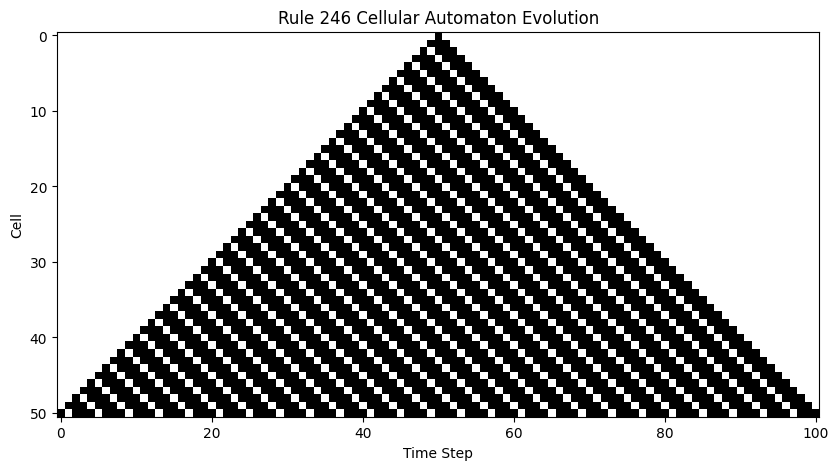

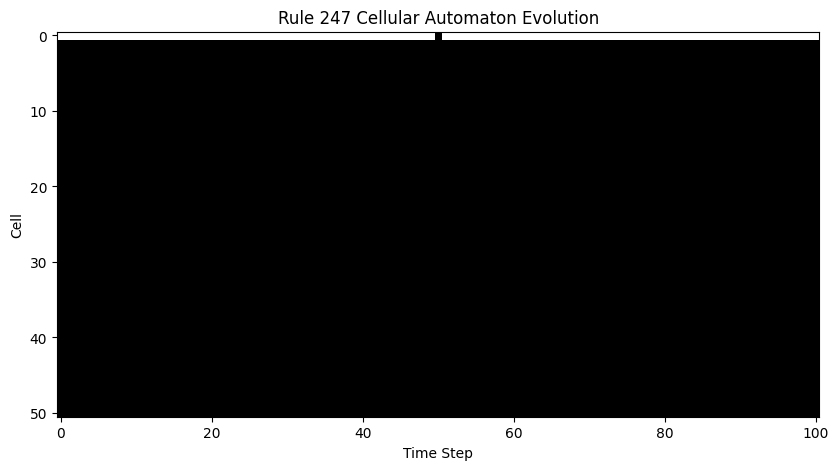

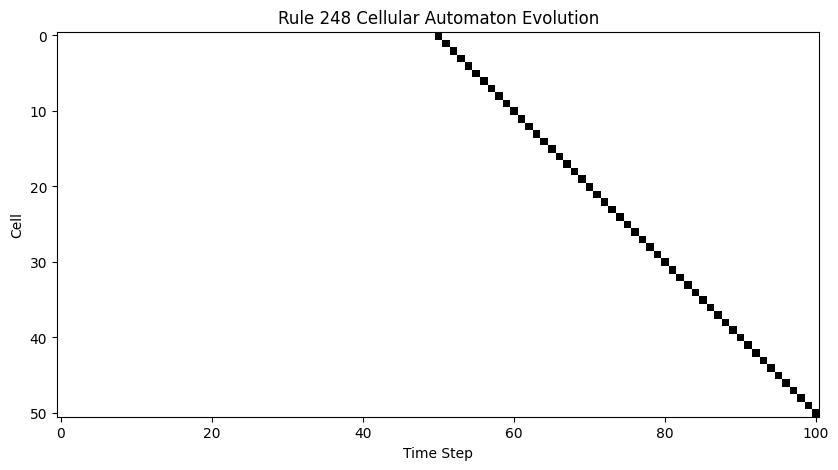

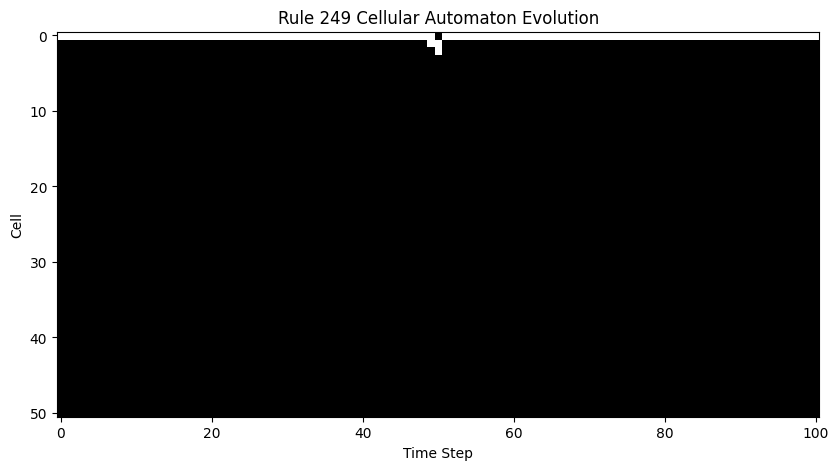

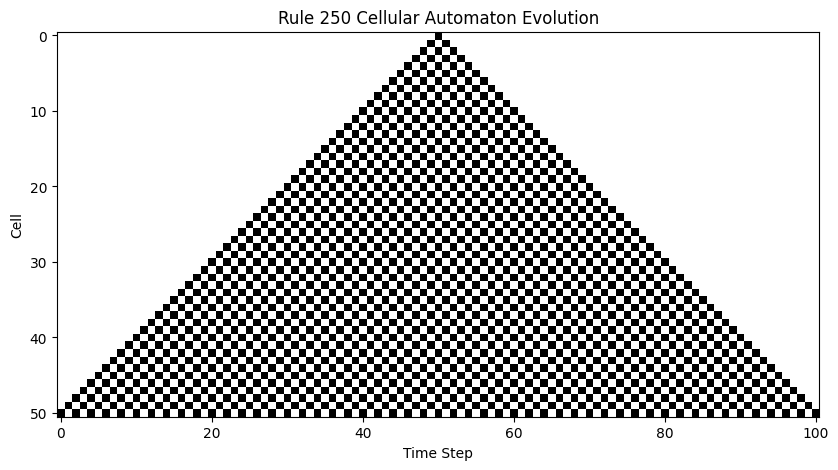

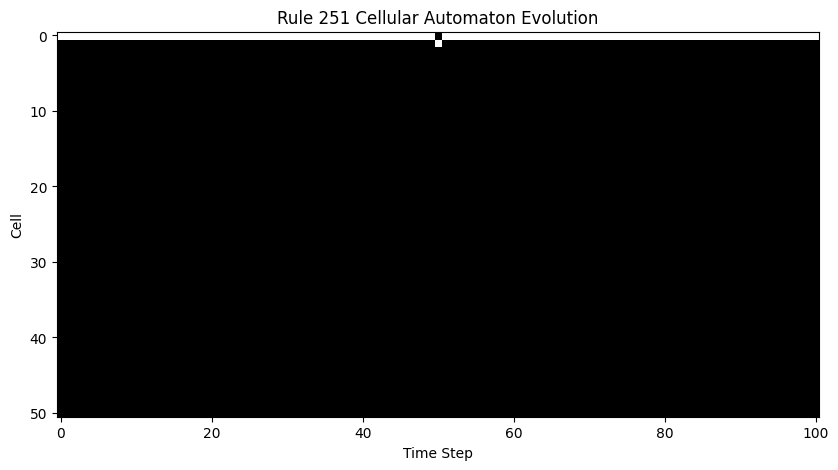

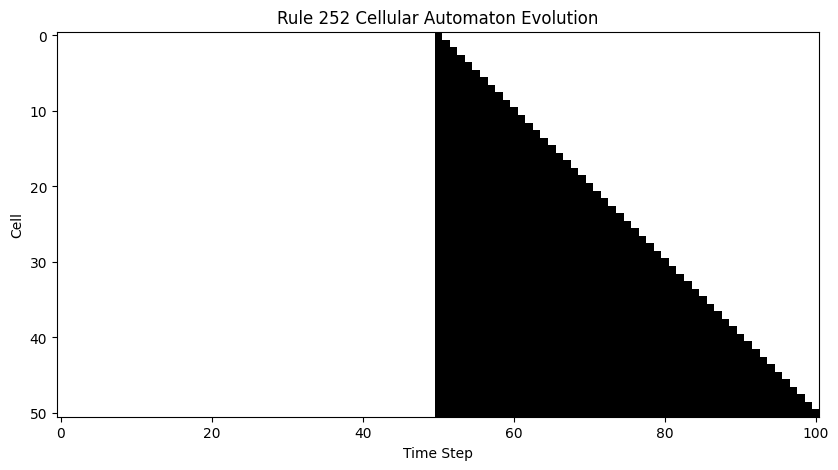

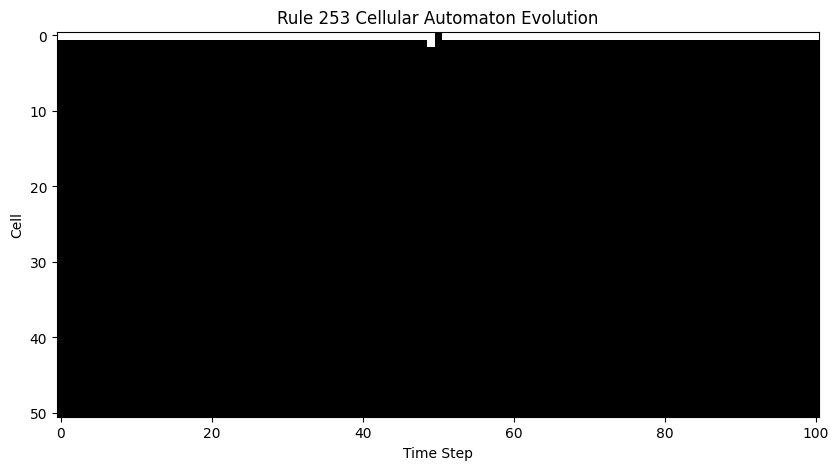

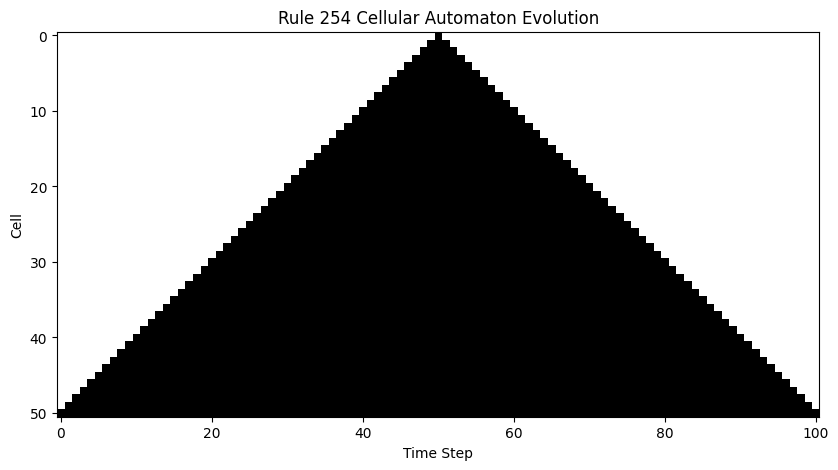

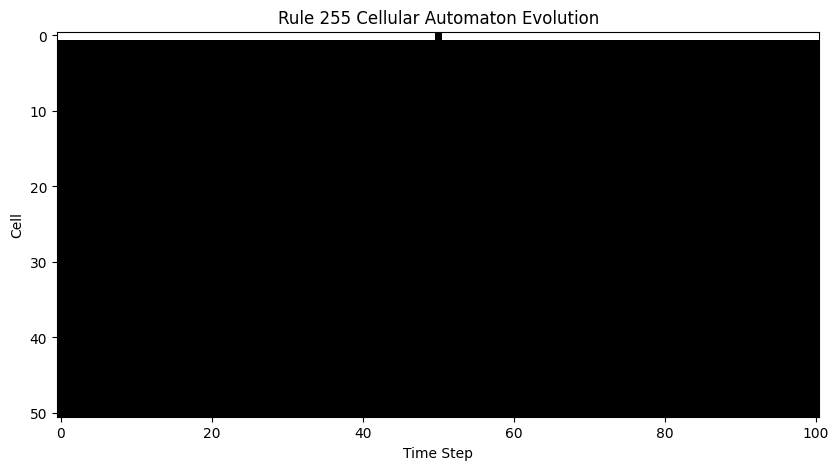

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def apply_rule(rule, state, pos):
    left = state[(pos - 1) % len(state)]
    center = state[pos]
    right = state[(pos + 1) % len(state)]
    return rule[left * 4 + center * 2 + right]

def evolve(rule, initial_state, num_generations):
    state = initial_state.copy()
    history = [state.copy()]
    
    for _ in range(num_generations):
        new_state = np.zeros_like(state)
        for i in range(len(state)):
            new_state[i] = apply_rule(rule, state, i)
        state = new_state
        history.append(state.copy())
    
    return np.array(history)

def plot_evolution(history, rule_number):
    plt.figure(figsize=(10, 5))
    plt.imshow(history, cmap="binary", interpolation="nearest")
    plt.xlabel("Time Step")
    plt.ylabel("Cell")
    plt.title(f"Rule {rule_number} Cellular Automaton Evolution")
    plt.show()

#exercicio
for rule_number in range(256):
    binary_string = format(rule_number, '08b')
    binary_rule = [int(bit) for bit in binary_string[::-1]]
   
    rule_binary = binary_rule
    initial_state = np.zeros(101, dtype=int)
    initial_state[50] = 1
    num_generations = 50
    
    evolution_history = evolve(rule_binary, initial_state, num_generations)
    plot_evolution(evolution_history, rule_number)

## 2 :  Aceitar como entrada um valor entre 0 e 255 e gerar o respectivo AC
Criamos esta função **rule_to_binary** que converte um número de regra de autômato celular na sua representação binária, retornando uma lista de inteiros que representa os bits dessa regra. De seguida verificamos se o número que foi posto está entre 0 e 255 e aplicamos esta função a esse número.

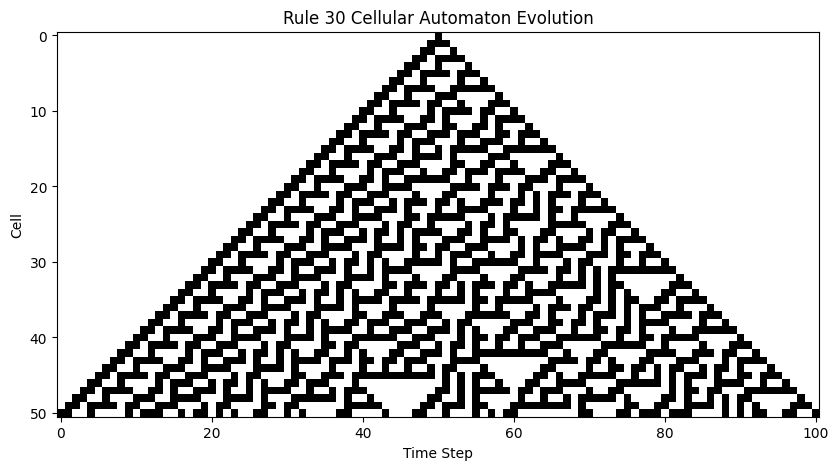

In [28]:
def apply_rule(rule, state, pos):
    left = state[pos - 1]
    center = state[pos]
    right = state[(pos + 1) % len(state)]
    return rule[left * 4 + center * 2 + right]

def evolve(rule, initial_state, steps):
    state = initial_state.copy()
    history = [state.copy()]
    
    for _ in range(steps):
        new_state = np.zeros_like(state)
        for i in range(len(state)):
            new_state[i] = apply_rule(rule, state, i)
        state = new_state
        history.append(state.copy())
    
    return history

def plot_evolution(history, rule_number):
    plt.figure(figsize=(10, 5))
    plt.imshow(history, cmap="binary", interpolation="nearest")
    plt.xlabel("Time Step")
    plt.ylabel("Cell")
    plt.title(f"Rule {rule_number} Cellular Automaton Evolution")
    plt.show()

# exercicio
rule_number = int(input("Entre com um valor entre 0 e 255: "))

def rule_to_binary(rule_number): 
    binary_string = format(rule_number, '08b')  
    binary_rule = [int(bit) for bit in binary_string[::-1]]  
    return binary_rule

if 0 <= rule_number <= 255:
   
    rule_binary = rule_to_binary(rule_number)
    
    initial_state = np.zeros(101, dtype=int)
    initial_state[50] = 1
    num_generations = 50

    evolution_history = evolve(rule_binary, initial_state, num_generations)
    plot_evolution(evolution_history, rule_number)
else:
    print("O valor inserido está fora do intervalo válido.")

## 3 :  Criar uma interface para entrada das regras.
Começamos por solicitar ao user que insira a regra do autómato celular através da consola, de seguida é convertida em um array NumPy de inteiros utilizando uma list: **[int(bit) for bit in rule_input]**. 
A função '**evolve**' é chamada para evoluir o autómato celular ao longo de 50 etapas, usando a regra e o estado inicial definidos.

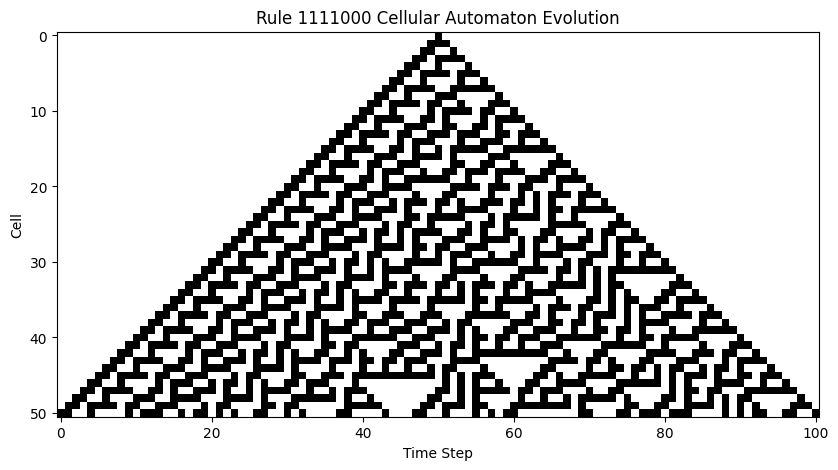

In [31]:
rule_input = input("Digite a regra do autómato celular (8 bits, ex: 30): ")
try:
    rule = np.array([int(bit) for bit in rule_input], dtype=int)
    if len(rule) != 8:
        raise ValueError("A regra deve ter 8 bits")
except ValueError:
    print("Formato de regra inválido. Certifique-se de que a regra contenha apenas 0s e 1s.")

# Set initial state
initial_state = np.zeros(101, dtype=int)
initial_state[50] = 1
# Evolve and plot
steps = 50
evolution_history = evolve(rule, initial_state, steps)
plot_evolution(np.array(evolution_history), int(rule_input))